In [33]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
from tensorflow.keras.preprocessing import image
import dask.dataframe as dd
from PIL import Image

In [29]:
filtered_data = pd.read_csv("../data/FILTERED_FINAL_IMBD_DATA.csv", sep=',', engine='python', header=0

,Unnamed: 0,CODE,TITLE,DESCRIPTION,DURATION,COLOR,YEAR,DIRECTOR,BUDGET,CWG,RATING,VOTES,METASCORE RATING,GENRES,LANGUAGE,COUNTRY,CONTENT RATING,KEYWORDS,WRITERS,OPENING WEEKEND
npartitions=1,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [21]:
code_list_filtered_data = list(filtered_data['CODE'])

In [22]:
dir = '../data/img/'
dirImages = os.listdir(dir)

In [23]:
import pandas as pd

string = '.png'

filtered_ListImages = (pd.Series(code_list_filtered_data) + string).tolist()
len(filtered_ListImages)

113646

In [24]:
filtered_ListImages

['tt0001790.png',
 'tt0001911.png',
 'tt0002101.png',
 'tt0002199.png',
 'tt0002423.png',
 'tt0002445.png',
 'tt0002514.png',
 'tt0002588.png',
 'tt0002628.png',
 'tt0002646.png',
 'tt0002822.png',
 'tt0002844.png',
 'tt0002885.png',
 'tt0002898.png',
 'tt0002922.png',
 'tt0003022.png',
 'tt0003037.png',
 'tt0003131.png',
 'tt0003159.png',
 'tt0003165.png',
 'tt0003167.png',
 'tt0003241.png',
 'tt0003362.png',
 'tt0003365.png',
 'tt0003643.png',
 'tt0003657.png',
 'tt0003665.png',
 'tt0003668.png',
 'tt0003670.png',
 'tt0003675.png',
 'tt0003731.png',
 'tt0003740.png',
 'tt0003772.png',
 'tt0003854.png',
 'tt0003890.png',
 'tt0003930.png',
 'tt0003952.png',
 'tt0003973.png',
 'tt0004066.png',
 'tt0004099.png',
 'tt0004121.png',
 'tt0004134.png',
 'tt0004150.png',
 'tt0004167.png',
 'tt0004179.png',
 'tt0004181.png',
 'tt0004272.png',
 'tt0004307.png',
 'tt0004313.png',
 'tt0004387.png',
 'tt0004390.png',
 'tt0004391.png',
 'tt0004457.png',
 'tt0004525.png',
 'tt0004593.png',
 'tt000463

In [25]:
dirImages = set (dirImages)
filtered_ListImages = set(filtered_ListImages)
films_in_comon = dirImages.intersection(filtered_ListImages)

In [26]:
films_in_comon = list(films_in_comon)

In [27]:
len(films_in_comon)

107181

In [44]:
import numpy
import PIL

array_img = []
for id_image in tqdm(films_in_comon):
        print(id_image)
        img = PIL.Image.open(dir + id_image).convert("L")
        img_array = numpy.array(img)
        array_img = array_img + [[id_image,img_array]]

tt1024855.png
tt0473626.png
tt1543542.png
tt0049245.png
tt0066924.png
tt0056944.png
tt0067667.png
tt0046398.png
tt2651624.png
tt1437212.png
tt2170661.png
tt2479384.png
tt0028665.png
tt0161061.png
tt0107877.png
tt0974662.png
tt0115524.png
tt3063470.png
tt0028763.png
tt0845527.png
tt0198406.png
tt0799941.png
tt2340076.png
tt0887161.png
tt0028704.png
tt0066309.png
tt8269552.png
tt0051618.png
tt0253314.png
tt0120831.png
tt0407536.png
tt2150315.png
tt0075082.png
tt3326096.png
tt0459543.png
tt0073653.png
tt0070861.png
tt1827578.png
tt7370000.png
tt0094655.png
tt0062663.png
tt0379215.png
tt0315957.png
tt0106471.png
tt0133742.png
tt0087085.png
tt0069374.png
tt0410452.png
tt0131436.png
tt0033728.png
tt0202960.png
tt0816539.png
tt0105611.png
tt0057662.png
tt0287065.png
tt2119411.png
tt0031222.png
tt1964969.png
tt0098197.png
tt0080747.png
tt0183766.png
tt5343480.png
tt0098330.png
tt4757164.png
tt4481514.png
tt0084002.png
tt0035335.png
tt0407339.png
tt0309320.png
tt1321402.png
tt0456340.png
tt1326

tt0078336.png
tt0054493.png
tt0069015.png
tt0022658.png
tt0064645.png
tt0072590.png
tt0111384.png
tt0053283.png
tt0095627.png
tt2993848.png
tt0129598.png
tt0326773.png
tt0482088.png
tt1319563.png
tt1414369.png
tt0216800.png
tt6008602.png
tt0092991.png
tt2140039.png
tt0265130.png
tt5754414.png
tt0950753.png
tt2630704.png
tt6522084.png
tt0105287.png
tt0074775.png
tt0133148.png
tt0068360.png
tt0297416.png
tt0243278.png
tt1305806.png
tt0263056.png
tt0299112.png
tt0374312.png
tt0130023.png
tt0094706.png
tt0053455.png
tt0061123.png
tt1742336.png
tt0375782.png
tt1661266.png
tt0053143.png
tt0074189.png
tt1833835.png
tt3814496.png
tt0393939.png
tt1097239.png
tt1837008.png
tt0105128.png
tt0030808.png
tt0255931.png
tt0114676.png
tt3220900.png
tt2259426.png
tt0068931.png
tt0104309.png
tt0054931.png
tt0084750.png
tt0187130.png
tt0071527.png
tt5978540.png
tt0064415.png
tt0095341.png
tt0312381.png
tt0203309.png
tt0371226.png
tt4700230.png
tt1500830.png
tt0112493.png
tt0057578.png
tt0061670.png
tt1534

tt1167868.png
tt0044074.png
tt0027160.png
tt0084735.png
tt0067565.png
tt0427873.png
tt1164089.png
tt0173866.png
tt0021191.png
tt2118689.png
tt4828018.png
tt5834760.png
tt0038196.png
tt0150251.png
tt1732757.png
tt0092723.png
tt0120735.png
tt1397495.png
tt0312843.png
tt0121791.png
tt5781146.png
tt0061499.png
tt0312859.png
tt0066011.png
tt3721070.png
tt4742190.png
tt0048976.png
tt0293005.png
tt0042427.png
tt0014528.png
tt0309734.png
tt0119644.png
tt0269278.png
tt0075724.png
tt3165768.png
tt0010357.png
tt0084861.png
tt0049640.png
tt0053331.png
tt0127129.png
tt0176185.png
tt0366518.png
tt0120594.png
tt0102917.png
tt0185018.png
tt4865824.png
tt0227984.png
tt2460594.png
tt0048027.png
tt0071733.png
tt0047817.png
tt0058134.png
tt0246240.png
tt0021382.png
tt0056547.png
tt0058506.png
tt4627104.png
tt7505170.png
tt0184896.png
tt0124074.png
tt7227100.png
tt0291454.png
tt0131429.png
tt0342207.png
tt0810845.png
tt0236583.png
tt0089576.png
tt0183056.png
tt0757214.png
tt0068747.png
tt0317676.png
tt0899

tt3708444.png
tt0126978.png
tt2833216.png
tt0110274.png
tt0007506.png
tt0059564.png
tt0036152.png
tt0232471.png
tt0315110.png
tt0415768.png
tt2178470.png
tt1880377.png
tt0219155.png
tt0131484.png
tt0286560.png
tt0089251.png
tt0084556.png
tt2142889.png
tt0165499.png
tt0254962.png
tt0442312.png
tt0092270.png
tt0231402.png
tt0104080.png
tt2261331.png
tt0433398.png
tt0206285.png
tt0277563.png
tt0180243.png
tt0052944.png
tt0062775.png
tt0097051.png
tt0240021.png
tt0411645.png
tt3062976.png
tt0030470.png
tt0114513.png
tt0054271.png
tt0117149.png
tt0815246.png
tt0159421.png
tt0115682.png
tt0089365.png
tt0113857.png
tt0029965.png
tt0052063.png
tt0217287.png
tt0027824.png
tt10722568.png
tt1263800.png
tt2404181.png
tt0471018.png
tt9646548.png
tt2379318.png
tt0091586.png
tt0472033.png
tt0089946.png
tt2145597.png
tt0095295.png
tt0179978.png
tt0084388.png
tt5439796.png
tt0095274.png
tt0077556.png
tt0997143.png
tt0017141.png
tt0018398.png
tt0482512.png
tt3112654.png
tt0109075.png
tt4627246.png
tt023

tt0099836.png
tt0015973.png
tt0217355.png
tt0388487.png
tt0064116.png
tt0053946.png
tt1998204.png
tt1907779.png
tt0063178.png
tt0282129.png
tt0244288.png
tt5334304.png
tt3003800.png
tt0107354.png
tt0119683.png
tt0102157.png
tt9055926.png
tt0196526.png
tt0259631.png
tt6877088.png
tt0066124.png
tt0459387.png
tt1185442.png
tt0084115.png
tt0321868.png
tt2979638.png
tt0079155.png
tt0142201.png
tt0024573.png
tt0237388.png
tt0052607.png
tt0365942.png
tt0070806.png
tt0805607.png
tt1311707.png
tt5780484.png
tt0038262.png
tt2359417.png
tt0204245.png
tt0099982.png
tt1813496.png
tt0274843.png
tt0857191.png
tt0102272.png
tt0064615.png
tt0263725.png
tt0291021.png
tt0116915.png
tt6813056.png
tt0175694.png
tt0040799.png
tt1419006.png
tt0256259.png
tt0092534.png
tt0041792.png
tt0128350.png
tt0195778.png
tt0451966.png
tt0156035.png
tt1244536.png
tt0410006.png
tt0301254.png
tt1487906.png
tt0085460.png
tt0293270.png
tt0118883.png
tt0280665.png
tt0030971.png
tt0045945.png
tt0071774.png
tt0083933.png
tt0097

tt0794350.png
tt2344678.png
tt4641264.png
tt4873338.png
tt0040597.png
tt0026641.png
tt10181964.png
tt2130161.png
tt0036342.png
tt0068995.png
tt0138353.png
tt0206067.png
tt0064579.png
tt1500845.png
tt1885266.png
tt2191612.png
tt8072666.png
tt9062342.png
tt0072062.png
tt0203428.png
tt0064329.png
tt9844890.png
tt0068759.png
tt0071907.png
tt1145154.png
tt5247736.png
tt0132935.png
tt1587685.png
tt0140614.png
tt1833887.png
tt3866214.png
tt0043895.png
tt0102294.png
tt0088207.png
tt0082927.png
tt0230689.png
tt1396209.png
tt0087918.png
tt0145517.png
tt0058434.png
tt0204661.png
tt0242266.png
tt0493450.png
tt0347167.png
tt0053320.png
tt0287527.png
tt3855240.png
tt0004681.png
tt0220605.png
tt1603900.png
tt0310236.png
tt0155360.png
tt0198284.png
tt1601227.png
tt0032612.png
tt0074174.png
tt0104290.png
tt1715853.png
tt0798733.png
tt0117473.png
tt0396114.png
tt0351763.png
tt0020938.png
tt0233833.png
tt0191981.png
tt0035633.png
tt0031179.png
tt2405820.png
tt0363504.png
tt0044718.png
tt0288593.png
tt004

tt3654796.png
tt0038256.png
tt0083845.png
tt0071084.png
tt0451984.png
tt0139442.png
tt0087233.png
tt0155068.png
tt0185266.png
tt2123230.png
tt2268732.png
tt0116130.png
tt0422950.png
tt0022137.png
tt5052972.png
tt0338297.png
tt0247988.png
tt0378606.png
tt0119693.png
tt0034536.png
tt0098058.png
tt4526546.png
tt0179901.png
tt0070029.png
tt0055438.png
tt7033498.png
tt0026921.png
tt0018530.png
tt0118026.png
tt0301257.png
tt2355631.png
tt10052290.png
tt0120186.png
tt0109889.png
tt0097036.png
tt0236388.png
tt0928152.png
tt0041348.png
tt0369878.png
tt0353240.png
tt0044533.png
tt2071550.png
tt1109642.png
tt0065520.png
tt0067231.png
tt0407342.png
tt0048658.png
tt0033400.png
tt0433626.png
tt0026470.png
tt0232010.png
tt0180793.png
tt0020770.png
tt0082332.png
tt1433524.png
tt0897431.png
tt0065371.png
tt0075946.png
tt1037090.png
tt4796634.png
tt0172627.png
tt2385104.png
tt0483022.png
tt0055353.png
tt2215395.png
tt0024894.png
tt0160550.png
tt0140574.png
tt0339300.png
tt0463985.png
tt5058014.png
tt012

tt0444669.png
tt0050699.png
tt1433813.png
tt5696326.png
tt0276935.png
tt0091077.png
tt0097285.png
tt0844993.png
tt0029271.png
tt0040762.png
tt0096320.png
tt0021233.png
tt0040903.png
tt0102559.png
tt4922946.png
tt0071822.png
tt0179823.png
tt1262899.png
tt0100418.png
tt0462630.png
tt0060841.png
tt1245468.png
tt0052344.png
tt0056018.png
tt0328886.png
tt0094264.png
tt0071289.png
tt0074979.png
tt0056871.png
tt6596630.png
tt6047844.png
tt0274403.png
tt0448586.png
tt5166224.png
tt0083528.png
tt1556186.png
tt0354096.png
tt0044346.png
tt4621782.png
tt8908048.png
tt0419081.png
tt0365089.png
tt0266391.png
tt1465505.png
tt0064631.png
tt0055783.png
tt1333092.png
tt0078512.png
tt0117142.png
tt5749596.png
tt0028986.png
tt0077436.png
tt0260758.png
tt0111276.png
tt0044633.png
tt0110900.png
tt8014422.png
tt0071428.png
tt0067510.png
tt0366276.png
tt2229499.png
tt1754104.png
tt0031710.png
tt1591509.png
tt0045070.png
tt0020966.png
tt1566503.png
tt6177752.png
tt4954522.png
tt1018887.png
tt0132245.png
tt0202

tt2458596.png
tt0124197.png
tt0477126.png
tt0055818.png
tt0070506.png
tt0057571.png
tt3118920.png
tt0288169.png
tt0095904.png
tt0318579.png
tt0334220.png
tt0061359.png
tt2070776.png
tt0035292.png
tt3168640.png
tt5038372.png
tt0244126.png
tt2905772.png
tt0024865.png
tt0030405.png
tt0094056.png
tt0066887.png
tt0167945.png
tt0068806.png
tt0102493.png
tt0080516.png
tt0047472.png
tt1255955.png
tt0187785.png
tt0101412.png
tt0028285.png
tt2543508.png
tt0047075.png
tt0490240.png
tt0030340.png
tt0118974.png
tt0291324.png
tt0041923.png
tt0062809.png
tt0099450.png
tt3063516.png
tt0030216.png
tt0063852.png
tt6682438.png
tt0071991.png
tt0021454.png
tt0062138.png
tt0062829.png
tt0055262.png
tt0062033.png
tt0272196.png
tt0026934.png
tt2200376.png
tt0359587.png
tt0071606.png
tt0367859.png
tt0466445.png
tt0051878.png
tt0449959.png
tt0110496.png
tt1576360.png
tt7397958.png
tt1239340.png
tt5032216.png
tt2134165.png
tt4097678.png
tt0227487.png
tt0067400.png
tt0316649.png
tt0122718.png
tt5095030.png
tt4427

tt0116116.png
tt1529570.png
tt5657280.png
tt0234000.png
tt0027184.png
tt1305837.png
tt1152404.png
tt0022751.png
tt0058392.png
tt0280205.png
tt0047008.png
tt1670991.png
tt0029543.png
tt4161632.png
tt0064510.png
tt0109067.png
tt0016530.png
tt0062438.png
tt0865297.png
tt0041163.png
tt0110867.png
tt3244992.png
tt0107017.png
tt0193646.png
tt2618500.png
tt5378096.png
tt3982826.png
tt7279188.png
tt3687310.png
tt5776736.png
tt0286669.png
tt0041594.png
tt0058346.png
tt0070936.png
tt0465601.png
tt6949260.png
tt1712159.png
tt0084901.png
tt0114913.png
tt0114496.png
tt0040489.png
tt2011130.png
tt0222717.png
tt0021879.png
tt0126467.png
tt2223918.png
tt1605769.png
tt2334733.png
tt0021783.png
tt0363632.png
tt1269387.png
tt0058885.png
tt1639857.png
tt0159521.png
tt0110514.png
tt0051683.png
tt1651092.png
tt0035380.png
tt0126300.png
tt0049061.png
tt0031709.png
tt0324657.png
tt0016672.png
tt0286505.png
tt0039324.png
tt3056386.png
tt0067825.png
tt0161219.png
tt0995031.png
tt0064747.png
tt2538204.png
tt0065

tt0101862.png
tt0443465.png
tt0064399.png
tt2022444.png
tt0366555.png
tt1034436.png
tt0049088.png
tt0121530.png
tt0195393.png
tt0024119.png
tt0082210.png
tt1332007.png
tt1720616.png
tt0026674.png
tt0041127.png
tt0306761.png
tt4428800.png
tt7254808.png
tt7737502.png
tt0204174.png
tt0138596.png
tt0256102.png
tt0116155.png
tt0113756.png
tt0236027.png
tt0844948.png
tt0330333.png
tt0193741.png
tt0082747.png
tt1815849.png
tt0194426.png
tt2025506.png
tt0139483.png
tt0337513.png
tt3292146.png
tt0431265.png
tt0163985.png
tt0166731.png
tt0067927.png
tt0901504.png
tt2413516.png
tt0025775.png
tt0030774.png
tt0032717.png
tt0068202.png
tt0095175.png
tt1286749.png
tt0122642.png
tt0033722.png
tt5144236.png
tt0179824.png
tt0499522.png
tt0064785.png
tt1405365.png
tt2328737.png
tt0010879.png
tt0092225.png
tt0069391.png
tt0042407.png
tt0164877.png
tt0485442.png
tt1020996.png
tt0072446.png
tt5821400.png
tt0105198.png
tt0122207.png
tt0039589.png
tt0202433.png
tt0243255.png
tt0245846.png
tt0827181.png
tt1361

tt0076347.png
tt0119574.png
tt1852947.png
tt4685806.png
tt6133414.png
tt0058500.png
tt1054677.png
tt0142465.png
tt1087833.png
tt0025898.png
tt0115864.png
tt0268675.png
tt0387131.png
tt0120204.png
tt0024262.png
tt0203912.png
tt0006140.png
tt1746153.png
tt0044931.png
tt0382383.png
tt1457045.png
tt0117330.png
tt4728386.png
tt1112782.png
tt5337544.png
tt0107568.png
tt1344737.png
tt0034388.png
tt0048698.png
tt1167869.png
tt0094074.png
tt0262369.png
tt1573843.png
tt0387893.png
tt0058203.png
tt0059440.png
tt0078055.png
tt4386532.png
tt0187104.png
tt0278671.png
tt0057545.png
tt1770767.png
tt0246268.png
tt0030322.png
tt0373908.png
tt0488316.png
tt0034936.png
tt1525323.png
tt3240122.png
tt0130943.png
tt8822402.png
tt0306420.png
tt0035909.png
tt0855729.png
tt0026534.png
tt1846492.png
tt0120211.png
tt0475330.png
tt0016491.png
tt0862966.png
tt0154350.png
tt0097279.png
tt0047904.png
tt0052886.png
tt6286510.png
tt0115928.png
tt0367960.png
tt2633826.png
tt0366347.png
tt0049922.png
tt1233503.png
tt5955

tt1887669.png
tt0077822.png
tt0284034.png
tt2315610.png
tt8157482.png
tt0089459.png
tt0381966.png
tt0098100.png
tt0035835.png
tt0025329.png
tt0120678.png
tt7336842.png
tt0103872.png
tt0078343.png
tt0040859.png
tt3333968.png
tt0359529.png
tt0115855.png
tt0053659.png
tt10068916.png
tt0175843.png
tt0038460.png
tt0025872.png
tt0768690.png
tt0044888.png
tt0003165.png
tt0341535.png
tt7024660.png
tt0202475.png
tt0056885.png
tt4766604.png
tt0279763.png
tt0177971.png
tt1743720.png
tt3606838.png
tt0060107.png
tt0022331.png
tt0065011.png
tt0048019.png
tt0080418.png
tt0090555.png
tt0378793.png
tt0432034.png
tt0032165.png
tt0066868.png
tt0068219.png
tt1541110.png
tt0046289.png
tt4795062.png
tt0211310.png
tt0094961.png
tt5637568.png
tt2393827.png
tt0309331.png
tt2562726.png
tt5131960.png
tt1492850.png
tt2747786.png
tt0485656.png
tt1524131.png
tt0055216.png
tt0047172.png
tt0242769.png
tt0798415.png
tt5096846.png
tt0027434.png
tt0401292.png
tt0118735.png
tt7509538.png
tt0039846.png
tt0454515.png
tt018

tt1857759.png
tt1996310.png
tt0050200.png
tt0074880.png
tt0048288.png
tt1290400.png
tt2408790.png
tt1886770.png
tt0020099.png
tt0324617.png
tt0318045.png
tt0193091.png
tt0067104.png
tt0367046.png
tt0087985.png
tt3726594.png
tt4483460.png
tt5988988.png
tt0115931.png
tt2065016.png
tt0095184.png
tt0250415.png
tt0068326.png
tt0845494.png
tt0044036.png
tt1721478.png
tt1054110.png
tt0349260.png
tt7135152.png
tt1208716.png
tt0069873.png
tt1230460.png
tt1002561.png
tt0036570.png
tt0121143.png
tt0051188.png
tt2370038.png
tt0186966.png
tt0024010.png
tt0254738.png
tt0095271.png
tt0067840.png
tt1160629.png
tt4214172.png
tt0457510.png
tt0870089.png
tt4288614.png
tt5138974.png
tt0111257.png
tt0052533.png
tt0071882.png
tt3042626.png
tt6941878.png
tt7574106.png
tt1121930.png
tt4539508.png
tt0098169.png
tt0077868.png
tt1790867.png
tt1786497.png
tt8657468.png
tt0075901.png
tt0303021.png
tt0074783.png
tt0178186.png
tt1499228.png
tt0061847.png
tt0168815.png
tt3325154.png
tt0097125.png
tt0462343.png
tt2805

tt5323662.png
tt0169341.png
tt0253197.png
tt2234032.png
tt0057364.png
tt2271555.png
tt0119872.png
tt0099119.png
tt0072392.png
tt0014029.png
tt0050652.png
tt0118096.png
tt0118859.png
tt0467200.png
tt2720726.png
tt1449826.png
tt1464009.png
tt0064100.png
tt0499321.png
tt5114984.png
tt0029742.png
tt1887763.png
tt0414852.png
tt0926285.png
tt10115644.png
tt0049201.png
tt2365817.png
tt1283876.png
tt0141517.png
tt0197561.png
tt0192731.png
tt0199693.png
tt0433686.png
tt5135430.png
tt0044687.png
tt0026047.png
tt0033709.png
tt0089115.png
tt0041497.png
tt1174049.png
tt0024271.png
tt0064993.png
tt0075922.png
tt0116629.png
tt7341406.png
tt0049058.png
tt0160611.png
tt0422779.png
tt0094783.png
tt5579982.png
tt8773020.png
tt0150941.png
tt0123381.png
tt1189267.png
tt0105191.png
tt0848577.png
tt0281994.png
tt0772157.png
tt0262830.png
tt5311514.png
tt0113466.png
tt0057155.png
tt0839861.png
tt0110870.png
tt0892100.png
tt0054313.png
tt0072704.png
tt0309821.png
tt1314652.png
tt1837562.png
tt4273292.png
tt004

tt3043720.png
tt6784576.png
tt0082983.png
tt0044428.png
tt1625155.png
tt0119247.png
tt0427871.png
tt0115723.png
tt0288699.png
tt0978631.png
tt0118863.png
tt0048135.png
tt0057931.png
tt1735233.png
tt1988621.png
tt2330933.png
tt2424988.png
tt0029531.png
tt0460943.png
tt0084917.png
tt0358345.png
tt3687118.png
tt0064679.png
tt1507965.png
tt1524164.png
tt0100649.png
tt0107597.png
tt3703836.png
tt0033874.png
tt0058238.png
tt0120373.png
tt0079911.png
tt0260696.png
tt1347067.png
tt1843967.png
tt0039145.png
tt0198684.png
tt2065987.png
tt3833568.png
tt0046036.png
tt0075268.png
tt0083572.png
tt0494640.png
tt0055470.png
tt0404222.png
tt2280358.png
tt0417046.png
tt0029093.png
tt0268470.png
tt0138531.png
tt0086056.png
tt0118752.png
tt1956669.png
tt0969653.png
tt0343397.png
tt2194870.png
tt0478011.png
tt1319731.png
tt3469284.png
tt2328852.png
tt2389456.png
tt4654818.png
tt5001754.png
tt0264483.png
tt0049133.png
tt0157154.png
tt2782604.png
tt0120717.png
tt1493815.png
tt0031757.png
tt1147687.png
tt2072

tt0092532.png
tt0213569.png
tt0077694.png
tt0057475.png
tt0151495.png
tt0066365.png
tt6316856.png
tt0048230.png
tt0428510.png
tt0051685.png
tt0193558.png
tt1568835.png
tt0067885.png
tt0186432.png
tt0798722.png
tt0117887.png
tt0065859.png
tt1236410.png
tt0085171.png
tt0229625.png
tt0050099.png
tt0076721.png
tt0030254.png
tt0033369.png
tt0173953.png
tt0038818.png
tt0116784.png
tt0314910.png
tt1786751.png
tt0050482.png
tt1037180.png
tt0031259.png
tt0071126.png
tt0121411.png
tt6466606.png
tt0228253.png
tt0200455.png
tt4576490.png
tt0046106.png
tt0119215.png
tt0028375.png
tt0309049.png
tt0097376.png
tt2226407.png
tt1307861.png
tt0117310.png
tt0391229.png
tt4613272.png
tt0397614.png
tt7246942.png
tt1423593.png
tt0045525.png
tt5687082.png
tt0022726.png
tt0033082.png
tt0080360.png
tt0298171.png
tt0047923.png
tt0091317.png
tt0070869.png
tt0163561.png
tt0486090.png
tt1302019.png
tt0031088.png
tt0287944.png
tt1217637.png
tt0077993.png
tt5436228.png
tt0183659.png
tt0150156.png
tt6857956.png
tt0055

tt0044108.png
tt0403407.png
tt2006059.png
tt1809370.png
tt0017599.png
tt0058990.png
tt0090933.png
tt0135484.png
tt0120835.png
tt0113716.png
tt4724178.png
tt0969250.png
tt0069996.png
tt0111462.png
tt0023334.png
tt0075182.png
tt0076843.png
tt0036005.png
tt0811094.png
tt0189041.png
tt5689524.png
tt0033455.png
tt0088327.png
tt4447090.png
tt0430561.png
tt0287803.png
tt2027265.png
tt0086019.png
tt1491605.png
tt0044935.png
tt0019358.png
tt0253840.png
tt0064385.png
tt0028099.png
tt0246431.png
tt0212428.png
tt0410571.png
tt2076782.png
tt0102488.png
tt0101578.png
tt0221823.png
tt0455407.png
tt3144938.png
tt1964860.png
tt5232522.png
tt0172346.png
tt1900856.png
tt1607583.png
tt6327784.png
tt0156460.png
tt0049233.png
tt0063791.png
tt0079908.png
tt5606148.png
tt0067943.png
tt0079937.png
tt0089323.png
tt0090292.png
tt0023729.png
tt1086241.png
tt4383340.png
tt0283084.png
tt0042367.png
tt0409345.png
tt1556193.png
tt0050097.png
tt1468705.png
tt3729920.png
tt0087683.png
tt0039716.png
tt0234499.png
tt8417

tt0017738.png
tt2848292.png
tt3891970.png
tt5437928.png
tt0085597.png
tt1219342.png
tt0499556.png
tt0040891.png
tt0055059.png
tt0056189.png
tt0116705.png
tt0175954.png
tt0249868.png
tt0043311.png
tt0355295.png
tt11306358.png
tt1703957.png
tt2302945.png
tt0092907.png
tt4613780.png
tt0283534.png
tt0137439.png
tt0092505.png
tt0097664.png
tt0172966.png
tt0123900.png
tt0085341.png
tt3386254.png
tt0255862.png
tt0064464.png
tt0198757.png
tt0186470.png
tt2186126.png
tt1815691.png
tt0092067.png
tt0045334.png
tt0029087.png
tt0133049.png
tt0166345.png
tt2153364.png
tt0137895.png
tt0288825.png
tt0068434.png
tt0070517.png
tt0030226.png
tt0098546.png
tt0126957.png
tt2077828.png
tt0071315.png
tt10584272.png
tt0954544.png
tt0110864.png
tt0312333.png
tt0032725.png
tt0091305.png
tt0051032.png
tt4768926.png
tt5743888.png
tt6145612.png
tt5798432.png
tt0022144.png
tt0064335.png
tt0437250.png
tt0030257.png
tt0268706.png
tt6237612.png
tt2154739.png
tt0124123.png
tt0051154.png
tt0062694.png
tt0151466.png
tt17

tt1173744.png
tt0105364.png
tt4516162.png
tt2331143.png
tt0260320.png
tt5698578.png
tt0128518.png
tt2270372.png
tt0105888.png
tt0091719.png
tt0033958.png
tt0040816.png
tt0393219.png
tt0131338.png
tt0471338.png
tt0039858.png
tt0126545.png
tt1261051.png
tt0026789.png
tt0319736.png
tt0331327.png
tt0053388.png
tt10278930.png
tt0048539.png
tt3176980.png
tt1682913.png
tt0060296.png
tt2430044.png
tt1200065.png
tt0210667.png
tt0289464.png
tt2133196.png
tt0223898.png
tt0021961.png
tt0252695.png
tt0009096.png
tt0051461.png
tt0064552.png
tt0049265.png
tt0095233.png
tt0064539.png
tt0197938.png
tt0055972.png
tt0045980.png
tt0043613.png
tt0155944.png
tt1714203.png
tt1303707.png
tt1551617.png
tt0228333.png
tt0119921.png
tt0026893.png
tt0070721.png
tt3344922.png
tt0087896.png
tt8050266.png
tt0044600.png
tt0350027.png
tt0030013.png
tt2034030.png
tt1093814.png
tt2668800.png
tt0123915.png
tt2223990.png
tt1034302.png
tt1307002.png
tt0276868.png
tt0052901.png
tt7255568.png
tt0061015.png
tt0056021.png
tt017

tt3702758.png
tt0136967.png
tt1845846.png
tt2341664.png
tt0027247.png
tt0096794.png
tt0110612.png
tt2460422.png
tt0091687.png
tt1077074.png
tt0046891.png
tt1038919.png
tt1753975.png
tt6333086.png
tt0120364.png
tt0024696.png
tt0022307.png
tt0356159.png
tt0070553.png
tt0081531.png
tt0389957.png
tt0079641.png
tt1314645.png
tt1179019.png
tt0074278.png
tt0036316.png
tt0233289.png
tt0110669.png
tt0060761.png
tt0180280.png
tt5323640.png
tt8661570.png
tt0039820.png
tt2296835.png
tt0368958.png
tt1430096.png
tt0476012.png
tt0097654.png
tt4773438.png
tt0016469.png
tt1185344.png
tt0294870.png
tt0042179.png
tt0030255.png
tt0018826.png
tt0057342.png
tt0167179.png
tt0385598.png
tt0087955.png
tt0046351.png
tt1589417.png
tt0080430.png
tt1681370.png
tt0038360.png
tt0022897.png
tt0435642.png
tt1669768.png
tt0159233.png
tt6058394.png
tt0080450.png
tt0082656.png
tt6011454.png
tt0354808.png
tt0154855.png
tt0923854.png
tt0200610.png
tt3921314.png
tt9810932.png
tt0331811.png
tt3103598.png
tt0131526.png
tt0029

tt4511452.png
tt0332659.png
tt1393000.png
tt0109346.png
tt7939266.png
tt8583970.png
tt4714568.png
tt0073838.png
tt0112243.png
tt0181874.png
tt0045645.png
tt0042869.png
tt0069364.png
tt0096426.png
tt0407708.png
tt2241674.png
tt7477068.png
tt0190780.png
tt1126590.png
tt0093855.png
tt0954947.png
tt4742670.png
tt2210198.png
tt1666184.png
tt0100359.png
tt1599975.png
tt9896916.png
tt0038349.png
tt0494501.png
tt0046140.png
tt0049837.png
tt0077851.png
tt0282543.png
tt0193965.png
tt0141801.png
tt3577624.png
tt0368954.png
tt0081014.png
tt0462209.png
tt0118574.png
tt0907678.png
tt5061360.png
tt0041430.png
tt0027543.png
tt0067916.png
tt0028307.png
tt0023681.png
tt3804448.png
tt0102307.png
tt0046982.png
tt0228544.png
tt1506999.png
tt0088870.png
tt1308728.png
tt3293138.png
tt0466449.png
tt6809094.png
tt0103690.png
tt0045814.png
tt0092639.png
tt0075335.png
tt0071256.png
tt0037917.png
tt0241878.png
tt6315524.png
tt1495859.png
tt0037886.png
tt0439511.png
tt0022525.png
tt1799516.png
tt0031315.png
tt0119

tt0091258.png
tt8304276.png
tt0122600.png
tt0330212.png
tt0141730.png
tt0101996.png
tt0061502.png
tt0041472.png
tt0031051.png
tt0072891.png
tt0105378.png
tt2888046.png
tt7220118.png
tt0195945.png
tt0087127.png
tt0023925.png
tt0263179.png
tt0248909.png
tt0067245.png
tt0072107.png
tt1252595.png
tt0186939.png
tt0030247.png
tt9419834.png
tt0035010.png
tt0039825.png
tt0034825.png
tt0021040.png
tt1344850.png
tt0122519.png
tt0044694.png
tt0156300.png
tt0399186.png
tt0082259.png
tt0077889.png
tt0089710.png
tt3455996.png
tt1878917.png
tt0101635.png
tt0023764.png
tt0075810.png
tt0112528.png
tt1298617.png
tt0047078.png
tt0065777.png
tt0384923.png
tt0180273.png
tt0094138.png
tt0044978.png
tt5181834.png
tt3970280.png
tt1015456.png
tt1280010.png
tt0147081.png
tt5226192.png
tt0167431.png
tt1430811.png
tt0026693.png
tt2040272.png
tt0079211.png
tt1198396.png
tt3150902.png
tt0085868.png
tt0870958.png
tt0257632.png
tt0342835.png
tt1219289.png
tt0352394.png
tt0039302.png
tt0046236.png
tt0051619.png
tt5151

tt0299555.png
tt0101998.png
tt2071648.png
tt0130604.png
tt3130742.png
tt0052700.png
tt1722615.png
tt0034926.png
tt0054237.png
tt3850798.png
tt0051401.png
tt0455915.png
tt0034432.png
tt0057352.png
tt2554646.png
tt0085186.png
tt0135933.png
tt0070839.png
tt0061146.png
tt0074474.png
tt0043330.png
tt0404011.png
tt0117577.png
tt0074300.png
tt0086639.png
tt0102738.png
tt2273641.png
tt8354304.png
tt4690878.png
tt0031048.png
tt0035369.png
tt1663667.png
tt0380293.png
tt0082011.png
tt1489231.png
tt0030752.png
tt0162942.png
tt3111426.png
tt1073097.png
tt0020406.png
tt6250432.png
tt1871209.png
tt0173835.png
tt1957867.png
tt1862058.png
tt0460975.png
tt0118548.png
tt0140567.png
tt0186205.png
tt0213149.png
tt0058615.png
tt0285209.png
tt0024870.png
tt0026822.png
tt0031173.png
tt0206871.png
tt3904770.png
tt0065992.png
tt0099507.png
tt4385888.png
tt0323305.png
tt8362736.png
tt0084084.png
tt0037678.png
tt0867591.png
tt2820820.png
tt0118958.png
tt0071753.png
tt0218839.png
tt0199512.png
tt3077212.png
tt1462

tt0413432.png
tt0045807.png
tt0047560.png
tt0328815.png
tt1346246.png
tt0212474.png
tt0098574.png
tt7433398.png
tt0056940.png
tt2265137.png
tt3262022.png
tt0013607.png
tt0268763.png
tt0456020.png
tt7690016.png
tt0441908.png
tt0186437.png
tt6865630.png
tt6067750.png
tt1891750.png
tt0025365.png
tt3540420.png
tt0032443.png
tt0306479.png
tt0033678.png
tt0105102.png
tt0055329.png
tt0043968.png
tt0255807.png
tt3413432.png
tt2949984.png
tt0172515.png
tt0317342.png
tt0026276.png
tt0102746.png
tt1669564.png
tt0977636.png
tt2040281.png
tt0071321.png
tt0285693.png
tt1424310.png
tt0021723.png
tt0091756.png
tt1922548.png
tt5455344.png
tt0202130.png
tt0047486.png
tt0142257.png
tt6923858.png
tt0125419.png
tt1836202.png
tt1753383.png
tt0101272.png
tt0111181.png
tt0303661.png
tt0338400.png
tt6509058.png
tt0036001.png
tt0033627.png
tt6119504.png
tt0057400.png
tt2196848.png
tt6340698.png
tt0082984.png
tt0035798.png
tt0051198.png
tt0062872.png
tt0112316.png
tt0049748.png
tt0450363.png
tt1727825.png
tt0059

tt6806068.png
tt0437084.png
tt0800092.png
tt0295236.png
tt2784020.png
tt0041455.png
tt5356260.png
tt1964618.png
tt0233402.png
tt0168893.png
tt0803075.png
tt2140411.png
tt4288534.png
tt0035216.png
tt0896872.png
tt1188990.png
tt0096866.png
tt0071614.png
tt0362590.png
tt0055547.png
tt0087176.png
tt0091713.png
tt0154767.png
tt0221046.png
tt2957964.png
tt0041800.png
tt1918911.png
tt0051930.png
tt0019765.png
tt9643428.png
tt0051548.png
tt0091196.png
tt0097145.png
tt0338484.png
tt1404605.png
tt5001618.png
tt0034198.png
tt1001362.png
tt6950432.png
tt0078450.png
tt0021563.png
tt0090729.png
tt1470811.png
tt2934686.png
tt0243794.png
tt0478024.png
tt0120207.png
tt0045981.png
tt8721556.png
tt0077918.png
tt0269347.png
tt0212059.png
tt0402901.png
tt1734589.png
tt9648994.png
tt0041945.png
tt0117373.png
tt0052003.png
tt0076315.png
tt0133128.png
tt0185290.png
tt0079899.png
tt0085763.png
tt5635086.png
tt0099856.png
tt1322918.png
tt3226786.png
tt1194661.png
tt0119705.png
tt2633666.png
tt0350493.png
tt1505

tt2537776.png
tt0050697.png
tt0050721.png
tt0097666.png
tt0108135.png
tt0222781.png
tt3272572.png
tt0154031.png
tt3461252.png
tt0062764.png
tt0077623.png
tt3310280.png
tt0072594.png
tt0097578.png
tt0054146.png
tt6761474.png
tt0338497.png
tt5060636.png
tt2180411.png
tt0093044.png
tt0217086.png
tt5611404.png
tt0390531.png
tt0354243.png
tt0110623.png
tt0094743.png
tt0067471.png
tt0362443.png
tt0082748.png
tt0470949.png
tt0124410.png
tt0080950.png
tt0081530.png
tt0061884.png
tt0970926.png
tt5705058.png
tt5867600.png
tt0450314.png
tt0036372.png
tt0154631.png
tt0041096.png
tt0054780.png
tt0063125.png
tt3712554.png
tt0088175.png
tt0158302.png
tt0047180.png
tt0023220.png
tt0039335.png
tt0162662.png
tt1129415.png
tt0039997.png
tt0053563.png
tt0026969.png
tt0251143.png
tt0103122.png
tt3311176.png
tt0278768.png
tt8168966.png
tt6768578.png
tt0076753.png
tt0063509.png
tt6000478.png
tt1467061.png
tt1675167.png
tt0136605.png
tt0439504.png
tt1461405.png
tt5210324.png
tt1523980.png
tt5991974.png
tt2016

tt2699832.png
tt0069377.png
tt4106376.png
tt0069226.png
tt0077452.png
tt0312408.png
tt0101968.png
tt0119028.png
tt3097146.png
tt1648190.png
tt0068430.png
tt2005363.png
tt0158470.png
tt3029836.png
tt0059448.png
tt0060944.png
tt0028011.png
tt0101308.png
tt0026426.png
tt0051465.png
tt0116964.png
tt0024892.png
tt0126088.png
tt0330597.png
tt5879998.png
tt3293586.png
tt0119272.png
tt0078923.png
tt0202057.png
tt10556220.png
tt0057902.png
tt0194278.png
tt0086655.png
tt0396882.png
tt0435711.png
tt0089493.png
tt0300324.png
tt0114812.png
tt7410046.png
tt0049692.png
tt0128167.png
tt0056457.png
tt0159946.png
tt0237381.png
tt1710627.png
tt0023684.png
tt0074818.png
tt2915412.png
tt0118827.png
tt1185390.png
tt1929278.png
tt0032315.png
tt0135426.png
tt0043679.png
tt0028805.png
tt0034729.png
tt1870529.png
tt7473036.png
tt0055564.png
tt0157016.png
tt0090029.png
tt0109415.png
tt0052889.png
tt1194660.png
tt1291548.png
tt0478175.png
tt2702724.png
tt0098390.png
tt1949112.png
tt0222514.png
tt0012752.png
tt009

tt0922455.png
tt1227536.png
tt0151791.png
tt6884200.png
tt4085258.png
tt0072379.png
tt1565416.png
tt0092199.png
tt2149107.png
tt0036420.png
tt0030627.png
tt0062281.png
tt8912134.png
tt0033110.png
tt0922424.png
tt0034243.png
tt0473075.png
tt0309066.png
tt3781654.png
tt0038890.png
tt0855869.png
tt0032341.png
tt0086145.png
tt0142233.png
tt0419491.png
tt0055093.png
tt0476710.png
tt0109353.png
tt0353261.png
tt0096411.png
tt4245244.png
tt0093988.png
tt1223290.png
tt0194333.png
tt0451200.png
tt0160401.png
tt0779268.png
tt0942904.png
tt2076298.png
tt0053042.png
tt0068816.png
tt4287470.png
tt0242029.png
tt2477930.png
tt0048654.png
tt1707391.png
tt0063633.png
tt0067674.png
tt0446493.png
tt0373726.png
tt2035517.png
tt0360839.png
tt6101478.png
tt2179097.png
tt0110207.png
tt0379199.png
tt0454684.png
tt0223581.png
tt1327200.png
tt0057270.png
tt1744641.png
tt0074222.png
tt1024964.png
tt1966385.png
tt0059076.png
tt0983193.png
tt1086375.png
tt0030413.png
tt0175147.png
tt1871296.png
tt3856408.png
tt5114

tt0484325.png
tt3758864.png
tt0150369.png
tt0241663.png
tt0804492.png
tt0090936.png
tt0085366.png
tt0019472.png
tt0073519.png
tt0329354.png
tt0150176.png
tt2783446.png
tt0028748.png
tt0184310.png
tt0953300.png
tt0497590.png
tt1431342.png
tt0298594.png
tt0203503.png
tt0173281.png
tt0145505.png
tt1157614.png
tt5839426.png
tt1647467.png
tt0265010.png
tt0048474.png
tt0772181.png
tt0484111.png
tt0201840.png
tt8637970.png
tt0096999.png
tt0055044.png
tt0096953.png
tt3636010.png
tt5803150.png
tt0057512.png
tt0032326.png
tt0289454.png
tt4971424.png
tt2139799.png
tt1559007.png
tt1855400.png
tt0115445.png
tt1032147.png
tt0082564.png
tt0337830.png
tt0114835.png
tt0109334.png
tt0097591.png
tt0181908.png
tt0139944.png
tt0178901.png
tt0997035.png
tt1997455.png
tt0097458.png
tt0039927.png
tt0016963.png
tt0061493.png
tt0116298.png
tt1278305.png
tt0204069.png
tt0101545.png
tt0042687.png
tt0035185.png
tt1693110.png
tt0250638.png
tt3022458.png
tt0397551.png
tt0082669.png
tt0081135.png
tt0118686.png
tt0477

tt2768084.png
tt0189500.png
tt0210816.png
tt0081235.png
tt0086987.png
tt10199640.png
tt2676350.png
tt3142232.png
tt4769258.png
tt7640780.png
tt0056098.png
tt0087250.png
tt1722454.png
tt0120061.png
tt0099402.png
tt0105460.png
tt1114734.png
tt7146812.png
tt6316806.png
tt0072836.png
tt0071391.png
tt0045116.png
tt1329457.png
tt1477835.png
tt0037934.png
tt0106511.png
tt1396479.png
tt1156527.png
tt0059391.png
tt0179794.png
tt0059493.png
tt0112750.png
tt0020902.png
tt0229010.png
tt4921812.png
tt0152946.png
tt0263747.png
tt0313608.png
tt0765833.png
tt1225292.png
tt1323004.png
tt0189973.png
tt0088066.png
tt5085924.png
tt0830976.png
tt0331933.png
tt0138624.png
tt0166985.png
tt2049505.png
tt0274605.png
tt2083355.png
tt0154509.png
tt2616016.png
tt6902198.png
tt0075238.png
tt0075749.png
tt0091982.png
tt0035070.png
tt0773309.png
tt0010844.png
tt0027849.png
tt0042723.png
tt0210160.png
tt0123217.png
tt0062708.png
tt0110177.png
tt0031969.png
tt0449089.png
tt0060533.png
tt1634022.png
tt0057225.png
tt174

tt0162907.png
tt1251736.png
tt0031224.png
tt5252564.png
tt0216990.png
tt2018083.png
tt0043591.png
tt1959526.png
tt0046353.png
tt5929754.png
tt0023176.png
tt0119174.png
tt0976247.png
tt7464864.png
tt0131399.png
tt0191774.png
tt5308364.png
tt0020014.png
tt0063662.png
tt0048347.png
tt0082894.png
tt1695990.png
tt0021396.png
tt0042912.png
tt0033606.png
tt0271413.png
tt0084234.png
tt0163596.png
tt0211443.png
tt0997147.png
tt3451720.png
tt0256103.png
tt1238304.png
tt1291064.png
tt0442610.png
tt1132593.png
tt0407304.png
tt1918924.png
tt1727375.png
tt4429194.png
tt0115568.png
tt0117653.png
tt0323744.png
tt3346462.png
tt3360038.png
tt0269358.png
tt0060260.png
tt0026551.png
tt0177655.png
tt0057055.png
tt0070286.png
tt4466336.png
tt8794674.png
tt0084826.png
tt0099227.png
tt5980746.png
tt1433207.png
tt0944119.png
tt3756788.png
tt7981260.png
tt9811798.png
tt0451005.png
tt0055074.png
tt0433624.png
tt0046802.png
tt0040942.png
tt1486648.png
tt0294264.png
tt1625549.png
tt5300440.png
tt0148436.png
tt0454

tt0105824.png
tt0775529.png
tt0079509.png
tt5937772.png
tt3168792.png
tt0092930.png
tt0329111.png
tt0107157.png
tt0248974.png
tt0142250.png
tt1447971.png
tt0052711.png
tt3262990.png
tt0064616.png
tt0232079.png
tt1745958.png
tt1408025.png
tt0449573.png
tt0448166.png
tt2186717.png
tt2457544.png
tt0078555.png
tt2994190.png
tt0019043.png
tt0061625.png
tt1715222.png
tt0025486.png
tt0056267.png
tt0049794.png
tt0120004.png
tt0059488.png
tt0042907.png
tt0101995.png
tt5812442.png
tt0016390.png
tt0324032.png
tt0951288.png
tt1978514.png
tt0060586.png
tt0024856.png
tt3335964.png
tt0056065.png
tt0239395.png
tt1395037.png
tt1634058.png
tt0166470.png
tt1361349.png
tt0028567.png
tt0046345.png
tt0307162.png
tt0188295.png
tt0104376.png
tt0024444.png
tt0175019.png
tt0048038.png
tt0050181.png
tt1087905.png
tt0047799.png
tt0078066.png
tt4420946.png
tt0046340.png
tt0359836.png
tt1507261.png
tt0121765.png
tt1843917.png
tt5451244.png
tt0034684.png
tt0762131.png
tt0059258.png
tt0027391.png
tt0084906.png
tt0112

tt0041873.png
tt1463775.png
tt0419704.png
tt0039822.png
tt0112951.png
tt0120536.png
tt0094964.png
tt0230866.png
tt1461307.png
tt1858773.png
tt0065128.png
tt5703622.png
tt2317102.png
tt0067263.png
tt0015881.png
tt0043079.png
tt0111622.png
tt0233227.png
tt0030500.png
tt0093069.png
tt0034020.png
tt0073470.png
tt0110428.png
tt0254106.png
tt0276309.png
tt3387266.png
tt0063574.png
tt0043770.png
tt0056575.png
tt0033944.png
tt1058502.png
tt2093961.png
tt2798680.png
tt0311412.png
tt3342998.png
tt0140417.png
tt2132415.png
tt0075200.png
tt0047071.png
tt1630030.png
tt0106453.png
tt2689428.png
tt0023124.png
tt0036950.png
tt0035993.png
tt0115865.png
tt0263514.png
tt0273306.png
tt5779372.png
tt0810913.png
tt1604556.png
tt0051664.png
tt1547444.png
tt0060390.png
tt5584026.png
tt0096061.png
tt0822856.png
tt1339081.png
tt0042450.png
tt2974918.png
tt2141833.png
tt0436399.png
tt2210834.png
tt1045642.png
tt0060965.png
tt2516500.png
tt0051479.png
tt0108119.png
tt5084358.png
tt0086550.png
tt5580036.png
tt0022

tt0067719.png
tt0104061.png
tt0189544.png
tt8944070.png
tt0463990.png
tt1296472.png
tt0182306.png
tt0071202.png
tt4419864.png
tt0193254.png
tt4971344.png
tt3685624.png
tt0089164.png
tt1773441.png
tt0822389.png
tt0047871.png
tt0128029.png
tt9648886.png
tt0065224.png
tt5668208.png
tt0120685.png
tt2428612.png
tt0216105.png
tt0078291.png
tt2018069.png
tt0070666.png
tt4678298.png
tt5512160.png
tt0046061.png
tt0037162.png
tt0201670.png
tt0219653.png
tt0028757.png
tt0030005.png
tt8222408.png
tt1024942.png
tt0120445.png
tt0266629.png
tt1326194.png
tt5060872.png
tt0097004.png
tt0023846.png
tt1482461.png
tt0097107.png
tt0005214.png
tt0051427.png
tt0081733.png
tt0022934.png
tt1436564.png
tt0103006.png
tt0056258.png
tt1886649.png
tt0023260.png
tt0023565.png
tt1473142.png
tt0034509.png
tt2311150.png
tt0058292.png
tt0133927.png
tt0033587.png
tt0293564.png
tt2910814.png
tt6138228.png
tt3274690.png
tt0095098.png
tt5341362.png
tt0030960.png
tt0018575.png
tt0264578.png
tt3663564.png
tt1199561.png
tt0106

tt0091446.png
tt1743708.png
tt0071135.png
tt8806886.png
tt0106505.png
tt0286027.png
tt0052705.png
tt0076253.png
tt1251356.png
tt1675733.png
tt2945892.png
tt0354786.png
tt4125300.png
tt0034863.png
tt0285052.png
tt2074336.png
tt0795439.png
tt0051633.png
tt0109656.png
tt2187444.png
tt1029231.png
tt0008458.png
tt0120775.png
tt0047566.png
tt0253523.png
tt0035585.png
tt0063026.png
tt0178312.png
tt0339385.png
tt2329582.png
tt0389474.png
tt0079467.png
tt0268146.png
tt0163606.png
tt0109239.png
tt0116404.png
tt0225930.png
tt0019611.png
tt0376827.png
tt3447960.png
tt0421277.png
tt0070960.png
tt0297445.png
tt0076808.png
tt1714832.png
tt0093011.png
tt2015366.png
tt0913413.png
tt1049405.png
tt1279329.png
tt5325012.png
tt0113442.png
tt0013496.png
tt0070159.png
tt0486145.png
tt0036993.png
tt0080743.png
tt0095867.png
tt3910814.png
tt0331072.png
tt1386588.png
tt0180052.png
tt2216212.png
tt0475959.png
tt0115654.png
tt0246611.png
tt0803888.png
tt1861293.png
tt0388349.png
tt1309183.png
tt0035562.png
tt0164

tt0057462.png
tt0834942.png
tt1789091.png
tt0093311.png
tt0489010.png
tt0034163.png
tt2062945.png
tt0079544.png
tt1337720.png
tt0040074.png
tt0349333.png
tt5085522.png
tt0083089.png
tt0077973.png
tt0085473.png
tt3680410.png
tt6744044.png
tt0242995.png
tt0068599.png
tt0055064.png
tt0038420.png
tt0088330.png
tt0069048.png
tt0915458.png
tt9554316.png
tt2059244.png
tt0116068.png
tt0178543.png
tt0051153.png
tt0060302.png
tt0081611.png
tt0124768.png
tt0355611.png
tt1229381.png
tt1931388.png
tt0167075.png
tt0062659.png
tt0159502.png
tt0026052.png
tt1124394.png
tt2210587.png
tt0100464.png
tt5291970.png
tt0172295.png
tt2996950.png
tt0083111.png
tt0094373.png
tt0319768.png
tt0396401.png
tt0045646.png
tt0308347.png
tt0111066.png
tt0112751.png
tt4764380.png
tt0066393.png
tt0023245.png
tt0052587.png
tt0036061.png
tt0124300.png
tt0324425.png
tt0060743.png
tt0034109.png
tt4819032.png
tt0066109.png
tt2391746.png
tt4619834.png
tt0403420.png
tt0934564.png
tt8305692.png
tt0083776.png
tt0113703.png
tt2171

tt0023900.png
tt0031705.png
tt0056246.png
tt0276428.png
tt0799951.png
tt1697878.png
tt0228595.png
tt0018464.png
tt0278397.png
tt3638396.png
tt0322589.png
tt0109951.png
tt0088112.png
tt0072885.png
tt2042451.png
tt5932800.png
tt0147626.png
tt0319237.png
tt0189475.png
tt0057025.png
tt0033348.png
tt0066209.png
tt0119262.png
tt0339748.png
tt0088855.png
tt0100915.png
tt0027311.png
tt0202490.png
tt10245616.png
tt7504864.png
tt0105160.png
tt2094990.png
tt0071959.png
tt0026128.png
tt0093913.png
tt0027393.png
tt1394274.png
tt0425133.png
tt0119930.png
tt0275681.png
tt0363821.png
tt0131601.png
tt0085739.png
tt0071278.png
tt0015433.png
tt0067417.png
tt0102860.png
tt0289503.png
tt0139573.png
tt0094842.png
tt0363988.png
tt7423486.png
tt1804607.png
tt0040806.png
tt1756479.png
tt4068586.png
tt1584813.png
tt0023593.png
tt0120866.png
tt3589450.png
tt1040014.png
tt0021418.png
tt0038832.png
tt0090730.png
tt0071295.png
tt0219223.png
tt0376875.png
tt0113155.png
tt0121766.png
tt0109722.png
tt0465467.png
tt008

tt0263522.png
tt0065852.png
tt0088117.png
tt1067111.png
tt0037080.png
tt0171518.png
tt0262504.png
tt5553962.png
tt0105090.png
tt0136514.png
tt0014991.png
tt0295179.png
tt3141912.png
tt0111237.png
tt2273318.png
tt2105055.png
tt0027789.png
tt0047575.png
tt0463323.png
tt0780577.png
tt0231448.png
tt0065815.png
tt1349456.png
tt1516146.png
tt8462116.png
tt9575164.png
tt4937156.png
tt0048720.png
tt0037062.png
tt0102667.png
tt0201275.png
tt0088024.png
tt7551198.png
tt0437126.png
tt0058881.png
tt3297382.png
tt0092931.png
tt1997594.png
tt0042379.png
tt0058275.png
tt1205556.png
tt0363535.png
tt1444680.png
tt3152288.png
tt0071224.png
tt1684935.png
tt0072737.png
tt0133133.png
tt0164041.png
tt1824204.png
tt9074574.png
tt0060491.png
tt0010313.png
tt0058153.png
tt0112735.png
tt0212294.png
tt0215479.png
tt1113833.png
tt0033940.png
tt0095039.png
tt0084933.png
tt0829424.png
tt4378954.png
tt3072732.png
tt0074179.png
tt0080343.png
tt0378786.png
tt0479874.png
tt0302545.png
tt0405699.png
tt2363519.png
tt0101

tt0077617.png
tt4368582.png
tt0405304.png
tt0044410.png
tt0042390.png
tt1242460.png
tt0065638.png
tt1409024.png
tt3743042.png
tt0056350.png
tt0396116.png
tt0079317.png
tt0097991.png
tt0119539.png
tt5083738.png
tt3854770.png
tt0165409.png
tt0264616.png
tt5639784.png
tt1485096.png
tt0037454.png
tt1503714.png
tt0083526.png
tt0297215.png
tt0032862.png
tt0780511.png
tt0011742.png
tt0054752.png
tt0102965.png
tt0025942.png
tt0032179.png
tt1600529.png
tt1682246.png
tt3105350.png
tt8404614.png
tt0118158.png
tt6454018.png
tt0116102.png
tt1535102.png
tt0402270.png
tt1231580.png
tt0126098.png
tt0409847.png
tt4585000.png
tt0034486.png
tt0076593.png
tt0047371.png
tt0082491.png
tt0117377.png
tt0029695.png
tt0159012.png
tt4482858.png
tt1838495.png
tt0057687.png
tt0141753.png
tt0061313.png
tt1562366.png
tt3625136.png
tt0083542.png
tt1662628.png
tt0022241.png
tt6243140.png
tt0019823.png
tt0082108.png
tt8119680.png
tt5217114.png
tt1308052.png
tt0028220.png
tt1728218.png
tt4828478.png
tt0174827.png
tt0153

tt0065156.png
tt0407485.png
tt0079309.png
tt0061378.png
tt0201724.png
tt0054368.png
tt0166308.png
tt0085282.png
tt2456522.png
tt0075229.png
tt0011371.png
tt0041279.png
tt0482633.png
tt2742242.png
tt0138304.png
tt0219489.png
tt0915460.png
tt0064543.png
tt0084236.png
tt0207365.png
tt0416891.png
tt0273226.png
tt0058362.png
tt0104549.png
tt1840313.png
tt1143155.png
tt3213078.png
tt0114857.png
tt0327344.png
tt1667310.png
tt6212496.png
tt0867241.png
tt0111199.png
tt0053683.png
tt0071492.png
tt0044094.png
tt0497432.png
tt0073109.png
tt2180277.png
tt0132384.png
tt0159401.png
tt0316463.png
tt0348299.png
tt0237017.png
tt1111233.png
tt2385101.png
tt0211536.png
tt3606698.png
tt0121922.png
tt3662950.png
tt0116146.png
tt5615904.png
tt0930868.png
tt0049985.png
tt3626430.png
tt0045659.png
tt0430202.png
tt1311062.png
tt0945602.png
tt0077369.png
tt0089119.png
tt0036824.png
tt0402842.png
tt0120435.png
tt0906747.png
tt0050416.png
tt2229056.png
tt0347591.png
tt0444781.png
tt1449379.png
tt0200441.png
tt1055

tt0026986.png
tt3777462.png
tt6068406.png
tt0140137.png
tt0770722.png
tt0101644.png
tt0232289.png
tt0047325.png
tt0112901.png
tt0100878.png
tt0241967.png
tt0335121.png
tt0412572.png
tt5828204.png
tt0028593.png
tt0049587.png
tt0074379.png
tt0090271.png
tt0102557.png
tt0038430.png
tt0113896.png
tt1135992.png
tt1320422.png
tt1476250.png
tt2238470.png
tt1279177.png
tt0022450.png
tt0468471.png
tt0053031.png
tt0092592.png
tt0112379.png
tt0115859.png
tt0169639.png
tt0027414.png
tt0348816.png
tt0084104.png
tt3089442.png
tt0024426.png
tt4705740.png
tt0087310.png
tt2739306.png
tt2124973.png
tt0062724.png
tt0120596.png
tt0072447.png
tt0459510.png
tt0032568.png
tt1232206.png
tt0444627.png
tt0083146.png
tt0314937.png
tt1686039.png
tt2113607.png
tt0186975.png
tt0250371.png
tt5877196.png
tt0024950.png
tt0383694.png
tt0398713.png
tt0075207.png
tt0346568.png
tt0168075.png
tt2282526.png
tt0028550.png
tt1251020.png
tt5856116.png
tt0045776.png
tt0236634.png
tt0104561.png
tt1714885.png
tt0117716.png
tt0120

tt0025515.png
tt0029734.png
tt0096498.png
tt0061786.png
tt0139660.png
tt0210945.png
tt0856815.png
tt1172049.png
tt0050512.png
tt2378936.png
tt0095424.png
tt4532818.png
tt0901494.png
tt0147192.png
tt2493486.png
tt0058198.png
tt0326367.png
tt0016768.png
tt0120028.png
tt6173368.png
tt0198629.png
tt0092699.png
tt0106539.png
tt0197402.png
tt0038099.png
tt4219354.png
tt0143888.png
tt0303884.png
tt0304669.png
tt5578802.png
tt1718807.png
tt0089336.png
tt0042003.png
tt0032438.png
tt3526810.png
tt0263584.png
tt0031229.png
tt0411117.png
tt0466839.png
tt0207703.png
tt0307681.png
tt2345759.png
tt0063802.png
tt0106627.png
tt0227442.png
tt0364986.png
tt0425525.png
tt4211840.png
tt0053969.png
tt3659388.png
tt0050441.png
tt3666734.png
tt5148864.png
tt0112849.png
tt3512606.png
tt2749334.png
tt0096515.png
tt0053980.png
tt0892255.png
tt1727596.png
tt0094657.png
tt2177336.png
tt2463512.png
tt2524112.png
tt3046062.png
tt0962715.png
tt1438216.png
tt3863552.png
tt0067760.png
tt0106341.png
tt7983348.png
tt0087

tt0186262.png
tt6830780.png
tt0067424.png
tt9543488.png
tt0049123.png
tt7135128.png
tt0049155.png
tt0119819.png
tt4852794.png
tt0485081.png
tt0159248.png
tt0126034.png
tt0148936.png
tt0068997.png
tt0070481.png
tt8718066.png
tt1876461.png
tt0058049.png
tt7010460.png
tt0254199.png
tt0022029.png
tt0188509.png
tt0069311.png
tt3708886.png
tt0287645.png
tt4657460.png
tt0050359.png
tt2093990.png
tt0115453.png
tt0029288.png
tt0140033.png
tt0040479.png
tt0093629.png
tt0279248.png
tt0926302.png
tt0780595.png
tt1206087.png
tt4621630.png
tt0297181.png
tt0086058.png
tt6228100.png
tt8612096.png
tt0247645.png
tt1371700.png
tt1966368.png
tt0064086.png
tt0495794.png
tt0024433.png
tt0085183.png
tt3788392.png
tt5577742.png
tt0022545.png
tt2331047.png
tt0112258.png
tt0222775.png
tt0481952.png
tt1669779.png
tt0110950.png
tt0036651.png
tt0048193.png
tt1247666.png
tt2337650.png
tt0035957.png
tt0031765.png
tt0165833.png
tt0360968.png
tt0425202.png
tt1866197.png
tt2160435.png
tt0027564.png
tt6388844.png
tt0023

tt0068528.png
tt0117303.png
tt0115836.png
tt1103276.png
tt0498386.png
tt0047697.png
tt0420216.png
tt0045010.png
tt0146233.png
tt0097978.png
tt0033750.png
tt0196742.png
tt0441674.png
tt0905329.png
tt0056589.png
tt3593666.png
tt0232500.png
tt0945356.png
tt0288786.png
tt0097411.png
tt0042677.png
tt0098118.png
tt0055946.png
tt0035771.png
tt0462181.png
tt1038693.png
tt0769515.png
tt0078180.png
tt0084130.png
tt4934870.png
tt0064302.png
tt0100222.png
tt0897286.png
tt0069334.png
tt0317324.png
tt0458413.png
tt0107771.png
tt0138296.png
tt0410096.png
tt0497777.png
tt0013201.png
tt0024382.png
tt0041910.png
tt0157134.png
tt0067692.png
tt0268457.png
tt1570559.png
tt0039056.png
tt0140093.png
tt0044191.png
tt0778808.png
tt0062755.png
tt7753296.png
tt0186797.png
tt3376596.png
tt0040446.png
tt0077396.png
tt0039563.png
tt0063064.png
tt0877351.png
tt4460252.png
tt0189940.png
tt0347187.png
tt0080886.png
tt0877502.png
tt0814005.png
tt0139129.png
tt0462501.png
tt0801512.png
tt0080810.png
tt0064684.png
tt0288

tt7441032.png
tt0292317.png
tt0461258.png
tt1832420.png
tt0041862.png
tt0047216.png
tt0192968.png
tt0123025.png
tt0060675.png
tt0086623.png
tt0026305.png
tt0482629.png
tt0319524.png
tt0493289.png
tt0038827.png
tt0872249.png
tt5105734.png
tt0030328.png
tt0094790.png
tt0407085.png
tt0127586.png
tt0092306.png
tt0110661.png
tt0069549.png
tt0107438.png
tt0054941.png
tt0025035.png
tt4502184.png
tt0026535.png
tt0179219.png
tt0243964.png
tt0385082.png
tt0292023.png
tt0480011.png
tt0194155.png
tt0313737.png
tt0092732.png
tt0220518.png
tt0166690.png
tt0789767.png
tt0114142.png
tt0050093.png
tt0059425.png
tt0080610.png
tt0136696.png
tt0062771.png
tt1324018.png
tt0062055.png
tt0036486.png
tt0182659.png
tt0032746.png
tt6012076.png
tt0067588.png
tt0087923.png
tt1861358.png
tt3764122.png
tt3685200.png
tt0021784.png
tt0069840.png
tt0084780.png
tt0217841.png
tt0293116.png
tt0027052.png
tt1281955.png
tt0075202.png
tt0091341.png
tt0070131.png
tt0111431.png
tt0033692.png
tt1563719.png
tt0051725.png
tt0175

tt0023742.png
tt6888030.png
tt2126357.png
tt0070663.png
tt0042442.png
tt3174376.png
tt0393836.png
tt0066080.png
tt0021276.png
tt0040796.png
tt0442976.png
tt0275704.png
tt0896798.png
tt0034192.png
tt0021094.png
tt0065181.png
tt0065073.png
tt0072294.png
tt2181893.png
tt0041416.png
tt0104072.png
tt0038989.png
tt0043973.png
tt0022941.png
tt2979044.png
tt3992752.png
tt0063598.png
tt0098377.png
tt0054392.png
tt0089028.png
tt0039503.png
tt0110123.png
tt1483013.png
tt0076327.png
tt0120757.png
tt0122617.png
tt0046979.png
tt5523168.png
tt0427469.png
tt2191400.png
tt0352386.png
tt8026554.png
tt4949162.png
tt1121794.png
tt2203745.png
tt5072958.png
tt0058533.png
tt5940866.png
tt0025174.png
tt0043036.png
tt2583020.png
tt5299638.png
tt0348165.png
tt0014604.png
tt0030862.png
tt1206086.png
tt0033743.png
tt0040637.png
tt0196523.png
tt0445609.png
tt2049590.png
tt0493386.png
tt1098369.png
tt5441540.png
tt2321383.png
tt4048050.png
tt0424327.png
tt0068618.png
tt0033918.png
tt0033720.png
tt0357523.png
tt1484

tt0193889.png
tt0165623.png
tt0458525.png
tt1691920.png
tt0132164.png
tt0943384.png
tt1259521.png
tt0331639.png
tt0126765.png
tt1236199.png
tt0123911.png
tt0973790.png
tt2319889.png
tt4757160.png
tt0372975.png
tt3327556.png
tt2438818.png
tt0096766.png
tt0251310.png
tt2277834.png
tt0088846.png
tt0032034.png
tt0132262.png
tt0074323.png
tt0028498.png
tt0047355.png
tt8597286.png
tt5613484.png
tt0068692.png
tt0183777.png
tt3176304.png
tt0064815.png
tt0062964.png
tt0049010.png
tt0118195.png
tt0031602.png
tt0144578.png
tt0945513.png
tt0045991.png
tt0079138.png
tt0100913.png
tt1847616.png
tt0061699.png
tt0981001.png
tt0094899.png
tt0047436.png
tt1241329.png
tt6421110.png
tt5247192.png
tt0048111.png
tt1331300.png
tt0257478.png
tt0144528.png
tt0334988.png
tt0070091.png
tt0103796.png
tt1208723.png
tt0020679.png
tt0077120.png
tt0085864.png
tt0093683.png
tt0063731.png
tt0048187.png
tt0338418.png
tt0042338.png
tt0098190.png
tt0048413.png
tt0139162.png
tt0165710.png
tt0081715.png
tt3254064.png
tt0040

tt6493278.png
tt1263750.png
tt0833499.png
tt6333064.png
tt0034223.png
tt2382246.png
tt0424338.png
tt0054061.png
tt0093318.png
tt1527604.png
tt2675678.png
tt0165689.png
tt0072644.png
tt0036775.png
tt0339985.png
tt0454521.png
tt0135825.png
tt0061429.png
tt0115696.png
tt0312528.png
tt0073278.png
tt0065851.png
tt1262983.png
tt0107242.png
tt0281027.png
tt0071647.png
tt6134000.png
tt2192016.png
tt0095654.png
tt0139029.png
tt0167840.png
tt0052349.png
tt5323760.png
tt0030279.png
tt0056930.png
tt2787224.png
tt0100479.png
tt5507266.png
tt0113464.png
tt0116006.png
tt0198929.png
tt3558196.png
tt0035344.png
tt0235110.png
tt0084423.png
tt1884312.png
tt2330546.png
tt0297403.png
tt0422907.png
tt0164419.png
tt1801844.png
tt7215262.png
tt0104663.png
tt0016377.png
tt0071542.png
tt0437522.png
tt1173893.png
tt0091943.png
tt0430102.png
tt5675286.png
tt0238355.png
tt0072951.png
tt0328316.png
tt1194103.png
tt0123756.png
tt0090050.png
tt2415060.png
tt0478166.png
tt0057133.png
tt0100363.png
tt0068496.png
tt0094

tt0051103.png
tt0070859.png
tt0060543.png
tt0210943.png
tt9857170.png
tt0314085.png
tt0053314.png
tt0035612.png
tt0180416.png
tt0418451.png
tt1483475.png
tt0166634.png
tt0450099.png
tt0270903.png
tt0055609.png
tt0071323.png
tt0162023.png
tt0074137.png
tt0110647.png
tt0047895.png
tt0070031.png
tt0194027.png
tt0053122.png
tt1485713.png
tt1428453.png
tt1748149.png
tt4976588.png
tt0101883.png
tt0364193.png
tt0092937.png
tt5207012.png
tt0083653.png
tt1511329.png
tt0191153.png
tt9081470.png
tt0468565.png
tt0048192.png
tt0027996.png
tt1629736.png
tt0024542.png
tt8901582.png
tt0093786.png
tt1413496.png
tt0059141.png
tt0029694.png
tt0062048.png
tt0063569.png
tt0433116.png
tt0194325.png
tt0060228.png
tt0461770.png
tt1568337.png
tt0023327.png
tt0082254.png
tt0162310.png
tt0175468.png
tt0050644.png
tt4721124.png
tt0090043.png
tt1147521.png
tt0499090.png
tt1293797.png
tt0065602.png
tt0030726.png
tt0262411.png
tt2207484.png
tt5676048.png
tt0031442.png
tt0080802.png
tt0097307.png
tt2288044.png
tt0059

tt0303275.png
tt1854524.png
tt1988816.png
tt0211955.png
tt0072449.png
tt5314780.png
tt0418115.png
tt8367814.png
tt0066773.png
tt0042288.png
tt0258839.png
tt1793223.png
tt0061170.png
tt0217523.png
tt0112882.png
tt1816504.png
tt0045624.png
tt0107626.png
tt0044861.png
tt0383028.png
tt0134061.png
tt0086539.png
tt6936350.png
tt0232433.png
tt10431500.png
tt0326722.png
tt2836282.png
tt3194590.png
tt0095278.png
tt0970529.png
tt1401130.png
tt1325723.png
tt0016653.png
tt0039410.png
tt0060753.png
tt0097755.png
tt0015518.png
tt0039826.png
tt0042873.png
tt0014869.png
tt0036918.png
tt0067769.png
tt2900822.png
tt0057724.png
tt8613876.png
tt1424062.png
tt0170310.png
tt0478984.png
tt1734559.png
tt0022918.png
tt0051936.png
tt0053850.png
tt0085659.png
tt0074732.png
tt1927172.png
tt5093770.png
tt3195238.png
tt0030224.png
tt0098415.png
tt2250820.png
tt3053378.png
tt6793580.png
tt0067686.png
tt0787495.png
tt0043044.png
tt2654738.png
tt0107446.png
tt1404661.png
tt0046095.png
tt0164828.png
tt0057522.png
tt005

tt0089362.png
tt1101672.png
tt0121369.png
tt0071221.png
tt6133412.png
tt0484224.png
tt0080103.png
tt0177997.png
tt5273332.png
tt0318283.png
tt0094745.png
tt0352418.png
tt0105392.png
tt0174204.png
tt0116922.png
tt0389318.png
tt0031511.png
tt0144020.png
tt0063732.png
tt0189810.png
tt1592576.png
tt0907624.png
tt0023117.png
tt0030371.png
tt0030296.png
tt2950418.png
tt0250125.png
tt7665340.png
tt1930428.png
tt1082075.png
tt0031172.png
tt8853410.png
tt1504214.png
tt4161036.png
tt1302555.png
tt0083025.png
tt0339419.png
tt8065780.png
tt0071801.png
tt0118172.png
tt0203682.png
tt0059826.png
tt0063501.png
tt0417686.png
tt0796212.png
tt4886338.png
tt2635622.png
tt1532568.png
tt0105183.png
tt0116330.png
tt0092881.png
tt0116947.png
tt7115920.png
tt0248601.png
tt0060636.png
tt0061934.png
tt0244414.png
tt1469273.png
tt3725634.png
tt0052704.png
tt0405308.png
tt0047797.png
tt0052549.png
tt0165820.png
tt0033512.png
tt0022416.png
tt0245655.png
tt0074237.png
tt3908598.png
tt6988116.png
tt0846668.png
tt5612

tt0214711.png
tt0357926.png
tt1129416.png
tt2262640.png
tt0997280.png
tt0061757.png
tt0047188.png
tt0097480.png
tt1920956.png
tt2376826.png
tt0086265.png
tt4911656.png
tt7348204.png
tt4847546.png
tt0025132.png
tt1825728.png
tt6516552.png
tt7981144.png
tt0081032.png
tt0040365.png
tt0033104.png
tt0310704.png
tt0125589.png
tt0053208.png
tt0037008.png
tt0031011.png
tt0110676.png
tt0055012.png
tt0092917.png
tt5181444.png
tt0092710.png
tt0114694.png
tt4290342.png
tt0026752.png
tt0072155.png
tt0113315.png
tt0121853.png
tt3246874.png
tt0218108.png
tt0478109.png
tt0082424.png
tt0111833.png
tt2334593.png
tt6395680.png
tt1718714.png
tt3340898.png
tt0365830.png
tt0486259.png
tt0083599.png
tt0193731.png
tt1754506.png
tt0100826.png
tt1822157.png
tt2600752.png
tt0120222.png
tt0091183.png
tt0116950.png
tt1085862.png
tt0043699.png
tt0187474.png
tt0418832.png
tt0032285.png
tt0036287.png
tt0036988.png
tt0157182.png
tt0177967.png
tt6029714.png
tt0050419.png
tt0092264.png
tt0052047.png
tt5643804.png
tt0050

tt4198506.png
tt2243299.png
tt0019332.png
tt0040662.png
tt0048531.png
tt0255549.png
tt0041282.png
tt0340110.png
tt0048416.png
tt0090253.png
tt0291959.png
tt1351672.png
tt0077404.png
tt0238546.png
tt6136260.png
tt0865868.png
tt0203738.png
tt0077942.png
tt1587421.png
tt0251878.png
tt0037803.png
tt0439797.png
tt1707386.png
tt0025170.png
tt2117998.png
tt0070308.png
tt5884230.png
tt0052252.png
tt5462244.png
tt0319255.png
tt0342735.png
tt0110955.png
tt4087154.png
tt0790786.png
tt1058601.png
tt0240867.png
tt3161900.png
tt0090111.png
tt0269812.png
tt3587480.png
tt7297030.png
tt0073210.png
tt0026246.png
tt2994832.png
tt0262002.png
tt2056663.png
tt0063668.png
tt0116168.png
tt0489751.png
tt0100775.png
tt0100557.png
tt0148523.png
tt0021457.png
tt0029250.png
tt0068351.png
tt0072167.png
tt0282163.png
tt2675978.png
tt2663738.png
tt0070734.png
tt2179211.png
tt0068183.png
tt0036641.png
tt0054214.png
tt0132039.png
tt0089560.png
tt0116779.png
tt0387694.png
tt0360944.png
tt1034311.png
tt0049477.png
tt0339

tt0044574.png
tt0037258.png
tt0299109.png
tt0043806.png
tt0050562.png
tt2199267.png
tt0089563.png
tt0069253.png
tt3205094.png
tt0032097.png
tt0237073.png
tt0054184.png
tt0071802.png
tt0073289.png
tt0199007.png
tt0232209.png
tt0184005.png
tt0233202.png
tt0070495.png
tt0416333.png
tt1814722.png
tt0088156.png
tt0126606.png
tt1509825.png
tt0169123.png
tt0099858.png
tt0100337.png
tt0460037.png
tt0096190.png
tt0066858.png
tt0038673.png
tt0073059.png
tt0073089.png
tt1340552.png
tt0049219.png
tt0064535.png
tt0204691.png
tt0084141.png
tt0084058.png
tt0856008.png
tt0163988.png
tt2473602.png
tt0081633.png
tt0054099.png
tt5352858.png
tt0491157.png
tt0049829.png
tt0051182.png
tt0089518.png
tt0245837.png
tt0757166.png
tt1233599.png
tt2934568.png
tt0289786.png
tt1324059.png
tt0188536.png
tt0070432.png
tt0080729.png
tt0093474.png
tt0485466.png
tt0813541.png
tt2296777.png
tt0073707.png
tt0863091.png
tt0103851.png
tt2246575.png
tt0041297.png
tt0098627.png
tt0040567.png
tt0054342.png
tt0816626.png
tt0065

tt0879222.png
tt0290858.png
tt0064746.png
tt0120422.png
tt0094343.png
tt0176953.png
tt6034940.png
tt0117370.png
tt0091370.png
tt6967980.png
tt3453844.png
tt1782479.png
tt0025532.png
tt0024311.png
tt0035218.png
tt0923668.png
tt6926356.png
tt0097289.png
tt0121607.png
tt0824747.png
tt7142712.png
tt0031592.png
tt0163867.png
tt0186814.png
tt0450233.png
tt1325773.png
tt0027399.png
tt0089280.png
tt0052057.png
tt0055092.png
tt1754601.png
tt0120632.png
tt0089297.png
tt0091129.png
tt0021112.png
tt0091590.png
tt8949056.png
tt1713995.png
tt0118739.png
tt0171699.png
tt0097934.png
tt1911607.png
tt0034331.png
tt0120259.png
tt2343475.png
tt7685784.png
tt1599348.png
tt0094089.png
tt0165196.png
tt0424924.png
tt5698984.png
tt2420756.png
tt0088809.png
tt0064694.png
tt1014691.png
tt0102522.png
tt0870967.png
tt3748440.png
tt0105863.png
tt1423589.png
tt1451762.png
tt1733275.png
tt8074340.png
tt0027587.png
tt7390044.png
tt0063311.png
tt0103614.png
tt0812243.png
tt8366496.png
tt1133989.png
tt0074586.png
tt0071

tt0373712.png
tt0051452.png
tt1383242.png
tt0059933.png
tt1568863.png
tt2075280.png
tt0046997.png
tt0189529.png
tt7232126.png
tt0060397.png
tt6203180.png
tt0230600.png
tt0203975.png
tt1512214.png
tt0327116.png
tt0118854.png
tt0412893.png
tt0185776.png
tt0112784.png
tt0044925.png
tt0032429.png
tt0040898.png
tt0057657.png
tt0187680.png
tt0345808.png
tt1474456.png
tt0113063.png
tt1337173.png
tt0063527.png
tt0099485.png
tt0031881.png
tt0045337.png
tt0050418.png
tt0055648.png
tt0155594.png
tt0069450.png
tt0286529.png
tt2355936.png
tt3081268.png
tt0135398.png
tt1600439.png
tt0029617.png
tt0250779.png
tt0075111.png
tt0033771.png
tt2980554.png
tt0039840.png
tt0124883.png
tt1624385.png
tt0105097.png
tt0368774.png
tt0374809.png
tt0128378.png
tt0825241.png
tt0235227.png
tt8088944.png
tt0021224.png
tt0093891.png
tt0374828.png
tt0039553.png
tt1718998.png
tt0306522.png
tt0216441.png
tt1340746.png
tt2011183.png
tt2554274.png
tt0443559.png
tt1144914.png
tt0248965.png
tt0361037.png
tt0064737.png
tt0369

tt1734490.png
tt0094894.png
tt3556356.png
tt0259675.png
tt0388489.png
tt0201561.png
tt6383642.png
tt0041260.png
tt0136753.png
tt3135282.png
tt0043875.png
tt1372266.png
tt0061097.png
tt7099566.png
tt0107214.png
tt7350614.png
tt0035916.png
tt0204251.png
tt0029364.png
tt0243877.png
tt0007368.png
tt0039095.png
tt0028405.png
tt0096003.png
tt0445161.png
tt0031313.png
tt0138324.png
tt0188557.png
tt1424327.png
tt2348394.png
tt0035386.png
tt0069789.png
tt1470021.png
tt0334725.png
tt0026410.png
tt0115610.png
tt2182028.png
tt2196017.png
tt0095280.png
tt0074584.png
tt0884335.png
tt1179258.png
tt7929502.png
tt0070572.png
tt0404958.png
tt3549636.png
tt3426416.png
tt2245888.png
tt0116752.png
tt0034726.png
tt0278422.png
tt0289758.png
tt1859621.png
tt1671482.png
tt3759954.png
tt0283153.png
tt1344308.png
tt0056081.png
tt1893221.png
tt6777056.png
tt0800131.png
tt0042234.png
tt0106386.png
tt0116193.png
tt0069114.png
tt0171393.png
tt0031106.png
tt0151905.png
tt0091777.png
tt0043907.png
tt0201661.png
tt0367

tt0113448.png
tt0037557.png
tt0054793.png
tt0086554.png
tt0133028.png
tt0036010.png
tt0053830.png
tt0055026.png
tt0070581.png
tt0186071.png
tt0262196.png
tt2366450.png
tt0038775.png
tt6071168.png
tt0163187.png
tt0298786.png
tt0876563.png
tt0040426.png
tt0084839.png
tt0090368.png
tt0055725.png
tt0030393.png
tt0136737.png
tt0030659.png
tt1552983.png
tt0056071.png
tt0038700.png
tt0057809.png
tt0136685.png
tt3581618.png
tt0044075.png
tt0056000.png
tt0285487.png
tt0495032.png
tt0110520.png
tt1969012.png
tt0055395.png
tt0029584.png
tt0139417.png
tt8546144.png
tt2093206.png
tt4764942.png
tt0203549.png
tt0104334.png
tt0370598.png
tt0030631.png
tt0064794.png
tt1659325.png
tt2302969.png
tt6892462.png
tt1451632.png
tt0115431.png
tt0005076.png
tt2672326.png
tt0193904.png
tt0197759.png
tt0013450.png
tt0041902.png
tt0055161.png
tt1233576.png
tt1043749.png
tt6064378.png
tt0067513.png
tt0128271.png
tt1077091.png
tt0124989.png
tt0834955.png
tt0063406.png
tt0091178.png
tt1296161.png
tt0031965.png
tt0090

tt0144681.png
tt0121833.png
tt2745684.png
tt0064082.png
tt0475365.png
tt0080164.png
tt3773210.png
tt0757361.png
tt1533792.png
tt0017480.png
tt0070238.png
tt6334884.png
tt0040596.png
tt1274639.png
tt2086807.png
tt0374170.png
tt0344839.png
tt0029815.png
tt0070714.png
tt7105440.png
tt0258000.png
tt0038675.png
tt0101494.png
tt0056073.png
tt2577926.png
tt5638474.png
tt2106671.png
tt0076485.png
tt1389096.png
tt8200998.png
tt6223030.png
tt0031252.png
tt0065920.png
tt1526306.png
tt2171118.png
tt1698566.png
tt0051435.png
tt1547629.png
tt0192368.png
tt0033449.png
tt0244167.png
tt5992202.png
tt5294198.png
tt0283641.png
tt0049877.png
tt0088645.png
tt0246659.png
tt0052745.png
tt1090674.png
tt1135989.png
tt5784708.png
tt0075825.png
tt0107391.png
tt0252662.png
tt0430576.png
tt0029602.png
tt2656424.png
tt0081547.png
tt0111341.png
tt1785685.png
tt4065340.png
tt0062424.png
tt0069698.png
tt0328907.png
tt0166583.png
tt1520877.png
tt0189477.png
tt0847212.png
tt0109030.png
tt1565064.png
tt8487580.png
tt5580

tt0030948.png
tt0096180.png
tt2034031.png
tt7201238.png
tt0096778.png
tt0050394.png
tt0057591.png
tt0132521.png
tt0482606.png
tt0116294.png
tt0071626.png
tt1043427.png
tt0042493.png
tt0070756.png
tt1895369.png
tt0078199.png
tt2100558.png
tt0117634.png
tt0048487.png
tt5604446.png
tt1337542.png
tt0120250.png
tt0081457.png
tt6039284.png
tt2071441.png
tt8364368.png
tt0124057.png
tt5580516.png
tt0063269.png
tt0045058.png
tt6977228.png
tt0415742.png
tt1175633.png
tt1261414.png
tt6149464.png
tt0070358.png
tt0081213.png
tt0196578.png
tt0289199.png
tt0984084.png
tt5782146.png
tt0073156.png
tt0041599.png
tt0131571.png
tt9426540.png
tt1342411.png
tt0166512.png
tt0073396.png
tt0363784.png
tt0119640.png
tt0058945.png
tt0113011.png
tt0028329.png
tt0118764.png
tt0463283.png
tt0031052.png
tt0112870.png
tt0124130.png
tt0387695.png
tt0493447.png
tt0061744.png
tt0166016.png
tt0443205.png
tt1390539.png
tt2168854.png
tt0099753.png
tt0042419.png
tt0274558.png
tt5309284.png
tt0047860.png
tt0057577.png
tt0061

tt0045083.png
tt1585255.png
tt3225318.png
tt0098220.png
tt0036889.png
tt1992156.png
tt0198792.png
tt0117363.png
tt0036315.png
tt0122106.png
tt5252250.png
tt0025038.png
tt0041481.png
tt0097638.png
tt1068783.png
tt1708510.png
tt0045090.png
tt0022463.png
tt0290879.png
tt2118775.png
tt3531202.png
tt0044378.png
tt0049872.png
tt0086111.png
tt0109400.png
tt1050331.png
tt6384766.png
tt0323874.png
tt0206729.png
tt0106316.png
tt3121474.png
tt0250766.png
tt7222616.png
tt0125274.png
tt2381338.png
tt5095208.png
tt0057401.png
tt0125598.png
tt0379976.png
tt0052080.png
tt0034398.png
tt0073091.png
tt1754826.png
tt2185702.png
tt0095649.png
tt2560102.png
tt0080889.png
tt8052720.png
tt0824772.png
tt0892117.png
tt1067084.png
tt0449488.png
tt9867458.png
tt1326960.png
tt0024040.png
tt0070294.png
tt0276437.png
tt0032518.png
tt0081331.png
tt5142400.png
tt0061075.png
tt2768896.png
tt0140471.png
tt0996966.png
tt0038232.png
tt0274430.png
tt0102930.png
tt2312406.png
tt0076935.png
tt0046049.png
tt0066542.png
tt0116

tt2876834.png
tt0030688.png
tt0278666.png
tt1221187.png
tt1730189.png
tt0042230.png
tt5360232.png
tt7031058.png
tt0060651.png
tt0326988.png
tt0102180.png
tt1839654.png
tt2404681.png
tt0434086.png
tt1252516.png
tt3009068.png
tt0198925.png
tt0066986.png
tt0271708.png
tt5637514.png
tt0030770.png
tt0090788.png
tt0067976.png
tt0054643.png
tt0168594.png
tt1312208.png
tt0026519.png
tt0209350.png
tt0092005.png
tt0049385.png
tt0097351.png
tt0228454.png
tt0052993.png
tt0112860.png
tt1411274.png
tt0053132.png
tt0155861.png
tt0094662.png
tt0277705.png
tt0054923.png
tt0356476.png
tt4433646.png
tt0027088.png
tt0049085.png
tt0058104.png
tt0430397.png
tt0078954.png
tt0023814.png
tt0057715.png
tt1274296.png
tt0246002.png
tt0044437.png
tt0113438.png
tt0099528.png
tt0460996.png
tt0110890.png
tt0119581.png
tt1766175.png
tt0104452.png
tt9520140.png
tt1558994.png
tt0199825.png
tt1033618.png
tt0106451.png
tt0140349.png
tt0060526.png
tt2136937.png
tt0104320.png
tt0074703.png
tt0067016.png
tt0130174.png
tt2023

tt0039689.png
tt1283294.png
tt5344876.png
tt0074439.png
tt0282847.png
tt3861388.png
tt0114152.png
tt6782422.png
tt2325908.png
tt0031859.png
tt0066095.png
tt8685520.png
tt0085515.png
tt0048268.png
tt0261777.png
tt0338440.png
tt0057312.png
tt0027661.png
tt0080447.png
tt0064950.png
tt0071568.png
tt0199072.png
tt0762145.png
tt0109008.png
tt0034543.png
tt7415196.png
tt0468753.png
tt0016333.png
tt0075944.png
tt1942120.png
tt0450336.png
tt4423778.png
tt7525642.png
tt0059104.png
tt0074678.png
tt0386846.png
tt0072928.png
tt0105486.png
tt0245947.png
tt2027091.png
tt0833546.png
tt0051164.png
tt0049260.png
tt3516668.png
tt0029578.png
tt0428983.png
tt0204724.png
tt1727358.png
tt1027836.png
tt1068949.png
tt0049808.png
tt6754546.png
tt0044871.png
tt0447431.png
tt0918627.png
tt0860535.png
tt0022608.png
tt0032111.png
tt0179913.png
tt2752724.png
tt0039568.png
tt2069017.png
tt6185998.png
tt7297954.png
tt0053366.png
tt1433905.png
tt0045091.png
tt0067299.png
tt5295734.png
tt0201413.png
tt2323535.png
tt0200

tt2597126.png
tt0484474.png
tt0034804.png
tt1326201.png
tt0117645.png
tt0193295.png
tt0245852.png
tt0425542.png
tt0183790.png
tt4916534.png
tt0055183.png
tt0081445.png
tt0110470.png
tt1056444.png
tt0120838.png
tt0023271.png
tt0461796.png
tt0024704.png
tt1229821.png
tt0060205.png
tt0969648.png
tt4464394.png
tt0089181.png
tt0023876.png
tt0050693.png
tt0317321.png
tt0093558.png
tt0315642.png
tt0074207.png
tt1658837.png
tt0111508.png
tt0263671.png
tt0069770.png
tt0158855.png
tt0201372.png
tt0368222.png
tt0225029.png
tt7823906.png
tt0049729.png
tt0093718.png
tt0041368.png
tt0032795.png
tt8631174.png
tt2062604.png
tt0105402.png
tt0825270.png
tt0063834.png
tt0090917.png
tt0264647.png
tt0270746.png
tt0189344.png
tt0087765.png
tt0377033.png
tt0106403.png
tt0043651.png
tt1334466.png
tt1337112.png
tt0080798.png
tt0047351.png
tt0059380.png
tt3866526.png
tt0029362.png
tt0132524.png
tt0469233.png
tt1284978.png
tt0050560.png
tt0129982.png
tt8453986.png
tt3477752.png
tt0087616.png
tt1828174.png
tt0042

tt1783392.png
tt7123236.png
tt0087359.png
tt0070287.png
tt0070529.png
tt0107110.png
tt0200753.png
tt2077788.png
tt0105380.png
tt2873282.png
tt0023398.png
tt0046467.png
tt5151622.png
tt0031880.png
tt5585826.png
tt0062255.png
tt0074968.png
tt0062290.png
tt0330069.png
tt0124907.png
tt0315847.png
tt0421082.png
tt0378072.png
tt1403862.png
tt0099192.png
tt0111333.png
tt0111507.png
tt0878820.png
tt0762073.png
tt3115864.png
tt4068576.png
tt0015030.png
tt0063600.png
tt1544590.png
tt0107639.png
tt6185752.png
tt5095010.png
tt0046384.png
tt0443570.png
tt4968768.png
tt0092676.png
tt0203755.png
tt1523583.png
tt0322545.png
tt0086541.png
tt8366502.png
tt5917118.png
tt0031495.png
tt1829675.png
tt0056661.png
tt0076165.png
tt0162038.png
tt0106517.png
tt0094841.png
tt2093991.png
tt0270211.png
tt0317403.png
tt0107212.png
tt0158583.png
tt3312830.png
tt0062218.png
tt1032764.png
tt0119591.png
tt0138208.png
tt0290823.png
tt0038109.png
tt1447969.png
tt0091454.png
tt0109661.png
tt1386691.png
tt2392846.png
tt0267

tt4194392.png
tt0089607.png
tt0070289.png
tt0056151.png
tt0312609.png
tt1100048.png
tt0193253.png
tt0058740.png
tt0070291.png
tt0067315.png
tt0145644.png
tt0005339.png
tt2359473.png
tt0198355.png
tt0102188.png
tt0100172.png
tt0082311.png
tt0099274.png
tt0289992.png
tt0099697.png
tt1029342.png
tt1776167.png
tt7416536.png
tt0093664.png
tt0109823.png
tt0380631.png
tt1446089.png
tt2946582.png
tt4699534.png
tt0069831.png
tt6927880.png
tt0259592.png
tt0041645.png
tt0119436.png
tt0115567.png
tt0028557.png
tt0417930.png
tt1922604.png
tt1513183.png
tt5175450.png
tt0080518.png
tt0068957.png
tt3841866.png
tt5573960.png
tt0357795.png
tt0033688.png
tt0087470.png
tt0061987.png
tt0143093.png
tt0213489.png
tt0196653.png
tt1424003.png
tt0940585.png
tt0050148.png
tt0057049.png
tt0498362.png
tt0435691.png
tt1935197.png
tt0016430.png
tt0083052.png
tt0117958.png
tt0275182.png
tt0091681.png
tt2925892.png
tt0069988.png
tt0024680.png
tt9121254.png
tt5946804.png
tt0213670.png
tt0039782.png
tt0026998.png
tt0095

tt1204320.png
tt0070926.png
tt1458389.png
tt0125754.png
tt0035983.png
tt0033989.png
tt0308644.png
tt0385526.png
tt0035569.png
tt4483100.png
tt5462892.png
tt8890582.png
tt0021153.png
tt0042466.png
tt0269555.png
tt0080342.png
tt0187550.png
tt0057120.png
tt0036923.png
tt0105432.png
tt0101786.png
tt0141824.png
tt0261245.png
tt4222512.png
tt0164611.png
tt1609132.png
tt9068130.png
tt0057679.png
tt0238893.png
tt0477138.png
tt0381104.png
tt0101464.png
tt0795459.png
tt2108665.png
tt0083834.png
tt0066553.png
tt0042511.png
tt0155845.png
tt0023319.png
tt0068184.png
tt1125275.png
tt1725895.png
tt0232902.png
tt1773577.png
tt2388795.png
tt3229768.png
tt1859650.png
tt0186788.png
tt1460741.png
tt0064711.png
tt3311900.png
tt0155191.png
tt2118707.png
tt0034640.png
tt0020232.png
tt1487931.png
tt2053436.png
tt0093411.png
tt0416080.png
tt0470840.png
tt0022989.png
tt0814768.png
tt0914358.png
tt3204366.png
tt0091328.png
tt0109134.png
tt3316406.png
tt4074666.png
tt5906562.png
tt0055041.png
tt5096246.png
tt0064

tt0065150.png
tt0275947.png
tt0103971.png
tt0068955.png
tt0447659.png
tt1038011.png
tt1253859.png
tt0103705.png
tt0028611.png
tt1053915.png
tt0246934.png
tt7449306.png
tt3831122.png
tt0326806.png
tt0021140.png
tt0409732.png
tt0021754.png
tt0141996.png
tt0054212.png
tt0184721.png
tt2218554.png
tt2454970.png
tt2034026.png
tt1164982.png
tt1504449.png
tt0312959.png
tt1489200.png
tt0103603.png
tt6835804.png
tt1388419.png
tt1725969.png
tt0050460.png
tt7985648.png
tt0481519.png
tt1488601.png
tt5105296.png
tt1258120.png
tt0380479.png
tt3509908.png
tt3248864.png
tt0051136.png
tt0051114.png
tt0826558.png
tt0040558.png
tt0052160.png
tt0085678.png
tt0255443.png
tt0417011.png
tt0283426.png
tt1025100.png
tt0291943.png
tt0076852.png
tt2062603.png
tt0892077.png
tt5726086.png
tt3852348.png
tt0087052.png
tt0838269.png
tt0109837.png
tt0301405.png
tt10394822.png
tt0493419.png
tt0040761.png
tt0060426.png
tt0039021.png
tt0157873.png
tt0110620.png
tt0124153.png
tt1379651.png
tt0362141.png
tt0114906.png
tt002

tt0117638.png
tt3457292.png
tt0021283.png
tt3293174.png
tt2844798.png
tt0093701.png
tt0121787.png
tt0475937.png
tt0029135.png
tt0109447.png
tt2420006.png
tt10358740.png
tt0196533.png
tt0956191.png
tt0068209.png
tt0016655.png
tt0308383.png
tt1756791.png
tt1466467.png
tt3986860.png
tt1084717.png
tt0007903.png
tt0103197.png
tt0105388.png
tt0311774.png
tt1675735.png
tt0478737.png
tt0056694.png
tt0059413.png
tt2569772.png
tt0046938.png
tt0101978.png
tt0069320.png
tt0056919.png
tt0063596.png
tt0460734.png
tt1041829.png
tt1515882.png
tt0094717.png
tt0178405.png
tt0365100.png
tt0231620.png
tt1461391.png
tt7551562.png
tt0141998.png
tt0447638.png
tt0405107.png
tt0071153.png
tt2616524.png
tt0207341.png
tt0051403.png
tt0075097.png
tt0056101.png
tt0039729.png
tt1774499.png
tt0295884.png
tt4076916.png
tt2448704.png
tt0257930.png
tt0770214.png
tt0084001.png
tt3741632.png
tt6679554.png
tt4819498.png
tt0081452.png
tt0118895.png
tt6535926.png
tt1678037.png
tt3119922.png
tt0318292.png
tt0388679.png
tt010

tt4471636.png
tt0171343.png
tt1754257.png
tt0048956.png
tt0393276.png
tt3446908.png
tt0087379.png
tt2693622.png
tt0427954.png
tt0301191.png
tt2436452.png
tt0025530.png
tt2008006.png
tt0086974.png
tt0032857.png
tt0067568.png
tt0071953.png
tt6468814.png
tt0060173.png
tt0130995.png
tt0045513.png
tt0107802.png
tt0137961.png
tt0482602.png
tt0235583.png
tt0170565.png
tt0442412.png
tt0317132.png
tt0065904.png
tt0066312.png
tt0365037.png
tt0023990.png
tt1384768.png
tt0069801.png
tt1145144.png
tt0053175.png
tt5028892.png
tt2076779.png
tt2406252.png
tt0059127.png
tt1130969.png
tt5540040.png
tt4132778.png
tt2398123.png
tt4007248.png
tt0061369.png
tt0375100.png
tt0027015.png
tt0078060.png
tt0030725.png
tt0145503.png
tt0058042.png
tt1175285.png
tt8540762.png
tt0185910.png
tt2415372.png
tt6893370.png
tt0054835.png
tt1129396.png
tt0042339.png
tt0122076.png
tt3418064.png
tt1612610.png
tt1781769.png
tt0071518.png
tt0076210.png
tt0368830.png
tt1283473.png
tt0071987.png
tt0110458.png
tt0130502.png
tt0094

tt0103708.png
tt0044423.png
tt0062621.png
tt0095066.png
tt3616986.png
tt0280964.png
tt2099731.png
tt1615076.png
tt1512893.png
tt0119734.png
tt0056863.png
tt1367414.png
tt0110879.png
tt2040365.png
tt0024059.png
tt1503179.png
tt0845535.png
tt8396128.png
tt3681530.png
tt0110069.png
tt1557197.png
tt2286988.png
tt0063493.png
tt0119529.png
tt0129023.png
tt0113277.png
tt1906440.png
tt1704201.png
tt0083722.png
tt0363282.png
tt0048438.png
tt1508702.png
tt0044347.png
tt0112285.png
tt3381790.png
tt0443644.png
tt0104389.png
tt0038987.png
tt0259072.png
tt2609060.png
tt0274934.png
tt1260646.png
tt0155629.png
tt1786499.png
tt0102363.png
tt3196692.png
tt2108531.png
tt3044214.png
tt0300290.png
tt0054193.png
tt0108435.png
tt3153580.png
tt0353665.png
tt5257730.png
tt1684609.png
tt0071963.png
tt0062203.png
tt0995044.png
tt2787104.png
tt0365675.png
tt0319480.png
tt0137523.png
tt5588786.png
tt0043676.png
tt0066604.png
tt2318763.png
tt0182357.png
tt0100188.png
tt8819596.png
tt3544112.png
tt5314190.png
tt5578

tt2354181.png
tt4578118.png
tt5774604.png
tt1436336.png
tt0161824.png
tt0050617.png
tt0282891.png
tt0358529.png
tt0402590.png
tt0076455.png
tt0021618.png
tt7279868.png
tt0201070.png
tt3027994.png
tt5593416.png
tt0402269.png
tt0202091.png
tt2151893.png
tt3812016.png
tt0056288.png
tt0060148.png
tt1504320.png
tt0440978.png
tt0762106.png
tt0049489.png
tt0082272.png
tt0282014.png
tt0041115.png
tt0049766.png
tt1571204.png
tt0337613.png
tt0179224.png
tt1217635.png
tt0308506.png
tt0113067.png
tt0059347.png
tt0102846.png
tt0148705.png
tt0051749.png
tt0043677.png
tt4607228.png
tt0118632.png
tt0048731.png
tt0281048.png
tt0796239.png
tt0051682.png
tt1832382.png
tt2232578.png
tt8809750.png
tt0202555.png
tt0114244.png
tt0287400.png
tt0175767.png
tt1661843.png
tt4201990.png
tt1754109.png
tt0039106.png
tt0059595.png
tt0069145.png
tt0072327.png
tt0076167.png
tt0025014.png
tt0075001.png
tt4117876.png
tt0042917.png
tt0096308.png
tt0431383.png
tt0828158.png
tt5737862.png
tt9806304.png
tt0026432.png
tt0082

tt0083040.png
tt1515208.png
tt0175523.png
tt0164489.png
tt0287958.png
tt8398244.png
tt0056951.png
tt0065984.png
tt0283431.png
tt0385993.png
tt1236250.png
tt0201271.png
tt0799948.png
tt3437608.png
tt0053944.png
tt0048304.png
tt0201048.png
tt0242716.png
tt0399901.png
tt0164703.png
tt0138074.png
tt0036073.png
tt0053017.png
tt0300943.png
tt0092798.png
tt8315704.png
tt0051364.png
tt0048295.png
tt0182675.png
tt0071667.png
tt0031328.png
tt0832849.png
tt0040921.png
tt0118737.png
tt0124131.png
tt4342506.png
tt0151132.png
tt4504044.png
tt0106492.png
tt0059549.png
tt8393332.png
tt0093055.png
tt0092157.png
tt0044170.png
tt0107710.png
tt0203354.png
tt0054494.png
tt0312297.png
tt0097426.png
tt0099086.png
tt0271356.png
tt0120346.png
tt0130887.png
tt0055892.png
tt0059196.png
tt0425186.png
tt0427998.png
tt4397346.png
tt1645186.png
tt4576262.png
tt1270286.png
tt7268388.png
tt0124777.png
tt0165628.png
tt2911668.png
tt0184815.png
tt2083295.png
tt0061358.png
tt1355216.png
tt0355715.png
tt2294789.png
tt0462

tt0051661.png
tt0801526.png
tt0042496.png
tt0029754.png
tt0092307.png
tt0104897.png
tt0449318.png
tt0342097.png
tt0091530.png
tt5338504.png
tt1423894.png
tt1854564.png
tt4579914.png
tt0078474.png
tt0064775.png
tt2357704.png
tt0069515.png
tt0071764.png
tt0093045.png
tt0417765.png
tt1773294.png
tt0436262.png
tt0047151.png
tt0066229.png
tt0047113.png
tt0067902.png
tt1590157.png
tt0027322.png
tt0022814.png
tt0393329.png
tt0065561.png
tt0008004.png
tt0356201.png
tt2737926.png
tt0049478.png
tt0139652.png
tt0200442.png
tt0194423.png
tt0030419.png
tt1363366.png
tt0042769.png
tt0171855.png
tt0228037.png
tt0040239.png
tt0091308.png
tt0810951.png
tt0047524.png
tt0053085.png
tt0049846.png
tt0180333.png
tt11390036.png
tt0291305.png
tt1337579.png
tt0220670.png
tt4017052.png
tt0051740.png
tt0069815.png
tt0077518.png
tt0025327.png
tt1183907.png
tt0464029.png
tt0486674.png
tt2103227.png
tt0110791.png
tt0026602.png
tt0248157.png
tt0070467.png
tt3567288.png
tt0026445.png
tt0084845.png
tt0362227.png
tt102

tt7976370.png
tt0108309.png
tt1650433.png
tt7763020.png
tt0076746.png
tt0492619.png
tt4925340.png
tt0362270.png
tt1206486.png
tt1258168.png
tt0097416.png
tt0083755.png
tt1374958.png
tt2125663.png
tt0027551.png
tt0106765.png
tt4500196.png
tt1674196.png
tt0319836.png
tt0125832.png
tt0398971.png
tt0286493.png
tt0120510.png
tt4007068.png
tt0463486.png
tt0191151.png
tt1830786.png
tt0021041.png
tt0075037.png
tt0198466.png
tt0040321.png
tt0051423.png
tt0443630.png
tt0081550.png
tt0048338.png
tt0107399.png
tt0073917.png
tt0288793.png
tt0323571.png
tt1075419.png
tt0104046.png
tt0111626.png
tt0263290.png
tt6425820.png
tt0032614.png
tt0311641.png
tt0260354.png
tt0028873.png
tt0064959.png
tt5112052.png
tt0444653.png
tt0089473.png
tt0077170.png
tt0061904.png
tt1988768.png
tt11519526.png
tt4313954.png
tt7112172.png
tt0148710.png
tt0267000.png
tt9865452.png
tt5700626.png
tt0257947.png
tt0140627.png
tt0424918.png
tt1677676.png
tt0089551.png
tt3453580.png
tt0072799.png
tt0032222.png
tt11383980.png
tt22

tt0193997.png
tt0473696.png
tt0098573.png
tt0058113.png
tt0077449.png
tt0082854.png
tt5109784.png
tt0084361.png
tt0101244.png
tt0762083.png
tt0339071.png
tt0093560.png
tt1043809.png
tt2389974.png
tt1065116.png
tt0123997.png
tt5969618.png
tt0102285.png
tt0322629.png
tt0060733.png
tt0416481.png
tt1611965.png
tt0022236.png
tt0140974.png
tt0178321.png
tt0948457.png
tt5680476.png
tt0040615.png
tt0079443.png
tt0031902.png
tt0145937.png
tt0189744.png
tt1684555.png
tt0043327.png
tt0065595.png
tt1401643.png
tt0095480.png
tt1464174.png
tt0037104.png
tt0019800.png
tt0345632.png
tt0417594.png
tt3044882.png
tt0152427.png
tt0052860.png
tt5707548.png
tt0034604.png
tt0066049.png
tt1608768.png
tt0068416.png
tt1201557.png
tt0174685.png
tt2926068.png
tt0054939.png
tt4201844.png
tt0092875.png
tt0099487.png
tt0070921.png
tt0020101.png
tt1147682.png
tt0077850.png
tt0239237.png
tt0432043.png
tt0195699.png
tt0240340.png
tt0083624.png
tt0416492.png
tt0207721.png
tt3886670.png
tt1865503.png
tt0339496.png
tt0056

tt0441909.png
tt0125460.png
tt4503906.png
tt0034119.png
tt0087635.png
tt0055018.png
tt2544112.png
tt0119347.png
tt0990431.png
tt8690764.png
tt0065112.png
tt0071228.png
tt0318270.png
tt0429683.png
tt5248342.png
tt0222512.png
tt2192900.png
tt0031604.png
tt0301179.png
tt0226872.png
tt0203536.png
tt2851298.png
tt0214605.png
tt0486020.png
tt0042465.png
tt0194212.png
tt0033265.png
tt0072949.png
tt0095863.png
tt1568343.png
tt0069937.png
tt0417875.png
tt1580798.png
tt0025610.png
tt0095718.png
tt0072265.png
tt0271801.png
tt2035630.png
tt0165081.png
tt7393746.png
tt0264391.png
tt1361529.png
tt3541080.png
tt0199108.png
tt1706596.png
tt0182507.png
tt0274633.png
tt0054893.png
tt2385111.png
tt4150494.png
tt0079808.png
tt3721112.png
tt0102577.png
tt0845975.png
tt0019889.png
tt0027197.png
tt0098257.png
tt0151098.png
tt2914386.png
tt4811564.png
tt0035614.png
tt0094142.png
tt0029248.png
tt0059453.png
tt0216584.png
tt0783475.png
tt1202522.png
tt5358438.png
tt0250012.png
tt1393840.png
tt0063529.png
tt0119

tt2801158.png
tt0080148.png
tt4126694.png
tt3541262.png
tt2404645.png
tt1225730.png
tt0829459.png
tt0037461.png
tt0104507.png
tt0084395.png
tt0029092.png
tt0072102.png
tt0043920.png
tt2290534.png
tt1240545.png
tt0048028.png
tt0103719.png
tt0018773.png
tt1342848.png
tt0022776.png
tt0053018.png
tt0045477.png
tt0327147.png
tt0139447.png
tt0028555.png
tt3756472.png
tt0137164.png
tt0117788.png
tt0089630.png
tt0136349.png
tt0480516.png
tt0202568.png
tt0123792.png
tt0090366.png
tt0137856.png
tt0029309.png
tt6495322.png
tt0263734.png
tt0050656.png
tt0109178.png
tt0113927.png
tt0072899.png
tt0075650.png
tt2635718.png
tt0036688.png
tt4621958.png
tt0189975.png
tt1052342.png
tt1322269.png
tt0093731.png
tt2110420.png
tt0274419.png
tt0054204.png
tt0102861.png
tt0113667.png
tt0295721.png
tt1305869.png
tt0362454.png
tt1462411.png
tt0796302.png
tt0403304.png
tt0083168.png
tt1478800.png
tt2072065.png
tt3691740.png
tt0062322.png
tt4523220.png
tt0208115.png
tt5128054.png
tt0133413.png
tt0075094.png
tt4269

tt1634554.png
tt0362942.png
tt0058859.png
tt1067733.png
tt0347909.png
tt2165859.png
tt0243931.png
tt0219035.png
tt3170624.png
tt0415978.png
tt1836210.png
tt0064462.png
tt6422860.png
tt0145682.png
tt0281879.png
tt7590902.png
tt0065631.png
tt0064271.png
tt0039981.png
tt6093580.png
tt0317135.png
tt2300684.png
tt0090825.png
tt0092001.png
tt2664094.png
tt7886442.png
tt0037547.png
tt0077305.png
tt2073002.png
tt0035265.png
tt0436455.png
tt2949874.png
tt0158267.png
tt0124800.png
tt0419663.png
tt0046248.png
tt0415949.png
tt0080101.png
tt3650290.png
tt7912470.png
tt2885360.png
tt0443073.png
tt0317838.png
tt0058877.png
tt0051768.png
tt2201211.png
tt0052671.png
tt0037593.png
tt0178325.png
tt6772950.png
tt0041989.png
tt0106843.png
tt1124364.png
tt1422164.png
tt9824016.png
tt0033819.png
tt0047505.png
tt0296037.png
tt1680139.png
tt4038318.png
tt0306165.png
tt1796406.png
tt0113941.png
tt0196644.png
tt0041741.png
tt0490499.png
tt3108604.png
tt0103162.png
tt1410234.png
tt0101529.png
tt0090203.png
tt0093

tt0037398.png
tt0258145.png
tt2651724.png
tt0072280.png
tt5610554.png
tt0964185.png
tt5979312.png
tt0078481.png
tt0066827.png
tt0207353.png
tt1630036.png
tt0040918.png
tt0041221.png
tt0079370.png
tt0195064.png
tt0027218.png
tt0053318.png
tt0279231.png
tt0112675.png
tt0046809.png
tt1450702.png
tt0050472.png
tt1270702.png
tt0756216.png
tt0058278.png
tt8063840.png
tt0033475.png
tt0095238.png
tt0180781.png
tt0100551.png
tt1371714.png
tt1692193.png
tt1121096.png
tt0308503.png
tt0393241.png
tt0031497.png
tt0186449.png
tt0260246.png
tt1371141.png
tt0251057.png
tt0192767.png
tt0310778.png
tt0046270.png
tt0057926.png
tt0478213.png
tt0118018.png
tt2980672.png
tt0135621.png
tt0035428.png
tt0035248.png
tt0043711.png
tt0273544.png
tt0041625.png
tt9358052.png
tt0254703.png
tt0049110.png
tt1082886.png
tt0329606.png
tt0106981.png
tt0039313.png
tt4422796.png
tt0164132.png
tt0035068.png
tt1772371.png
tt0050895.png
tt0203940.png
tt2457366.png
tt0043625.png
tt0388285.png
tt0107152.png
tt0067258.png
tt0263

tt0431213.png
tt0357031.png
tt2012626.png
tt0039745.png
tt0043071.png
tt0070583.png
tt0275615.png
tt4917622.png
tt1727532.png
tt0127970.png
tt0210076.png
tt0265666.png
tt2967008.png
tt4454078.png
tt1417038.png
tt0308065.png
tt5987506.png
tt1375754.png
tt0114592.png
tt6023386.png
tt0056974.png
tt0115912.png
tt0029517.png
tt0292223.png
tt1064932.png
tt0106725.png
tt0046132.png
tt0163563.png
tt0374102.png
tt0435679.png
tt1669560.png
tt2770468.png
tt0077548.png
tt0385277.png
tt1204031.png
tt0035421.png
tt0058988.png
tt0087762.png
tt1146295.png
tt1996322.png
tt0119223.png
tt0471030.png
tt0166101.png
tt0116745.png
tt0080157.png
tt0156841.png
tt1680099.png
tt0045841.png
tt5442456.png
tt0002844.png
tt0469148.png
tt0024993.png
tt0121970.png
tt0202361.png
tt0036720.png
tt0038715.png
tt0184743.png
tt2298338.png
tt0183817.png
tt1523293.png
tt0194880.png
tt0121574.png
tt5468014.png
tt9270362.png
tt0058173.png
tt0488832.png
tt7689484.png
tt7717146.png
tt0895777.png
tt0051478.png
tt0004825.png
tt1606

tt3713166.png
tt0036075.png
tt0056891.png
tt0106223.png
tt1588880.png
tt0985695.png
tt2230358.png
tt0093752.png
tt6038600.png
tt0246514.png
tt3483174.png
tt0327227.png
tt0091976.png
tt3394984.png
tt0036424.png
tt0086311.png
tt1118648.png
tt1634334.png
tt0390205.png
tt0105127.png
tt0093336.png
tt1049956.png
tt1111948.png
tt0250292.png
tt0067570.png
tt0087238.png
tt7455076.png
tt1611914.png
tt2644134.png
tt0028755.png
tt0030983.png
tt7110458.png
tt0358148.png
tt0023944.png
tt2833580.png
tt0067140.png
tt0077925.png
tt0282524.png
tt0099681.png
tt0489049.png
tt3204904.png
tt3719452.png
tt1624376.png
tt0068705.png
tt0113881.png
tt2081881.png
tt0049183.png
tt0068375.png
tt3249810.png
tt6796742.png
tt0058605.png
tt0017567.png
tt0269614.png
tt0040229.png
tt2318405.png
tt7212878.png
tt3672018.png
tt0429018.png
tt0171141.png
tt0242913.png
tt0035019.png
tt0022967.png
tt0264378.png
tt0384286.png
tt0462338.png
tt0029929.png
tt0048741.png
tt0111453.png
tt1286809.png
tt0052912.png
tt2542616.png
tt5657

tt2215457.png
tt0244591.png
tt0025504.png
tt0069485.png
tt0115866.png
tt0021003.png
tt0054112.png
tt2129887.png
tt0078312.png
tt0443543.png
tt1135011.png
tt2062622.png
tt3208026.png
tt5442626.png
tt0019501.png
tt0076912.png
tt0391720.png
tt0290662.png
tt0110581.png
tt0085204.png
tt0451475.png
tt2414212.png
tt3844962.png
tt2250490.png
tt0046900.png
tt0076727.png
tt0884056.png
tt1616195.png
tt4217878.png
tt0256009.png
tt0088338.png
tt0230350.png
tt0095428.png
tt6648696.png
tt2897076.png
tt0117392.png
tt0087386.png
tt0044386.png
tt0095857.png
tt1053902.png
tt3686272.png
tt0087020.png
tt0049642.png
tt0285682.png
tt7535792.png
tt0038784.png
tt1298650.png
tt3622746.png
tt0251975.png
tt1441259.png
tt0069000.png
tt4471416.png
tt0115697.png
tt2241750.png
tt2267998.png
tt0359761.png
tt0100142.png
tt0253700.png
tt1871236.png
tt4235184.png
tt0426584.png
tt3253650.png
tt0066052.png
tt0027460.png
tt0397613.png
tt5002394.png
tt7820280.png
tt0452831.png
tt0067383.png
tt0074151.png
tt0027754.png
tt0082

tt2668134.png
tt0073831.png
tt3713402.png
tt0146234.png
tt6409602.png
tt3630918.png
tt0191074.png
tt5320860.png
tt0816674.png
tt5627502.png
tt0118709.png
tt1410281.png
tt0051221.png
tt0074513.png
tt0433482.png
tt1372686.png
tt0264792.png
tt0222850.png
tt0158524.png
tt1582447.png
tt0050516.png
tt0218059.png
tt0030912.png
tt0066288.png
tt0034613.png
tt0067036.png
tt0179249.png
tt0067645.png
tt0090274.png
tt4728248.png
tt0294494.png
tt0035189.png
tt0923688.png
tt1810683.png
tt0183632.png
tt0048673.png
tt0763840.png
tt0087245.png
tt2998596.png
tt0105342.png
tt0029361.png
tt0820846.png
tt4829048.png
tt0135033.png
tt0156923.png
tt1964665.png
tt8159022.png
tt5449374.png
tt0253126.png
tt0039653.png
tt0056645.png
tt0158376.png
tt0765476.png
tt1344814.png
tt3092086.png
tt8774708.png
tt0097405.png
tt0293591.png
tt0075750.png
tt0250223.png
tt0374103.png
tt0119864.png
tt0199924.png
tt0265533.png
tt3899872.png
tt0052640.png
tt0097245.png
tt4084168.png
tt0294475.png
tt1885171.png
tt0361670.png
tt0907

tt0117808.png
tt0027511.png
tt0058898.png
tt0058461.png
tt0098033.png
tt0181610.png
tt0046002.png
tt2375454.png
tt0065061.png
tt1407972.png
tt1309449.png
tt0039278.png
tt0241217.png
tt0285280.png
tt2187115.png
tt0131260.png
tt0063372.png
tt0054790.png
tt0180730.png
tt0095728.png
tt0021139.png
tt1686865.png
tt0959281.png
tt2279346.png
tt0019084.png
tt0018756.png
tt0062403.png
tt0396752.png
tt2853614.png
tt0043627.png
tt0086294.png
tt0390080.png
tt2515160.png
tt4493550.png
tt0044847.png
tt0427208.png
tt0052227.png
tt1002963.png
tt1103275.png
tt0112578.png
tt0130201.png
tt2084913.png
tt0044196.png
tt0109157.png
tt0089691.png
tt0436039.png
tt0257044.png
tt0038736.png
tt0171726.png
tt0032305.png
tt0061845.png
tt0199175.png
tt2626090.png
tt0140712.png
tt0039793.png
tt0317950.png
tt9135722.png
tt0268358.png
tt6285672.png
tt7666724.png
tt0461760.png
tt5285240.png
tt0079768.png
tt1637714.png
tt0388213.png
tt0200564.png
tt0071671.png
tt0787462.png
tt0034304.png
tt1934459.png
tt0186547.png
tt0097

tt0119984.png
tt0889651.png
tt1711507.png
tt0419389.png
tt0146516.png
tt0057651.png
tt0031450.png
tt0048333.png
tt1083470.png
tt4936176.png
tt0136431.png
tt0783640.png
tt2101383.png
tt0088932.png
tt0040872.png
tt0102682.png
tt1537401.png
tt0137891.png
tt0044152.png
tt0154887.png
tt0023410.png
tt0064513.png
tt0069936.png
tt0084516.png
tt0832865.png
tt0022673.png
tt0420263.png
tt2369411.png
tt0086220.png
tt0057073.png
tt0061052.png
tt0995850.png
tt6040662.png
tt0071134.png
tt0470685.png
tt1989674.png
tt4456158.png
tt0045047.png
tt0174849.png
tt0280881.png
tt0195232.png
tt0063789.png
tt1337574.png
tt0075982.png
tt0090671.png
tt2363535.png
tt0425027.png
tt0376968.png
tt0054328.png
tt0061778.png
tt6604894.png
tt5871318.png
tt0117057.png
tt0052859.png
tt0337717.png
tt0100779.png
tt0037140.png
tt0119080.png
tt0181518.png
tt0201991.png
tt0107587.png
tt0118611.png
tt0179769.png
tt1125387.png
tt1069245.png
tt7008644.png
tt0091528.png
tt4722040.png
tt2256869.png
tt1337510.png
tt0045826.png
tt0049

tt0054026.png
tt0098983.png
tt1082808.png
tt0963743.png
tt0050486.png
tt2884144.png
tt0231886.png
tt0163809.png
tt0090357.png
tt0061014.png
tt0049707.png
tt0097457.png
tt3103166.png
tt0094283.png
tt0179774.png
tt0038512.png
tt6390580.png
tt3833380.png
tt0271027.png
tt8804688.png
tt2938956.png
tt0097414.png
tt11142622.png
tt0410342.png
tt0134760.png
tt0027921.png
tt0075290.png
tt0058132.png
tt0048078.png
tt4328186.png
tt1308758.png
tt0929775.png
tt3701862.png
tt1105739.png
tt0013950.png
tt0063332.png
tt3116902.png
tt0379473.png
tt0182958.png
tt0029334.png
tt3233972.png
tt2290789.png
tt3521192.png
tt8737680.png
tt1854535.png
tt3877344.png
tt0208917.png
tt5265960.png
tt1999104.png
tt0390136.png
tt0057610.png
tt0088427.png
tt0433405.png
tt2409754.png
tt0215093.png
tt0113643.png
tt0369302.png
tt3203502.png
tt0263057.png
tt1269566.png
tt0066491.png
tt3115906.png
tt0298482.png
tt3672840.png
tt0053472.png
tt0085202.png
tt1406166.png
tt0095800.png
tt0897249.png
tt0209972.png
tt0157943.png
tt015

tt0096220.png
tt0097922.png
tt0019356.png
tt0834931.png
tt0074286.png
tt0293324.png
tt5937770.png
tt3505812.png
tt0770736.png
tt6996846.png
tt3555634.png
tt0117038.png
tt9179096.png
tt0196951.png
tt0038821.png
tt0150203.png
tt0763314.png
tt0057521.png
tt0023749.png
tt0016478.png
tt0097892.png
tt0380817.png
tt0119269.png
tt0119520.png
tt2359668.png
tt4028876.png
tt5093026.png
tt0046801.png
tt0115069.png
tt0029791.png
tt0066268.png
tt0194940.png
tt0910993.png
tt0350128.png
tt4967220.png
tt6865478.png
tt0384293.png
tt0043143.png
tt0120542.png
tt0067725.png
tt0026101.png
tt0072814.png
tt0056378.png
tt0233004.png
tt0274812.png
tt3552776.png
tt3206798.png
tt0043272.png
tt0022727.png
tt0068352.png
tt3622110.png
tt4082370.png
tt2949654.png
tt1268208.png
tt1365458.png
tt2274158.png
tt1107860.png
tt0094178.png
tt4504308.png
tt0241079.png
tt0075815.png
tt0052984.png
tt0392908.png
tt2879202.png
tt2883352.png
tt0098649.png
tt0042273.png
tt0054585.png
tt0404456.png
tt0106936.png
tt1535962.png
tt0050

tt0048321.png
tt0990443.png
tt0876095.png
tt0808285.png
tt8055888.png
tt0038805.png
tt0177341.png
tt1047517.png
tt0099395.png
tt1326238.png
tt0198386.png
tt0160667.png
tt0081232.png
tt0006426.png
tt0183938.png
tt0032481.png
tt1464580.png
tt0132891.png
tt1068976.png
tt0459016.png
tt5057140.png
tt0043313.png
tt0985680.png
tt0159842.png
tt1836997.png
tt0095839.png
tt0118132.png
tt3202306.png
tt0086271.png
tt6233882.png
tt3856124.png
tt0033932.png
tt2649712.png
tt0757306.png
tt0070260.png
tt4542598.png
tt8468004.png
tt0408961.png
tt0028966.png
tt0099029.png
tt0073460.png
tt0049613.png
tt0121624.png
tt0780530.png
tt0038088.png
tt1456941.png
tt2988700.png
tt0115887.png
tt5696848.png
tt0089013.png
tt0026336.png
tt0020926.png
tt0095709.png
tt0245826.png
tt5643942.png
tt0011779.png
tt0400615.png
tt0110306.png
tt0096959.png
tt3869260.png
tt0055896.png
tt1368864.png
tt0076028.png
tt0063704.png
tt0191383.png
tt1007028.png
tt0066762.png
tt0137827.png
tt1499305.png
tt0034871.png
tt0902274.png
tt0105

tt0074446.png
tt1511471.png
tt0109899.png
tt0117025.png
tt0077589.png
tt0177633.png
tt1233554.png
tt0063122.png
tt0027308.png
tt0066249.png
tt0197246.png
tt0201922.png
tt2544120.png
tt0874314.png
tt6461980.png
tt6343314.png
tt0050718.png
tt0043356.png
tt0099138.png
tt0092745.png
tt1781840.png
tt0154722.png
tt2807580.png
tt0091988.png
tt0027207.png
tt0036149.png
tt0210920.png
tt0076313.png
tt1067068.png
tt10077998.png
tt0117497.png
tt6256452.png
tt0160376.png
tt1526332.png
tt0177668.png
tt8396294.png
tt0456470.png
tt2155870.png
tt0061515.png
tt8811440.png
tt2623734.png
tt9172422.png
tt0039416.png
tt0374916.png
tt10732682.png
tt2022413.png
tt0213027.png
tt1219336.png
tt0023935.png
tt1890375.png
tt0363065.png
tt0217855.png
tt2261829.png
tt0082769.png
tt0795957.png
tt8055880.png
tt0338013.png
tt0077197.png
tt0086216.png
tt0042276.png
tt0065759.png
tt0038284.png
tt0061976.png
tt0277987.png
tt0027840.png
tt0254838.png
tt0197548.png
tt0476680.png
tt0290948.png
tt4899370.png
tt5431044.png
tt56

tt6848602.png
tt0023874.png
tt0062140.png
tt0054978.png
tt0025015.png
tt0178310.png
tt0363095.png
tt0051565.png
tt5460658.png
tt2980650.png
tt0047637.png
tt0074423.png
tt0102081.png
tt0110479.png
tt0021681.png
tt2635006.png
tt1666792.png
tt3296136.png
tt1249443.png
tt0446407.png
tt1288635.png
tt0258038.png
tt0079417.png
tt2054801.png
tt0097670.png
tt0044710.png
tt0466145.png
tt0102598.png
tt0034157.png
tt0026996.png
tt1852097.png
tt0254131.png
tt0028556.png
tt0180823.png
tt0113121.png
tt0321932.png
tt3273644.png
tt1417067.png
tt0091213.png
tt0060559.png
tt0102855.png
tt2166500.png
tt0034800.png
tt0049319.png
tt0263108.png
tt1316078.png
tt0057392.png
tt0470154.png
tt4578910.png
tt0031784.png
tt0036086.png
tt5512872.png
tt7363076.png
tt8064708.png
tt7388830.png
tt0096752.png
tt3059304.png
tt4901304.png
tt0040250.png
tt1384586.png
tt1228966.png
tt10206614.png
tt0155158.png
tt2298738.png
tt0081469.png
tt0079692.png
tt0088021.png
tt0039863.png
tt7205208.png
tt0030765.png
tt0101483.png
tt032

tt6032878.png
tt8530866.png
tt2157188.png
tt0072375.png
tt0078820.png
tt2249081.png
tt0308905.png
tt2075387.png
tt0045274.png
tt0025457.png
tt0164518.png
tt0296177.png
tt3209560.png
tt0026952.png
tt0093158.png
tt0117768.png
tt0103875.png
tt0109511.png
tt0019933.png
tt1986750.png
tt0221321.png
tt0020140.png
tt0385077.png
tt0028164.png
tt4569604.png
tt0084745.png
tt0385639.png
tt3380264.png
tt0122319.png
tt0052801.png
tt0056020.png
tt0457490.png
tt0279064.png
tt0085382.png
tt2909124.png
tt6823890.png
tt0410134.png
tt9082020.png
tt0794399.png
tt0407335.png
tt0358987.png
tt0049406.png
tt0452660.png
tt0022436.png
tt0180790.png
tt8772262.png
tt0088960.png
tt0085299.png
tt0102178.png
tt0028352.png
tt2709038.png
tt0085309.png
tt6006924.png
tt1877602.png
tt2363213.png
tt0046450.png
tt0049627.png
tt0046712.png
tt0049290.png
tt0058439.png
tt2401097.png
tt0028573.png
tt1092633.png
tt0032497.png
tt0044377.png
tt0204700.png
tt1427689.png
tt0097549.png
tt1234548.png
tt1669694.png
tt2388254.png
tt0075

tt1924435.png
tt0063398.png
tt0110613.png
tt0105310.png
tt7546158.png
tt0092784.png
tt0015589.png
tt0377087.png
tt1844633.png
tt1935104.png
tt2072236.png
tt0073135.png
tt0282698.png
tt5113028.png
tt0164906.png
tt1090680.png
tt0047429.png
tt0084471.png
tt3259474.png
tt0045978.png
tt0032831.png
tt0095005.png
tt3416090.png
tt0879825.png
tt0796950.png
tt2390630.png
tt0087287.png
tt0349686.png
tt0107334.png
tt1298530.png
tt0171304.png
tt2180579.png
tt3172678.png
tt4782316.png
tt0056670.png
tt3315656.png
tt3756280.png
tt1693837.png
tt0074794.png
tt0780485.png
tt0029809.png
tt2077721.png
tt0070833.png
tt0436710.png
tt0242695.png
tt2641704.png
tt0876233.png
tt1113739.png
tt1542852.png
tt0177195.png
tt1504349.png
tt0039230.png
tt0044118.png
tt2107835.png
tt0475632.png
tt0031909.png
tt0033523.png
tt0105021.png
tt0055524.png
tt0078046.png
tt0102631.png
tt5820770.png
tt0185389.png
tt0236328.png
tt3823098.png
tt1329126.png
tt9091638.png
tt0362276.png
tt0011830.png
tt0188013.png
tt0283972.png
tt3228

tt4597298.png
tt0235953.png
tt0482546.png
tt0236083.png
tt9454070.png
tt0046294.png
tt0103669.png
tt7760890.png
tt0044357.png
tt1642629.png
tt0037149.png
tt0758738.png
tt2036376.png
tt0308476.png
tt1525786.png
tt1991245.png
tt0119818.png
tt1132472.png
tt0056657.png
tt0183589.png
tt0764283.png
tt0042937.png
tt0064498.png
tt0116535.png
tt0037145.png
tt0101463.png
tt0033485.png
tt0032141.png
tt0082678.png
tt0104262.png
tt0133206.png
tt0810784.png
tt0308674.png
tt0072872.png
tt0040947.png
tt0074343.png
tt0906083.png
tt0066619.png
tt0089775.png
tt0053063.png
tt0039196.png
tt1687875.png
tt8346454.png
tt0114371.png
tt0077932.png
tt0114938.png
tt0158245.png
tt0085811.png
tt11322942.png
tt0034853.png
tt0189937.png
tt0063876.png
tt0463854.png
tt6992888.png
tt0100588.png
tt0061020.png
tt0081228.png
tt0025296.png
tt0110298.png
tt0162710.png
tt0259261.png
tt0039667.png
tt0014202.png
tt0039243.png
tt2571582.png
tt1615474.png
tt0124328.png
tt0113824.png
tt1312100.png
tt0027403.png
tt0082125.png
tt005

tt0427876.png
tt0063210.png
tt5039860.png
tt0271543.png
tt4875674.png
tt6574700.png
tt7955970.png
tt0298172.png
tt3849370.png
tt0148842.png
tt0388395.png
tt6063024.png
tt0130761.png
tt0066740.png
tt0398033.png
tt5940370.png
tt0191754.png
tt0083550.png
tt6624144.png
tt0225045.png
tt0027357.png
tt0119709.png
tt0042415.png
tt2271671.png
tt1388441.png
tt4924682.png
tt0138498.png
tt5375354.png
tt0417479.png
tt0803057.png
tt0298765.png
tt1183665.png
tt0075042.png
tt0037521.png
tt0028765.png
tt0092796.png
tt0116875.png
tt5483940.png
tt0117167.png
tt0096098.png
tt2762580.png
tt3209556.png
tt0221007.png
tt0019972.png
tt2846058.png
tt0157358.png
tt0065208.png
tt0092903.png
tt1454907.png
tt0045288.png
tt0847745.png
tt0057460.png
tt0131532.png
tt0176174.png
tt0051019.png
tt0047363.png
tt0119746.png
tt0158493.png
tt0169388.png
tt2332604.png
tt0050964.png
tt0026685.png
tt0042181.png
tt0084548.png
tt0111264.png
tt3581382.png
tt0342285.png
tt0075002.png
tt0350003.png
tt0058396.png
tt0119550.png
tt0441

tt1332054.png
tt0050525.png
tt0097515.png
tt0341384.png
tt0791303.png
tt0025443.png
tt5567572.png
tt0141521.png
tt6566878.png
tt0175876.png
tt0181316.png
tt2044849.png
tt3203954.png
tt0260434.png
tt8751928.png
tt0239450.png
tt0460810.png
tt0072597.png
tt0189814.png
tt0093677.png
tt3072778.png
tt0040622.png
tt0021683.png
tt0047016.png
tt0086628.png
tt0090058.png
tt0372001.png
tt3826834.png
tt0048231.png
tt0087374.png
tt0359358.png
tt0064485.png
tt0123109.png
tt0036306.png
tt0400611.png
tt0054838.png
tt8976608.png
tt9145478.png
tt0902349.png
tt4126870.png
tt0035572.png
tt0039709.png
tt0770724.png
tt4428788.png
tt0072362.png
tt0324158.png
tt0053814.png
tt3603808.png
tt4097336.png
tt0020492.png
tt0067616.png
tt0030580.png
tt0178515.png
tt1289637.png
tt7304802.png
tt1486189.png
tt1979199.png
tt0029563.png
tt0199533.png
tt0102253.png
tt6733372.png
tt0109816.png
tt0284491.png
tt0060750.png
tt0191606.png
tt0084198.png
tt0183453.png
tt0275067.png
tt0116823.png
tt1995342.png
tt0120799.png
tt0321

tt1464742.png
tt0098335.png
tt0122393.png
tt1455193.png
tt0083348.png
tt0182277.png
tt0099729.png
tt4325900.png
tt0078465.png
tt0033923.png
tt0168960.png
tt0279976.png
tt0072313.png
tt3722052.png
tt0372909.png
tt1362318.png
tt0029494.png
tt3088084.png
tt0072267.png
tt0790628.png
tt0075148.png
tt0844764.png
tt0036049.png
tt2376134.png
tt5816374.png
tt0778749.png
tt1572506.png
tt6680792.png
tt0479500.png
tt0170049.png
tt2474906.png
tt0049166.png
tt0059879.png
tt1571730.png
tt0056160.png
tt2411750.png
tt1039647.png
tt0301578.png
tt0251582.png
tt0056201.png
tt2082180.png
tt0092577.png
tt1332110.png
tt0171089.png
tt5631456.png
tt8085890.png
tt0372484.png
tt0060612.png
tt0034575.png
tt4262918.png
tt0342533.png
tt1633356.png
tt1978447.png
tt0431417.png
tt0086072.png
tt0251308.png
tt0192091.png
tt5803438.png
tt0429203.png
tt0032985.png
tt0217802.png
tt0047013.png
tt1773034.png
tt2094902.png
tt2980648.png
tt4130944.png
tt0050825.png
tt0140590.png
tt1825132.png
tt5199494.png
tt5795342.png
tt0320

tt1241316.png
tt0159446.png
tt4838534.png
tt0076002.png
tt0477951.png
tt0077252.png
tt0072253.png
tt0089682.png
tt0125464.png
tt0035353.png
tt0100865.png
tt7142506.png
tt0047476.png
tt0187805.png
tt0093335.png
tt3800796.png
tt8436026.png
tt2290397.png
tt0045901.png
tt1256623.png
tt0072878.png
tt0063651.png
tt2536246.png
tt0066236.png
tt4020624.png
tt0182379.png
tt5571230.png
tt0046100.png
tt0098963.png
tt0092619.png
tt0144934.png
tt0024077.png
tt9181914.png
tt0040720.png
tt0132078.png
tt5952138.png
tt0261545.png
tt1671695.png
tt0070290.png
tt1190545.png
tt0108609.png
tt0063024.png
tt6761504.png
tt7670458.png
tt1769363.png
tt0054870.png
tt1864557.png
tt0132322.png
tt5539052.png
tt0092750.png
tt0214885.png
tt0039595.png
tt0139491.png
tt1291183.png
tt5263324.png
tt0179080.png
tt1453262.png
tt0125577.png
tt0057966.png
tt0978569.png
tt0020415.png
tt0460789.png
tt4835926.png
tt0089088.png
tt0042799.png
tt0074991.png
tt0267923.png
tt7214470.png
tt8134742.png
tt0086197.png
tt0202314.png
tt5804

tt0086231.png
tt0021042.png
tt0109117.png
tt0830863.png
tt0124154.png
tt0034781.png
tt0068822.png
tt0071163.png
tt0397103.png
tt0091238.png
tt5911172.png
tt0211063.png
tt1810864.png
tt0015669.png
tt0120275.png
tt0457748.png
tt0102592.png
tt0054755.png
tt0216817.png
tt0796368.png
tt1746581.png
tt0021863.png
tt0107855.png
tt0225185.png
tt1446136.png
tt0071624.png
tt0045207.png
tt0327001.png
tt3339534.png
tt0054473.png
tt0134614.png
tt4543804.png
tt5187886.png
tt0406754.png
tt0070800.png
tt4524436.png
tt0074141.png
tt0142412.png
tt0037811.png
tt0120118.png
tt1415269.png
tt0118996.png
tt0046032.png
tt0072317.png
tt0126113.png
tt5256722.png
tt0040186.png
tt0494977.png
tt1144456.png
tt0436370.png
tt0428061.png
tt0062063.png
tt0062684.png
tt1787127.png
tt0076119.png
tt0077745.png
tt0086286.png
tt0308508.png
tt0140797.png
tt0043325.png
tt10949778.png
tt2436682.png
tt0051186.png
tt8529070.png
tt0038385.png
tt0043629.png
tt0496350.png
tt0089762.png
tt1450328.png
tt0118579.png
tt1258812.png
tt004

tt0049578.png
tt0079241.png
tt0350142.png
tt1663222.png
tt0053841.png
tt0096039.png
tt3203910.png
tt8144834.png
tt0035542.png
tt0107171.png
tt0373862.png
tt1408343.png
tt5957180.png
tt0110229.png
tt0485486.png
tt3391710.png
tt5596278.png
tt6140580.png
tt0046349.png
tt0335054.png
tt3915966.png
tt0092517.png
tt0106664.png
tt0373283.png
tt0240473.png
tt0185174.png
tt5194504.png
tt1852001.png
tt0036164.png
tt0960800.png
tt0245046.png
tt0330722.png
tt4033926.png
tt0102121.png
tt4481414.png
tt0069278.png
tt0128550.png
tt0359961.png
tt2096519.png
tt2800240.png
tt2033250.png
tt0064848.png
tt0237781.png
tt0048092.png
tt0268437.png
tt0293071.png
tt0037335.png
tt0104774.png
tt1038913.png
tt7042862.png
tt0063093.png
tt8974586.png
tt0068814.png
tt0020992.png
tt0094856.png
tt0184452.png
tt1972636.png
tt0042578.png
tt0408968.png
tt2246809.png
tt0042935.png
tt7222072.png
tt3146408.png
tt6025806.png
tt0109035.png
tt0050803.png
tt0213905.png
tt0125515.png
tt0275085.png
tt8220326.png
tt0893525.png
tt0178

tt0377296.png
tt0425153.png
tt0130399.png
tt2103254.png
tt0208070.png
tt0949564.png
tt0046555.png
tt0096342.png
tt2463302.png
tt8542190.png
tt0073621.png
tt0040245.png
tt2230342.png
tt2845578.png
tt0032459.png
tt1069262.png
tt1977034.png
tt3230660.png
tt0077636.png
tt0242627.png
tt0300699.png
tt0119598.png
tt0183320.png
tt0387892.png
tt0245731.png
tt1693679.png
tt3824412.png
tt0286921.png
tt0035123.png
tt0056131.png
tt0151892.png
tt1540814.png
tt1663990.png
tt0091981.png
tt1742028.png
tt0093319.png
tt3474600.png
tt0136546.png
tt0061191.png
tt0435597.png
tt0304722.png
tt0366668.png
tt1720046.png
tt5596104.png
tt0024724.png
tt5687040.png
tt0083811.png
tt2345737.png
tt1439558.png
tt0035625.png
tt0981042.png
tt0064855.png
tt0050756.png
tt0097705.png
tt1278429.png
tt0062155.png
tt0136225.png
tt0034145.png
tt0079532.png
tt0060486.png
tt0959282.png
tt0906773.png
tt0105919.png
tt0052280.png
tt1133991.png
tt8202692.png
tt7074662.png
tt1650831.png
tt1397502.png
tt0042040.png
tt3509662.png
tt0226

tt0356336.png
tt0048820.png
tt10765896.png
tt0085327.png
tt0875001.png
tt6179330.png
tt8385420.png
tt0109028.png
tt5295774.png
tt7705694.png
tt8637908.png
tt0087185.png
tt0054495.png
tt0415739.png
tt0055993.png
tt0056795.png
tt2872732.png
tt0094854.png
tt0499006.png
tt6136164.png
tt0094926.png
tt0126928.png
tt4246850.png
tt2585534.png
tt6805328.png
tt0105868.png
tt0095182.png
tt0098625.png
tt0030998.png
tt0038354.png
tt6408226.png
tt0034968.png
tt8269378.png
tt0042727.png
tt0377471.png
tt0081692.png
tt0144768.png
tt0491424.png
tt0047929.png
tt0805497.png
tt0397065.png
tt0046786.png
tt0062036.png
tt0095519.png
tt1483004.png
tt1288494.png
tt0025155.png
tt0023604.png
tt0054636.png
tt0106910.png
tt4519400.png
tt0063763.png
tt0032276.png
tt0193174.png
tt0089804.png
tt0056352.png
tt0246204.png
tt0036439.png
tt0078056.png
tt0117202.png
tt0144255.png
tt1070345.png
tt0053239.png
tt0074589.png
tt1577107.png
tt1517269.png
tt0827713.png
tt0081479.png
tt0075086.png
tt6571110.png
tt0031249.png
tt008

tt0022317.png
tt1670345.png
tt0062515.png
tt10140532.png
tt7549782.png
tt4088268.png
tt0364943.png
tt1407065.png
tt4517204.png
tt0074963.png
tt0044331.png
tt0051426.png
tt5642006.png
tt0056953.png
tt0031164.png
tt0066289.png
tt0069783.png
tt0078191.png
tt0133336.png
tt0488028.png
tt3878146.png
tt0085758.png
tt1710551.png
tt0055654.png
tt5298138.png
tt2062497.png
tt9736978.png
tt0024694.png
tt0041332.png
tt0119544.png
tt3390572.png
tt0082601.png
tt0034204.png
tt0078770.png
tt0047135.png
tt1111235.png
tt0378600.png
tt0111262.png
tt0307693.png
tt0068649.png
tt0959476.png
tt1639080.png
tt1667190.png
tt0064859.png
tt0237609.png
tt0850253.png
tt1227170.png
tt0403437.png
tt0093590.png
tt0017010.png
tt0072236.png
tt0241686.png
tt0051124.png
tt0067233.png
tt0252419.png
tt1294706.png
tt0193159.png
tt0120196.png
tt0030501.png
tt0154213.png
tt1615031.png
tt0464098.png
tt0205073.png
tt0289968.png
tt0308443.png
tt0081730.png
tt0101372.png
tt0058155.png
tt0058724.png
tt4176964.png
tt5844760.png
tt003

tt0027674.png
tt0417210.png
tt4017558.png
tt0091253.png
tt0070340.png
tt0041980.png
tt0058247.png
tt0443435.png
tt3503004.png
tt7910444.png
tt0224351.png
tt0063831.png
tt0078428.png
tt0023243.png
tt1230378.png
tt1984248.png
tt0063535.png
tt0114228.png
tt5882704.png
tt0100065.png
tt0418091.png
tt0048077.png
tt0048994.png
tt0276216.png
tt0361089.png
tt2224383.png
tt2505294.png
tt0106548.png
tt1760985.png
tt0050483.png
tt4073502.png
tt0035406.png
tt0068153.png
tt0071429.png
tt0103239.png
tt2405182.png
tt4480398.png
tt1278333.png
tt0372814.png
tt0202041.png
tt0815178.png
tt0068664.png
tt6415416.png
tt0095773.png
tt0073918.png
tt1927158.png
tt0267044.png
tt0034973.png
tt4622682.png
tt0031486.png
tt0021673.png
tt0099342.png
tt0041997.png
tt2398149.png
tt0360887.png
tt0047835.png
tt0087089.png
tt1288490.png
tt0449159.png
tt7722258.png
tt0028788.png
tt0432006.png
tt0061372.png
tt1867570.png
tt0039031.png
tt0060232.png
tt0444530.png
tt0066769.png
tt6856592.png
tt0047657.png
tt0078989.png
tt0093

tt2334873.png
tt0075141.png
tt2354365.png
tt0063404.png
tt0457496.png
tt0068369.png
tt0053213.png
tt6504868.png
tt6471072.png
tt1927025.png
tt0089264.png
tt0052583.png
tt0499219.png
tt0380069.png
tt3260760.png
tt0487078.png
tt1915551.png
tt0454065.png
tt0029532.png
tt0202507.png
tt2309021.png
tt0067663.png
tt0099615.png
tt0081705.png
tt0445387.png
tt0057601.png
tt0069014.png
tt0374002.png
tt0068356.png
tt0048194.png
tt2353899.png
tt0126938.png
tt3985266.png
tt0047437.png
tt0498399.png
tt0879870.png
tt0179097.png
tt0111248.png
tt3158690.png
tt3318750.png
tt0177511.png
tt0140534.png
tt0113690.png
tt0183862.png
tt3201722.png
tt0220401.png
tt0226254.png
tt0041089.png
tt0318649.png
tt6162892.png
tt0094996.png
tt0199500.png
tt0140276.png
tt0105260.png
tt2671504.png
tt2543828.png
tt0234962.png
tt0246674.png
tt0103691.png
tt2193215.png
tt0300283.png
tt0039585.png
tt2190030.png
tt0024617.png
tt0055755.png
tt0188055.png
tt1837636.png
tt0027712.png
tt0112843.png
tt0086960.png
tt1119165.png
tt0048

tt2461340.png
tt0095827.png
tt1242527.png
tt0030078.png
tt0115638.png
tt0041104.png
tt0486728.png
tt0059635.png
tt0022484.png
tt0174336.png
tt1566648.png
tt6754750.png
tt1412338.png
tt0115837.png
tt1285244.png
tt0015872.png
tt0066337.png
tt0144280.png
tt0031416.png
tt0033549.png
tt0038879.png
tt0128037.png
tt4540180.png
tt0035124.png
tt0179211.png
tt5891260.png
tt0269763.png
tt0027205.png
tt0348064.png
tt0086207.png
tt2517044.png
tt2785288.png
tt8484230.png
tt0062973.png
tt2368635.png
tt0020620.png
tt0104366.png
tt0350720.png
tt0419677.png
tt4536540.png
tt1024896.png
tt0022881.png
tt0063646.png
tt0426550.png
tt0031917.png
tt0298083.png
tt3720788.png
tt3726206.png
tt0038549.png
tt0061380.png
tt0211714.png
tt2446318.png
tt0115565.png
tt8617992.png
tt0277829.png
tt0117737.png
tt0053200.png
tt0102515.png
tt0037176.png
tt0220623.png
tt0033802.png
tt0457297.png
tt4568934.png
tt0085356.png
tt0427383.png
tt0013110.png
tt0057012.png
tt8242084.png
tt0079182.png
tt6877562.png
tt0756683.png
tt1722

tt1663660.png
tt0220666.png
tt0494284.png
tt1753673.png
tt0120087.png
tt0026019.png
tt0073405.png
tt0069736.png
tt4688294.png
tt0107029.png
tt1238284.png
tt0032637.png
tt0045699.png
tt1213641.png
tt0063688.png
tt1239449.png
tt0093658.png
tt0847215.png
tt0133572.png
tt1127682.png
tt0036092.png
tt0050633.png
tt0039783.png
tt0099669.png
tt1273235.png
tt1600196.png
tt0372538.png
tt0969705.png
tt0046159.png
tt0104862.png
tt0349691.png
tt0098656.png
tt0325098.png
tt1595025.png
tt0074190.png
tt0107653.png
tt0211210.png
tt0033832.png
tt5216674.png
tt0061218.png
tt1679626.png
tt0091491.png
tt4502426.png
tt0201116.png
tt2782844.png
tt0379551.png
tt0089458.png
tt1127883.png
tt2907596.png
tt1744793.png
tt0053746.png
tt0074566.png
tt0061418.png
tt4172402.png
tt0097298.png
tt6170954.png
tt0124451.png
tt0072634.png
tt1303215.png
tt0499261.png
tt0103767.png
tt0032014.png
tt3300980.png
tt0146786.png
tt0079639.png
tt0112600.png
tt4310688.png
tt0340285.png
tt0116675.png
tt5878326.png
tt0079764.png
tt0078

tt2140577.png
tt0056263.png
tt1331321.png
tt0019785.png
tt0487891.png
tt3072636.png
tt1647665.png
tt0163159.png
tt0026417.png
tt3079380.png
tt0088722.png
tt5634088.png
tt0398029.png
tt0125969.png
tt1972786.png
tt8473626.png
tt1322323.png
tt0175151.png
tt0181575.png
tt0186240.png
tt0473064.png
tt0995829.png
tt1424431.png
tt1511425.png
tt3805294.png
tt3735338.png
tt0110363.png
tt0169396.png
tt0035930.png
tt0151299.png
tt0107259.png
tt0203053.png
tt2582240.png
tt1854551.png
tt0288263.png
tt0075407.png
tt0085420.png
tt0044942.png
tt0323970.png
tt1579944.png
tt0023101.png
tt0073650.png
tt0050509.png
tt0251797.png
tt0465592.png
tt0102397.png
tt3433586.png
tt0016123.png
tt5891008.png
tt0029588.png
tt0050246.png
tt0758754.png
tt1708453.png
tt0060882.png
tt0091203.png
tt0093457.png
tt0104817.png
tt0290912.png
tt0061005.png
tt0274312.png
tt3044972.png
tt1688676.png
tt7187768.png
tt0202499.png
tt1219828.png
tt0024904.png
tt0378735.png
tt0053362.png
tt0020079.png
tt9055630.png
tt8660842.png
tt3553

tt0027445.png
tt1480656.png
tt0116999.png
tt0382197.png
tt0136346.png
tt0073626.png
tt0031411.png
tt3632902.png
tt0034701.png
tt1800766.png
tt4796614.png
tt0454962.png
tt2076802.png
tt0075212.png
tt0089721.png
tt0081757.png
tt1726741.png
tt0064928.png
tt0115956.png
tt0101551.png
tt0205271.png
tt0309377.png
tt0067511.png
tt0212001.png
tt0308977.png
tt1808518.png
tt0055184.png
tt0029962.png
tt0138126.png
tt0047411.png
tt0030680.png
tt0230385.png
tt1219708.png
tt0071644.png
tt0230993.png
tt6084816.png
tt1504694.png
tt0088318.png
tt2528166.png
tt0475224.png
tt7496196.png
tt0439864.png
tt0323576.png
tt0310000.png
tt0140784.png
tt0383388.png
tt0028141.png
tt1579951.png
tt0247203.png
tt4332746.png
tt0067355.png
tt0070552.png
tt0089224.png
tt0826246.png
tt0046165.png
tt0033522.png
tt0082429.png
tt0273250.png
tt0293509.png
tt0075614.png
tt0114928.png
tt0202015.png
tt9876160.png
tt0201209.png
tt0385605.png
tt0048788.png
tt2402105.png
tt1565425.png
tt0232292.png
tt0308496.png
tt0200314.png
tt0293

tt0295375.png
tt0148322.png
tt2132443.png
tt0037923.png
tt2186939.png
tt1098356.png
tt3980488.png
tt1513755.png
tt0092093.png
tt0056253.png
tt2230816.png
tt0119340.png
tt3249034.png
tt1268158.png
tt0039094.png
tt1425249.png
tt3500068.png
tt0015909.png
tt2330945.png
tt2593766.png
tt1594972.png
tt0105271.png
tt1841713.png
tt0054460.png
tt8176312.png
tt0054006.png
tt0338018.png
tt2088924.png
tt0062247.png
tt0076166.png
tt2565398.png
tt0062916.png
tt0276845.png
tt0343175.png
tt0969367.png
tt0043556.png
tt5945282.png
tt0076191.png
tt6157600.png
tt0116720.png
tt1366887.png
tt0228682.png
tt1895506.png
tt2231209.png
tt1930432.png
tt0304291.png
tt0461169.png
tt0469062.png
tt0080634.png
tt1451739.png
tt0102442.png
tt0099506.png
tt1300851.png
tt1786400.png
tt0058693.png
tt0038996.png
tt7950334.png
tt0110023.png
tt0081181.png
tt0098160.png
tt0242441.png
tt5847286.png
tt0080724.png
tt8676944.png
tt0058115.png
tt1148204.png
tt5660830.png
tt4319210.png
tt0225574.png
tt4508712.png
tt0038438.png
tt0066

tt0184814.png
tt0061754.png
tt0023528.png
tt0124295.png
tt0087391.png
tt0489318.png
tt1517489.png
tt3563262.png
tt3032406.png
tt1869470.png
tt7247524.png
tt6131126.png
tt0419879.png
tt0071873.png
tt0187512.png
tt0037858.png
tt1826684.png
tt0006357.png
tt0211372.png
tt2011159.png
tt0185671.png
tt5813916.png
tt1828972.png
tt0089029.png
tt1153690.png
tt0063167.png
tt1468715.png
tt0029995.png
tt5842696.png
tt0079262.png
tt2420166.png
tt0078102.png
tt0222974.png
tt0417907.png
tt0374277.png
tt1793909.png
tt0055239.png
tt0022453.png
tt1316037.png
tt0085823.png
tt0078799.png
tt1334260.png
tt0242743.png
tt0309853.png
tt0251661.png
tt0283503.png
tt0051587.png
tt0115906.png
tt2249119.png
tt0096340.png
tt5268086.png
tt6302006.png
tt1242685.png
tt2308860.png
tt0018749.png
tt0076905.png
tt3902726.png
tt1050739.png
tt1398396.png
tt7014234.png
tt0062707.png
tt0036134.png
tt1807921.png
tt0106665.png
tt0105783.png
tt0113234.png
tt0051084.png
tt0179175.png
tt0061882.png
tt0060044.png
tt6535086.png
tt0067

tt0036371.png
tt4342172.png
tt6016744.png
tt0045483.png
tt0092291.png
tt6244196.png
tt4602608.png
tt0044502.png
tt3267734.png
tt2469760.png
tt7945396.png
tt0386740.png
tt2118771.png
tt0387155.png
tt0057848.png
tt6051292.png
tt0083375.png
tt0043637.png
tt6546570.png
tt0315983.png
tt4399594.png
tt0078934.png
tt0101923.png
tt0086990.png
tt0154412.png
tt0181907.png
tt0072956.png
tt0086518.png
tt0292694.png
tt6257174.png
tt0439581.png
tt0055279.png
tt0036867.png
tt0049279.png
tt0120399.png
tt0138121.png
tt0413814.png
tt0488604.png
tt0301426.png
tt1677533.png
tt0075259.png
tt0325381.png
tt0037949.png
tt0089109.png
tt0772153.png
tt0175982.png
tt0076070.png
tt8531044.png
tt2614684.png
tt2251458.png
tt1314239.png
tt0075201.png
tt0052928.png
tt0142775.png
tt0075184.png
tt1007977.png
tt6087562.png
tt0487505.png
tt6873702.png
tt0848228.png
tt0365422.png
tt3794354.png
tt0246315.png
tt10955578.png
tt0039634.png
tt0107985.png
tt0045306.png
tt0059042.png
tt0139558.png
tt0076286.png
tt0107187.png
tt199

tt0072988.png
tt0164987.png
tt1212419.png
tt0104676.png
tt0856052.png
tt0074769.png
tt2372251.png
tt0042792.png
tt10661314.png
tt4119278.png
tt0255961.png
tt0312014.png
tt0081974.png
tt0059518.png
tt0033115.png
tt0228121.png
tt5539466.png
tt0011221.png
tt0203078.png
tt6141686.png
tt0061747.png
tt1190687.png
tt0090193.png
tt1764185.png
tt3141494.png
tt0031751.png
tt0093188.png
tt0135677.png
tt1342105.png
tt6214722.png
tt0084784.png
tt0091829.png
tt1691323.png
tt0167327.png
tt0172669.png
tt0098053.png
tt0100015.png
tt0252266.png
tt0395720.png
tt1217592.png
tt0486572.png
tt2278867.png
tt0108341.png
tt0337540.png
tt0041383.png
tt1319032.png
tt2234397.png
tt0096326.png
tt0456480.png
tt0019929.png
tt0171576.png
tt0395306.png
tt0040973.png
tt3969886.png
tt2463692.png
tt0028543.png
tt0026142.png
tt0091647.png
tt1513892.png
tt0883398.png
tt0094376.png
tt6905676.png
tt1213924.png
tt0012293.png
tt0468843.png
tt0088203.png
tt0196858.png
tt3702720.png
tt0093943.png
tt0083113.png
tt0066145.png
tt043

tt0081446.png
tt2776964.png
tt0237606.png
tt4948838.png
tt0071238.png
tt0893534.png
tt1473105.png
tt0294662.png
tt1291566.png
tt2235751.png
tt0985678.png
tt0270784.png
tt2582782.png
tt2218003.png
tt0072214.png
tt0163361.png
tt5051356.png
tt0104599.png
tt0106661.png
tt1690483.png
tt0047885.png
tt0476603.png
tt0072286.png
tt1858538.png
tt0050323.png
tt0216651.png
tt1122836.png
tt0033395.png
tt0054408.png
tt0030287.png
tt0042468.png
tt1674772.png
tt2402131.png
tt1814621.png
tt0045604.png
tt0368975.png
tt0030100.png
tt0033372.png
tt5801486.png
tt0097971.png
tt0105108.png
tt4991786.png
tt0022190.png
tt2396721.png
tt3442006.png
tt0219129.png
tt0024942.png
tt0052676.png
tt0393532.png
tt0173072.png
tt0478702.png
tt0013428.png
tt0845967.png
tt0437150.png
tt0076150.png
tt0025050.png
tt0041511.png
tt0268261.png
tt0099155.png
tt0288070.png
tt0100177.png
tt0159647.png
tt1813609.png
tt4668452.png
tt0041644.png
tt0462162.png
tt0337921.png
tt0217168.png
tt1943765.png
tt0150682.png
tt0078192.png
tt0770

tt0353448.png
tt1298716.png
tt0086989.png
tt0035140.png
tt0416220.png
tt3199006.png
tt0165813.png
tt5071886.png
tt0093582.png
tt0049621.png
tt4590534.png
tt0047454.png
tt6780234.png
tt0141949.png
tt1590970.png
tt0204752.png
tt0031848.png
tt0122138.png
tt0219161.png
tt0872236.png
tt0410142.png
tt0142248.png
tt0203092.png
tt0059099.png
tt0233182.png
tt0084611.png
tt0084597.png
tt0068445.png
tt0042733.png
tt0159456.png
tt0074695.png
tt0185230.png
tt8881102.png
tt0061399.png
tt0155408.png
tt0047020.png
tt4276206.png
tt0076068.png
tt0101295.png
tt0114240.png
tt2104060.png
tt0059940.png
tt6728390.png
tt2325717.png
tt3231020.png
tt0066863.png
tt0277664.png
tt1274275.png
tt3203310.png
tt1522230.png
tt0028208.png
tt0088122.png
tt1433856.png
tt0073431.png
tt2571502.png
tt0043587.png
tt0073151.png
tt0294782.png
tt0373883.png
tt0043970.png
tt0111641.png
tt0224420.png
tt0017410.png
tt0036737.png
tt0025094.png
tt0059419.png
tt0066775.png
tt0145420.png
tt0896947.png
tt0037373.png
tt7097772.png
tt0033

tt0038672.png
tt1111234.png
tt1287326.png
tt0030829.png
tt0429009.png
tt0114303.png
tt0064874.png
tt0085768.png
tt9056988.png
tt0951258.png
tt0404827.png
tt1496831.png
tt0082517.png
tt1106447.png
tt0101255.png
tt0042297.png
tt0052588.png
tt2480454.png
tt6428150.png
tt0947093.png
tt0377923.png
tt1408116.png
tt1459000.png
tt2645142.png
tt0400688.png
tt0251091.png
tt0311340.png
tt0079702.png
tt0406158.png
tt1464567.png
tt0113778.png
tt0381595.png
tt0062092.png
tt0283504.png
tt0410297.png
tt0077295.png
tt0165396.png
tt9658178.png
tt0029019.png
tt1249306.png
tt0026120.png
tt0332706.png
tt0457391.png
tt5936492.png
tt0034296.png
tt0311594.png
tt0443685.png
tt0101922.png
tt0336488.png
tt0403217.png
tt0471765.png
tt0194345.png
tt0102900.png
tt0040636.png
tt0101452.png
tt3384354.png
tt2709636.png
tt3651326.png
tt1606378.png
tt0114084.png
tt4148728.png
tt0034544.png
tt0078439.png
tt0104830.png
tt1520863.png
tt2469876.png
tt1706433.png
tt5506764.png
tt0452053.png
tt0079358.png
tt0180916.png
tt3066

tt2316763.png
tt0028346.png
tt0099990.png
tt0039615.png
tt0121752.png
tt6086350.png
tt0485164.png
tt0473039.png
tt0115925.png
tt1527742.png
tt2807624.png
tt5425144.png
tt3132086.png
tt0432116.png
tt0047349.png
tt0130377.png
tt2807024.png
tt0099329.png
tt0166770.png
tt0139756.png
tt0032076.png
tt0081430.png
tt2634548.png
tt1813327.png
tt0134904.png
tt6751670.png
tt0480572.png
tt4246758.png
tt0112546.png
tt0032788.png
tt3526924.png
tt5180240.png
tt0108574.png
tt0396223.png
tt0059592.png
tt0346054.png
tt1042547.png
tt0435370.png
tt0079271.png
tt2792348.png
tt1139796.png
tt3433276.png
tt0049720.png
tt0095600.png
tt0128454.png
tt0039751.png
tt1636422.png
tt1706327.png
tt5078274.png
tt0100789.png
tt0264555.png
tt0065360.png
tt0026191.png
tt0485441.png
tt0054000.png
tt1592559.png
tt0110788.png
tt0075322.png
tt0116725.png
tt0094786.png
tt0183477.png
tt2258319.png
tt2679456.png
tt2649660.png
tt0041246.png
tt0066530.png
tt2118624.png
tt4064498.png
tt0069753.png
tt2803854.png
tt0116181.png
tt0279

tt0109991.png
tt7801894.png
tt0212940.png
tt0011881.png
tt0031150.png
tt0085316.png
tt0238904.png
tt0914863.png
tt5136874.png
tt0051046.png
tt0120577.png
tt0229797.png
tt0109064.png
tt0271018.png
tt0246008.png
tt0390929.png
tt2210449.png
tt0013303.png
tt0024753.png
tt0030532.png
tt7546024.png
tt1496797.png
tt0136501.png
tt0029281.png
tt0061826.png
tt0068777.png
tt1961175.png
tt0373930.png
tt0165223.png
tt0254235.png
tt6920356.png
tt2017703.png
tt0251806.png
tt3054020.png
tt0162625.png
tt0478978.png
tt0060320.png
tt5125930.png
tt0038938.png
tt2651916.png
tt0077967.png
tt2343617.png
tt0092655.png
tt0090824.png
tt1935940.png
tt0250744.png
tt0114727.png
tt0079576.png
tt0398712.png
tt0087730.png
tt0349865.png
tt0053628.png
tt0116092.png
tt0474180.png
tt6667360.png
tt0095145.png
tt0183799.png
tt0079292.png
tt7732524.png
tt0103039.png
tt3243764.png
tt2247878.png
tt1411697.png
tt4241024.png
tt0067853.png
tt0057919.png
tt0321175.png
tt0045725.png
tt0047089.png
tt1727393.png
tt0100168.png
tt0226

tt0951341.png
tt0083190.png
tt9208444.png
tt0045027.png
tt0045020.png
tt7267470.png
tt0037356.png
tt0082642.png
tt0130089.png
tt0494253.png
tt1502396.png
tt0328708.png
tt0064649.png
tt1187044.png
tt0081778.png
tt0384801.png
tt0150433.png
tt0301976.png
tt0184612.png
tt0120609.png
tt0061057.png
tt0065003.png
tt1339500.png
tt5125414.png
tt2317090.png
tt0204484.png
tt0183070.png
tt0366777.png
tt3036676.png
tt0420066.png
tt2268573.png
tt0199704.png
tt2498480.png
tt0232137.png
tt0190024.png
tt0087481.png
tt9182284.png
tt1349451.png
tt0060386.png
tt0039556.png
tt10061256.png
tt0101423.png
tt0104428.png
tt0117251.png
tt1421053.png
tt0887710.png
tt0016643.png
tt1367177.png
tt0051712.png
tt0122082.png
tt0798440.png
tt0071913.png
tt0089599.png
tt5802404.png
tt1394229.png
tt5120656.png
tt0034027.png
tt2873162.png
tt0101845.png
tt0023625.png
tt0061700.png
tt0292740.png
tt0220827.png
tt0423442.png
tt1431086.png
tt0220631.png
tt4944852.png
tt1405412.png
tt6117492.png
tt0266791.png
tt0198360.png
tt007

tt0907664.png
tt0078441.png
tt0120716.png
tt6577814.png
tt0054759.png
tt0401448.png
tt1945052.png
tt0413954.png
tt0316187.png
tt0162709.png
tt0102328.png
tt0125974.png
tt0045605.png
tt0076023.png
tt2205468.png
tt2199776.png
tt0043662.png
tt0997163.png
tt0108653.png
tt0193444.png
tt1454607.png
tt1233334.png
tt4272866.png
tt1202025.png
tt0026903.png
tt0091170.png
tt0107561.png
tt0124220.png
tt0081614.png
tt0117045.png
tt0200087.png
tt5161058.png
tt0056049.png
tt0142489.png
tt0856768.png
tt0040573.png
tt0124182.png
tt1772424.png
tt0282216.png
tt0120767.png
tt0025969.png
tt4697076.png
tt0025228.png
tt0100847.png
tt0030307.png
tt0097064.png
tt0196723.png
tt0084408.png
tt0099502.png
tt1314369.png
tt1390849.png
tt0058356.png
tt2111340.png
tt0048157.png
tt7628458.png
tt0087810.png
tt1291465.png
tt0136440.png
tt0051731.png
tt3224956.png
tt1667096.png
tt1275521.png
tt4195278.png
tt9789686.png
tt0087784.png
tt0117731.png
tt0134276.png
tt1904995.png
tt2215221.png
tt0057886.png
tt0397307.png
tt0244

tt0402306.png
tt0086336.png
tt0042618.png
tt1236414.png
tt2751390.png
tt0092563.png
tt1600846.png
tt0030571.png
tt0031362.png
tt0061481.png
tt0430264.png
tt4756774.png
tt0035758.png
tt0067358.png
tt0077315.png
tt0428965.png
tt2327782.png
tt0095796.png
tt0027042.png
tt0112746.png
tt0287516.png
tt2941644.png
tt0154750.png
tt4113114.png
tt0019620.png
tt0116490.png
tt0039969.png
tt1215458.png
tt0071989.png
tt0120783.png
tt0843307.png
tt0183700.png
tt4665976.png
tt4326556.png
tt0111023.png
tt1638943.png
tt0064083.png
tt0093830.png
tt0065127.png
tt5482242.png
tt0171444.png
tt0079737.png
tt1069264.png
tt0121974.png
tt0319271.png
tt0050813.png
tt0081505.png
tt5158522.png
tt0303713.png
tt0464105.png
tt0075132.png
tt0048475.png
tt1722484.png
tt0114310.png
tt0036778.png
tt0086657.png
tt0122969.png
tt1946177.png
tt0074442.png
tt6451304.png
tt0035233.png
tt7983334.png
tt0067836.png
tt0056981.png
tt10791138.png
tt0119859.png
tt4872162.png
tt0188953.png
tt5124556.png
tt0155075.png
tt1059222.png
tt681

tt0453375.png
tt0090831.png
tt0084922.png
tt1844043.png
tt0157944.png
tt0034071.png
tt0020134.png
tt0109410.png
tt4291700.png
tt0865559.png
tt2281215.png
tt0175009.png
tt0068464.png
tt0069343.png
tt2210823.png
tt0045671.png
tt0021781.png
tt0025134.png
tt0035655.png
tt0232166.png
tt0117894.png
tt0332734.png
tt2388558.png
tt2641786.png
tt0230643.png
tt8094320.png
tt0188674.png
tt1152254.png
tt3539966.png
tt4011018.png
tt0090224.png
tt1719634.png
tt0064760.png
tt0023464.png
tt5666366.png
tt0243806.png
tt3077818.png
tt0122128.png
tt2186566.png
tt0089087.png
tt7601098.png
tt5494396.png
tt0212271.png
tt1344659.png
tt1301308.png
tt0451085.png
tt0109123.png
tt0168465.png
tt0023685.png
tt0075850.png
tt3764048.png
tt4981664.png
tt0099752.png
tt0201483.png
tt1393020.png
tt0119874.png
tt0072620.png
tt0119791.png
tt0051881.png
tt1851894.png
tt0069729.png
tt0808306.png
tt7534054.png
tt0101530.png
tt0030828.png
tt0454919.png
tt0783515.png
tt0300902.png
tt0847749.png
tt1450331.png
tt0357182.png
tt0012

tt0029341.png
tt0071259.png
tt0030342.png
tt0099545.png
tt0132558.png
tt0052678.png
tt0117549.png
tt0373175.png
tt1144544.png
tt2297063.png
tt0396171.png
tt0070285.png
tt0024243.png
tt0047475.png
tt0189172.png
tt0032958.png
tt0875025.png
tt0081613.png
tt5545876.png
tt0279781.png
tt4008566.png
tt0041609.png
tt0120436.png
tt1037230.png
tt0113376.png
tt1037811.png
tt0245522.png
tt0309577.png
tt0082835.png
tt1304568.png
tt0079030.png
tt0864829.png
tt0283329.png
tt0461743.png
tt3978358.png
tt0112466.png
tt0044505.png
tt7097110.png
tt0076295.png
tt0355857.png
tt0050986.png
tt0056735.png
tt0217038.png
tt2400336.png
tt1899115.png
tt1273654.png
tt8080556.png
tt8428900.png
tt0092131.png
tt0934949.png
tt1690235.png
tt2379460.png
tt0052816.png
tt0093987.png
tt5545568.png
tt0192745.png
tt0843383.png
tt3759370.png
tt0091828.png
tt3760162.png
tt5012910.png
tt0074652.png
tt7490282.png
tt0119095.png
tt0106986.png
tt1393003.png
tt0254993.png
tt0032596.png
tt0046769.png
tt0068619.png
tt1232790.png
tt0444

tt0485662.png
tt0023655.png
tt0132461.png
tt0032473.png
tt0089624.png
tt6378942.png
tt0027156.png
tt0115487.png
tt2188723.png
tt0116848.png
tt0059823.png
tt1922545.png
tt0210333.png
tt0265730.png
tt2186812.png
tt0095208.png
tt0088707.png
tt0144693.png
tt3228360.png
tt3748172.png
tt0068331.png
tt0046447.png
tt7921234.png
tt0462193.png
tt0102050.png
tt1913106.png
tt0197569.png
tt1729557.png
tt0151331.png
tt0142163.png
tt0305647.png
tt0128648.png
tt0226785.png
tt0211941.png
tt0113276.png
tt0366606.png
tt0094060.png
tt1144546.png
tt0118020.png
tt0926380.png
tt0062285.png
tt0132376.png
tt0036046.png
tt1370312.png
tt3411684.png
tt4676508.png
tt7343762.png
tt0028433.png
tt0201831.png
tt0029870.png
tt0087813.png
tt0222054.png
tt0027515.png
tt0367085.png
tt0057227.png
tt0093990.png
tt10726604.png
tt0816264.png
tt0412308.png
tt0058787.png
tt5144786.png
tt0209223.png
tt0847183.png
tt0045963.png
tt1047832.png
tt2430040.png
tt0093416.png
tt0057228.png
tt0329294.png
tt0400538.png
tt1510934.png
tt003

tt1085496.png
tt0480251.png
tt3427772.png
tt0050524.png
tt7370570.png
tt0221916.png
tt0067480.png
tt0273896.png
tt0191839.png
tt3492714.png
tt0056847.png
tt0063246.png
tt0059298.png
tt0078741.png
tt0034093.png
tt0810800.png
tt0059919.png
tt0073011.png
tt0051406.png
tt0095016.png
tt0071456.png
tt2475692.png
tt0060117.png
tt0044866.png
tt0198810.png
tt1836755.png
tt0076878.png
tt0055424.png
tt0092035.png
tt0024822.png
tt4299406.png
tt4746102.png
tt0030095.png
tt0060893.png
tt0078953.png
tt4530368.png
tt1252507.png
tt1432955.png
tt0097139.png
tt0026546.png
tt1351177.png
tt0036855.png
tt0032075.png
tt3804878.png
tt0064943.png
tt0271964.png
tt0291153.png
tt0081745.png
tt0210109.png
tt0795376.png
tt1738295.png
tt0039933.png
tt1363368.png
tt0075860.png
tt0062407.png
tt1065302.png
tt0043013.png
tt0112315.png
tt0027584.png
tt1094666.png
tt0036705.png
tt1459026.png
tt0031641.png
tt0046029.png
tt0073857.png
tt0095491.png
tt0270500.png
tt0328707.png
tt0496693.png
tt0084089.png
tt1043429.png
tt1042

tt0118612.png
tt0038080.png
tt0178067.png
tt1176731.png
tt1649970.png
tt0073540.png
tt0088181.png
tt0117938.png
tt3300932.png
tt2255735.png
tt2350514.png
tt1047481.png
tt0061022.png
tt0119291.png
tt6556670.png
tt3334374.png
tt3663680.png
tt0028842.png
tt1517451.png
tt1098212.png
tt5028788.png
tt0112373.png
tt0050583.png
tt0202052.png
tt0124312.png
tt0025370.png
tt0120640.png
tt0095841.png
tt0133952.png
tt0196025.png
tt0049332.png
tt0025285.png
tt0102175.png
tt0037153.png
tt0491104.png
tt0098577.png
tt0270593.png
tt0758753.png
tt0072274.png
tt2692904.png
tt2473794.png
tt0029846.png
tt0049012.png
tt1504508.png
tt0099701.png
tt0063133.png
tt0083029.png
tt0068235.png
tt0028362.png
tt0087134.png
tt0093467.png
tt0183197.png
tt0213195.png
tt0021048.png
tt0057468.png
tt7139936.png
tt0094149.png
tt0936466.png
tt0027369.png
tt0065436.png
tt0143212.png
tt0175414.png
tt0029894.png
tt0097113.png
tt0035726.png
tt1173682.png
tt0017063.png
tt0046063.png
tt1220568.png
tt1528071.png
tt1748197.png
tt2747

tt0258834.png
tt3831366.png
tt0126283.png
tt0880570.png
tt0290875.png
tt6325188.png
tt0088654.png
tt0013170.png
tt0954926.png
tt0210299.png
tt0290032.png
tt1249429.png
tt0052617.png
tt8286628.png
tt0211031.png
tt0009325.png
tt0858419.png
tt0086074.png
tt0313962.png
tt0279112.png
tt0770814.png
tt0039359.png
tt0063155.png
tt2567060.png
tt0146536.png
tt2617828.png
tt0411821.png
tt0100846.png
tt0458367.png
tt0164869.png
tt0076341.png
tt0192339.png
tt0028505.png
tt0367027.png
tt0104804.png
tt4662602.png
tt0040457.png
tt0057497.png
tt2290836.png
tt4843208.png
tt0193048.png
tt0064172.png
tt6699860.png
tt0119472.png
tt0234837.png
tt0074187.png
tt0082977.png
tt0367164.png
tt0155525.png
tt0058381.png
tt0204885.png
tt0103125.png
tt0125217.png
tt0126734.png
tt0251972.png
tt0100989.png
tt2379332.png
tt0052010.png
tt0111356.png
tt7315746.png
tt1789730.png
tt0049223.png
tt0044426.png
tt7915554.png
tt1310654.png
tt0028056.png
tt1401631.png
tt0024283.png
tt0071762.png
tt0125505.png
tt0311081.png
tt0124

tt6242664.png
tt0118546.png
tt0379463.png
tt0088301.png
tt0045029.png
tt0350258.png
tt0120120.png
tt0054362.png
tt0312931.png
tt0247427.png
tt2522040.png
tt0382920.png
tt2278988.png
tt0105839.png
tt0143422.png
tt0108077.png
tt0116306.png
tt5263116.png
tt6271884.png
tt0068264.png
tt0223068.png
tt5862312.png
tt0296572.png
tt1224151.png
tt2825924.png
tt0081805.png
tt0038873.png
tt3219106.png
tt4687108.png
tt0102090.png
tt0064287.png
tt0018311.png
tt0026065.png
tt1667874.png
tt0199485.png
tt1499964.png
tt2094790.png
tt0046411.png
tt0446719.png
tt2035555.png
tt0147004.png
tt5893100.png
tt0031981.png
tt1283956.png
tt0025010.png
tt0116662.png
tt0390195.png
tt0430328.png
tt0014602.png
tt0082206.png
tt1396219.png
tt3582136.png
tt0041479.png
tt1362559.png
tt0029241.png
tt0143851.png
tt0077947.png
tt1056441.png
tt3892778.png
tt0261199.png
tt0427017.png
tt0089838.png
tt0062228.png
tt0134028.png
tt0179861.png
tt11185162.png
tt0042477.png
tt0093768.png
tt0205750.png
tt0280071.png
tt9355200.png
tt003

tt0200765.png
tt0195960.png
tt0095320.png
tt0059052.png
tt0026775.png
tt0439434.png
tt0050367.png
tt7233726.png
tt8744094.png
tt3308620.png
tt0066027.png
tt0085699.png
tt5902542.png
tt0007142.png
tt0023645.png
tt0079104.png
tt0101455.png
tt0108256.png
tt0238295.png
tt0425558.png
tt1152815.png
tt2442564.png
tt3672640.png
tt5727282.png
tt0765466.png
tt0175649.png
tt0069842.png
tt0490160.png
tt0109529.png
tt3522806.png
tt0027046.png
tt0370986.png
tt2262461.png
tt1323930.png
tt0361841.png
tt0153752.png
tt0084881.png
tt0039388.png
tt1987018.png
tt0422716.png
tt2882710.png
tt0080911.png
tt0080485.png
tt0059353.png
tt0129857.png
tt0419766.png
tt4309446.png
tt0055201.png
tt0089146.png
tt0790770.png
tt0108333.png
tt0135502.png
tt0208719.png
tt5919756.png
tt8787834.png
tt0061514.png
tt0055569.png
tt7810706.png
tt0218105.png
tt0342460.png
tt0068958.png
tt0035193.png
tt0410478.png
tt0067546.png
tt1230587.png
tt0145711.png
tt0483631.png
tt0142930.png
tt0143281.png
tt1732569.png
tt0113501.png
tt0045

tt0068773.png
tt0040432.png
tt0478324.png
tt0122070.png
tt0432432.png
tt0197577.png
tt3055402.png
tt0295436.png
tt9290138.png
tt0071478.png
tt0172949.png
tt0326449.png
tt0201021.png
tt0039752.png
tt7903530.png
tt0057434.png
tt0065547.png
tt0078318.png
tt4669954.png
tt0212573.png
tt3100694.png
tt1221942.png
tt2075292.png
tt4138004.png
tt0094931.png
tt0081073.png
tt0051571.png
tt0035899.png
tt0178352.png
tt0184178.png
tt4025594.png
tt1220719.png
tt5592444.png
tt0071650.png
tt2440036.png
tt0043703.png
tt4344742.png
tt0185855.png
tt0090564.png
tt0093403.png
tt1431045.png
tt1549589.png
tt3743318.png
tt1172522.png
tt1479241.png
tt0098165.png
tt0052557.png
tt0044725.png
tt11394284.png
tt3700038.png
tt0007678.png
tt0084173.png
tt0062781.png
tt3717812.png
tt0380321.png
tt0057197.png
tt4332232.png
tt0075258.png
tt2256739.png
tt2383068.png
tt2967006.png
tt0186282.png
tt0928124.png
tt0215709.png
tt3139136.png
tt0078822.png
tt4718872.png
tt1258154.png
tt0195166.png
tt1161408.png
tt1328909.png
tt009

tt0077614.png
tt0090863.png
tt0295919.png
tt0064643.png
tt0256757.png
tt2556874.png
tt0341376.png
tt1144441.png
tt0090334.png
tt0093290.png
tt0116916.png
tt0040738.png
tt1474268.png
tt1303828.png
tt6229652.png
tt0092844.png
tt0107282.png
tt2440362.png
tt7066144.png
tt3132714.png
tt0319728.png
tt4779682.png
tt0168509.png
tt0098466.png
tt0066951.png
tt0281217.png
tt0028332.png
tt0045224.png
tt5689632.png
tt0127982.png
tt0293956.png
tt0413515.png
tt0037387.png
tt0138690.png
tt0318281.png
tt0132907.png
tt3800560.png
tt3142366.png
tt0117002.png
tt0160805.png
tt0038258.png
tt0046911.png
tt0234805.png
tt1029364.png
tt0033075.png
tt0071338.png
tt4011010.png
tt0023629.png
tt0028377.png
tt3835904.png
tt4047752.png
tt0110348.png
tt0099953.png
tt0320180.png
tt0816561.png
tt3470600.png
tt0049568.png
tt0116202.png
tt3603406.png
tt0117071.png
tt0092144.png
tt0387812.png
tt0052883.png
tt0060170.png
tt0874423.png
tt0272110.png
tt1316085.png
tt0053412.png
tt0179938.png
tt0056669.png
tt2836138.png
tt0113

tt1410063.png
tt6299366.png
tt0473709.png
tt0051639.png
tt3722614.png
tt0054037.png
tt0070201.png
tt2084954.png
tt0091126.png
tt0230764.png
tt0195294.png
tt0267784.png
tt5985288.png
tt1692478.png
tt0089689.png
tt0078344.png
tt0854669.png
tt0108052.png
tt0377070.png
tt0026835.png
tt0068166.png
tt0109043.png
tt0060261.png
tt0288248.png
tt0193167.png
tt0336564.png
tt1449816.png
tt0096244.png
tt0099808.png
tt0092721.png
tt0284880.png
tt2660432.png
tt5208252.png
tt0110263.png
tt0056668.png
tt0040322.png
tt0154175.png
tt0066835.png
tt0122906.png
tt0105900.png
tt0213314.png
tt0354766.png
tt1520433.png
tt1408420.png
tt2325977.png
tt0147566.png
tt0279693.png
tt0334463.png
tt0257891.png
tt0091412.png
tt0161083.png
tt0160663.png
tt0263265.png
tt2364616.png
tt2379995.png
tt0049584.png
tt5117276.png
tt3240768.png
tt0109784.png
tt1646971.png
tt0046497.png
tt0067793.png
tt0778695.png
tt0085307.png
tt0117477.png
tt0050613.png
tt0096344.png
tt0096970.png
tt0160672.png
tt0199867.png
tt1925539.png
tt2289

tt5607028.png
tt0485909.png
tt0020900.png
tt0098598.png
tt5539424.png
tt0040208.png
tt3128706.png
tt0071941.png
tt0063407.png
tt0127290.png
tt2536448.png
tt0843839.png
tt0380349.png
tt0090350.png
tt3604972.png
tt9787732.png
tt0088294.png
tt0075038.png
tt0065584.png
tt0072173.png
tt3139482.png
tt5989606.png
tt0018346.png
tt0092841.png
tt0101621.png
tt0107167.png
tt0037577.png
tt0060538.png
tt0160275.png
tt1062964.png
tt0096074.png
tt0119625.png
tt0114645.png
tt1222330.png
tt0832517.png
tt0376944.png
tt0040779.png
tt0029895.png
tt0077689.png
tt0152370.png
tt0051965.png
tt0796307.png
tt1712191.png
tt0109637.png
tt0028575.png
tt0101871.png
tt0040473.png
tt1152827.png
tt0036736.png
tt0040953.png
tt0390264.png
tt0086846.png
tt1555069.png
tt0047174.png
tt0060845.png
tt0090102.png
tt0230991.png
tt2991202.png
tt0044767.png
tt0234670.png
tt0071795.png
tt0260122.png
tt0056952.png
tt1341779.png
tt0059049.png
tt0832866.png
tt8201170.png
tt2440354.png
tt1954374.png
tt0071569.png
tt0091429.png
tt0179

tt1590193.png
tt0116531.png
tt1500510.png
tt0095090.png
tt0102296.png
tt0847830.png
tt0887887.png
tt0022662.png
tt0053363.png
tt0084301.png
tt0125773.png
tt0044083.png
tt2006801.png
tt0204352.png
tt0092925.png
tt1010398.png
tt0091889.png
tt2883434.png
tt1475135.png
tt0082436.png
tt0942385.png
tt1769307.png
tt0197646.png
tt0816545.png
tt1244862.png
tt7593452.png
tt0470132.png
tt0047898.png
tt0080322.png
tt1037033.png
tt1507920.png
tt1437200.png
tt0062409.png
tt0022309.png
tt0269856.png
tt0945580.png
tt0195752.png
tt0472990.png
tt6156498.png
tt0083579.png
tt3607034.png
tt0473181.png
tt3136842.png
tt0027433.png
tt0116503.png
tt2390968.png
tt2375671.png
tt0059663.png
tt1454505.png
tt0032098.png
tt0100530.png
tt0026776.png
tt0220514.png
tt0387350.png
tt0095955.png
tt1285016.png
tt0020688.png
tt5932894.png
tt0310254.png
tt4372746.png
tt0041810.png
tt0267810.png
tt1727250.png
tt1954780.png
tt2486090.png
tt0778661.png
tt0061773.png
tt0084340.png
tt2363178.png
tt0034583.png
tt0051500.png
tt0107

tt0165742.png
tt0316041.png
tt0033394.png
tt0081267.png
tt0031587.png
tt0039241.png
tt0038684.png
tt0024548.png
tt1943014.png
tt0095680.png
tt0185101.png
tt1227529.png
tt2404255.png
tt0209163.png
tt5191050.png
tt0070674.png
tt0119621.png
tt0295955.png
tt0439860.png
tt0495749.png
tt0115978.png
tt0049636.png
tt5684710.png
tt0381341.png
tt0046673.png
tt0169151.png
tt0031997.png
tt0029887.png
tt0094833.png
tt6397364.png
tt0446345.png
tt0209872.png
tt0046186.png
tt0434969.png
tt2209754.png
tt6327656.png
tt0087961.png
tt4163224.png
tt0891338.png
tt0047572.png
tt0039424.png
tt0465553.png
tt3231054.png
tt3063364.png
tt0139459.png
tt0026334.png
tt0097927.png
tt3108404.png
tt0230457.png
tt0055635.png
tt1038045.png
tt8805374.png
tt0032049.png
tt1741243.png
tt4701594.png
tt1418712.png
tt0963178.png
tt0157460.png
tt0465676.png
tt1280567.png
tt2732286.png
tt0039894.png
tt4180556.png
tt1847713.png
tt1190088.png
tt1225703.png
tt0393754.png
tt0074484.png
tt0063277.png
tt0166695.png
tt0059402.png
tt0079

tt0069361.png
tt0111138.png
tt0098076.png
tt2862538.png
tt0255082.png
tt0057918.png
tt0183499.png
tt1020048.png
tt0080010.png
tt0089090.png
tt1748280.png
tt6802308.png
tt1820555.png
tt3590416.png
tt2027140.png
tt0824422.png
tt1079360.png
tt0014706.png
tt0057286.png
tt1714823.png
tt0079543.png
tt0092822.png
tt0077881.png
tt1262981.png
tt5780570.png
tt0049951.png
tt1247693.png
tt4485178.png
tt0328823.png
tt0338687.png
tt4986098.png
tt0078113.png
tt0035609.png
tt6330052.png
tt0055718.png
tt5304086.png
tt5492502.png
tt5855772.png
tt0061140.png
tt6439368.png
tt0092934.png
tt7773704.png
tt0134328.png
tt0038303.png
tt0069794.png
tt4138254.png
tt6659652.png
tt0332718.png
tt5580390.png
tt3040216.png
tt0146278.png
tt2316388.png
tt0162203.png
tt0128473.png
tt0292314.png
tt0430454.png
tt0124284.png
tt4789036.png
tt0147674.png
tt0849480.png
tt0123138.png
tt0046831.png
tt0337913.png
tt0068963.png
tt0322365.png
tt0080924.png
tt0164549.png
tt0401312.png
tt0426906.png
tt0127503.png
tt0204829.png
tt0112

tt0479049.png
tt0192257.png
tt0031894.png
tt1425253.png
tt0134075.png
tt0421774.png
tt5301454.png
tt0068518.png
tt1320103.png
tt0027335.png
tt0198572.png
tt0066391.png
tt1852731.png
tt0402014.png
tt0177841.png
tt0189131.png
tt0777881.png
tt0051534.png
tt6381052.png
tt6607080.png
tt0139677.png
tt0061572.png
tt0081792.png
tt0065642.png
tt0271640.png
tt1213922.png
tt0286786.png
tt0099988.png
tt0161492.png
tt0187192.png
tt0078860.png
tt0261087.png
tt0472096.png
tt8116640.png
tt1320352.png
tt0045012.png
tt0123193.png
tt3830598.png
tt0108264.png
tt1626197.png
tt0853096.png
tt0398157.png
tt0117097.png
tt2318464.png
tt0150533.png
tt0078499.png
tt5245048.png
tt0024445.png
tt3257794.png
tt4303038.png
tt0051654.png
tt0052773.png
tt0069448.png
tt0190948.png
tt0066034.png
tt0080464.png
tt0057051.png
tt0076015.png
tt5070262.png
tt0199866.png
tt4442130.png
tt0049854.png
tt0090687.png
tt10187130.png
tt5806558.png
tt0062522.png
tt0025834.png
tt0062254.png
tt0075431.png
tt0081431.png
tt0287075.png
tt023

tt0042028.png
tt0064147.png
tt1737631.png
tt0070696.png
tt0118866.png
tt0182948.png
tt1670226.png
tt0092683.png
tt1763217.png
tt0031031.png
tt0080512.png
tt0210302.png
tt3170866.png
tt0156038.png
tt0225679.png
tt5726616.png
tt8826936.png
tt0024616.png
tt0091398.png
tt1649443.png
tt0117324.png
tt0147737.png
tt0129403.png
tt0090809.png
tt0072595.png
tt0416206.png
tt2729652.png
tt0118994.png
tt0067550.png
tt3783422.png
tt0166572.png
tt0176146.png
tt5933560.png
tt1480692.png
tt6022564.png
tt0306741.png
tt0064607.png
tt0097437.png
tt0051770.png
tt0354816.png
tt4261328.png
tt0292887.png
tt0038749.png
tt0423814.png
tt0036549.png
tt1790623.png
tt1382728.png
tt0470290.png
tt0475179.png
tt0293367.png
tt2139963.png
tt4060866.png
tt0077930.png
tt0072773.png
tt0099307.png
tt0102494.png
tt0308055.png
tt0335203.png
tt0208783.png
tt0061479.png
tt5582430.png
tt0280462.png
tt0245328.png
tt0128326.png
tt0198859.png
tt2508618.png
tt0083943.png
tt0891324.png
tt4008778.png
tt0317705.png
tt1797396.png
tt0041

tt1080813.png
tt0099749.png
tt1915581.png
tt0841109.png
tt0191124.png
tt8367114.png
tt0033740.png
tt1349629.png
tt0062168.png
tt1213660.png
tt0039638.png
tt3303310.png
tt0101811.png
tt5242684.png
tt0815244.png
tt1954330.png
tt0097432.png
tt0125249.png
tt0174077.png
tt0906734.png
tt5913798.png
tt1723129.png
tt0081144.png
tt1510906.png
tt0080575.png
tt4471388.png
tt1371574.png
tt0386412.png
tt0163401.png
tt6060874.png
tt0038324.png
tt0092387.png
tt4265650.png
tt0095165.png
tt0091223.png
tt2642020.png
tt3572976.png
tt1339169.png
tt0099991.png
tt0038581.png
tt0048484.png
tt0043824.png
tt4826714.png
tt1043696.png
tt0025907.png
tt0033220.png
tt0034493.png
tt8372298.png
tt0041755.png
tt0208842.png
tt1537302.png
tt0087739.png
tt0090249.png
tt0034309.png
tt0122119.png
tt0057018.png
tt0085409.png
tt0483988.png
tt0100460.png
tt2251465.png
tt0176768.png
tt5432182.png
tt0997218.png
tt0071971.png
tt1270256.png
tt3733778.png
tt0073312.png
tt0074636.png
tt0127665.png
tt4966060.png
tt1097021.png
tt0092

tt0323872.png
tt0338732.png
tt0076221.png
tt4559006.png
tt0031284.png
tt1616096.png
tt6038042.png
tt0055428.png
tt0120820.png
tt0120771.png
tt5133900.png
tt0380687.png
tt0053868.png
tt3044782.png
tt0077695.png
tt0060537.png
tt0078918.png
tt0070496.png
tt0811785.png
tt4568328.png
tt5622412.png
tt0120906.png
tt0017227.png
tt0031363.png
tt0086941.png
tt2040245.png
tt0326745.png
tt0330247.png
tt0065447.png
tt0066071.png
tt0281594.png
tt0129405.png
tt6567960.png
tt0223530.png
tt5488222.png
tt0371307.png
tt0291988.png
tt5987402.png
tt0066431.png
tt9034180.png
tt0093674.png
tt0287351.png
tt0073501.png
tt0029712.png
tt0120727.png
tt0230685.png
tt0257843.png
tt0185188.png
tt1349616.png
tt5922422.png
tt0028168.png
tt1441951.png
tt0054289.png
tt5770620.png
tt1039900.png
tt0066906.png
tt0068986.png
tt5862296.png
tt0441189.png
tt0089758.png
tt0081455.png
tt0064626.png
tt0273517.png
tt1670269.png
tt2263468.png
tt0099312.png
tt3980310.png
tt0049107.png
tt4575930.png
tt0107937.png
tt0183008.png
tt0036

tt0036260.png
tt0065718.png
tt0043515.png
tt0054877.png
tt0159443.png
tt1890485.png
tt0064423.png
tt0019258.png
tt0367685.png
tt0478165.png
tt0085530.png
tt2393174.png
tt0092557.png
tt0137835.png
tt0281358.png
tt1634034.png
tt0038823.png
tt0042254.png
tt0194143.png
tt5946128.png
tt7307156.png
tt3853696.png
tt0041604.png
tt1010271.png
tt0028015.png
tt0122505.png
tt0277903.png
tt7356166.png
tt0895774.png
tt0110473.png
tt0080686.png
tt0126612.png
tt1858739.png
tt0069009.png
tt0349347.png
tt0053382.png
tt0046141.png
tt0125946.png
tt0255309.png
tt1351235.png
tt0055060.png
tt0800341.png
tt0036734.png
tt0071811.png
tt1918749.png
tt0128275.png
tt0491161.png
tt1521874.png
tt0041363.png
tt0366664.png
tt0798817.png
tt1153102.png
tt3031000.png
tt0037094.png
tt0074390.png
tt0180685.png
tt0043444.png
tt0120053.png
tt0325214.png
tt0295876.png
tt0386130.png
tt0066325.png
tt0026008.png
tt0096919.png
tt0291968.png
tt1341782.png
tt0062211.png
tt6472976.png
tt3148468.png
tt0097138.png
tt0027420.png
tt0031

tt3109366.png
tt9066502.png
tt6959256.png
tt0104503.png
tt0106327.png
tt0103747.png
tt0085213.png
tt0060762.png
tt0132939.png
tt2876438.png
tt0092147.png
tt1013557.png
tt4901356.png
tt0068236.png
tt0122612.png
tt0120339.png
tt4766630.png
tt1801050.png
tt4135016.png
tt0027974.png
tt0229021.png
tt0078484.png
tt4762630.png
tt0824692.png
tt0029047.png
tt0062458.png
tt0092929.png
tt0107160.png
tt0210484.png
tt0070736.png
tt5966340.png
tt1210049.png
tt2638048.png
tt0178396.png
tt1710397.png
tt0043401.png
tt0127035.png
tt2393440.png
tt1038902.png
tt1701218.png
tt1482159.png
tt4576246.png
tt1860242.png
tt1552432.png
tt0068152.png
tt0383534.png
tt0121641.png
tt0304729.png
tt1520888.png
tt0033616.png
tt0094795.png
tt2170593.png
tt0037292.png
tt0118553.png
tt0033009.png
tt2380121.png
tt0057303.png
tt0006679.png
tt0203688.png
tt0192458.png
tt0076801.png
tt0809951.png
tt0050772.png
tt0454396.png
tt0100871.png
tt4919066.png
tt0913446.png
tt0061756.png
tt2259858.png
tt0123078.png
tt0306445.png
tt1359

tt2117979.png
tt2196254.png
tt2056632.png
tt0026743.png
tt0100802.png
tt1669649.png
tt0053681.png
tt4601764.png
tt0085375.png
tt0051962.png
tt5355706.png
tt0114587.png
tt0756281.png
tt0237704.png
tt0020004.png
tt0053338.png
tt4847090.png
tt0015842.png
tt1270678.png
tt0864918.png
tt0014898.png
tt0298533.png
tt0031698.png
tt0205027.png
tt2396485.png
tt0070850.png
tt5883008.png
tt0991347.png
tt0112556.png
tt1073670.png
tt0058150.png
tt1233458.png
tt0907856.png
tt0067827.png
tt1298831.png
tt0837559.png
tt0076337.png
tt0106291.png
tt0025611.png
tt0060647.png
tt0096771.png
tt2083995.png
tt0232561.png
tt1629762.png
tt3398066.png
tt0080013.png
tt0065530.png
tt0055310.png
tt5814592.png
tt0079322.png
tt0139699.png
tt0088828.png
tt0271616.png
tt0049954.png
tt0374345.png
tt1286765.png
tt0467167.png
tt0112690.png
tt0970469.png
tt0109890.png
tt0368658.png
tt5822690.png
tt6215044.png
tt0390602.png
tt0035709.png
tt0096125.png
tt0332619.png
tt0816654.png
tt0037310.png
tt0041307.png
tt1337447.png
tt0431

tt0051758.png
tt0041187.png
tt0117365.png
tt0083715.png
tt0066464.png
tt0025940.png
tt0481497.png
tt0091923.png
tt3438208.png
tt0118615.png
tt0954274.png
tt0140144.png
tt0301157.png
tt0323630.png
tt2512528.png
tt0054169.png
tt0062276.png
tt2452452.png
tt0013538.png
tt0480667.png
tt0041882.png
tt0165155.png
tt0029516.png
tt0188712.png
tt0193795.png
tt0196355.png
tt0044207.png
tt0381505.png
tt1623280.png
tt0027839.png
tt0067982.png
tt0297245.png
tt1733105.png
tt0384802.png
tt0030389.png
tt0051510.png
tt0058379.png
tt0072170.png
tt7825208.png
tt1684892.png
tt0239089.png
tt8974964.png
tt0059408.png
tt0425497.png
tt0305395.png
tt6063448.png
tt0079510.png
tt0142688.png
tt0028992.png
tt0078335.png
tt0044858.png
tt0164792.png
tt0023002.png
tt0883374.png
tt1429430.png
tt0464815.png
tt0061420.png
tt0074146.png
tt5495616.png
tt0031399.png
tt2182169.png
tt0066783.png
tt1157552.png
tt1570551.png
tt0105169.png
tt0218174.png
tt0083033.png
tt10437378.png
tt4354146.png
tt9084682.png
tt0035907.png
tt005

tt0047469.png
tt0413460.png
tt0029297.png
tt0486589.png
tt0060726.png
tt0422309.png
tt8108282.png
tt0872245.png
tt0193070.png
tt1295912.png
tt0087538.png
tt0092650.png
tt0329162.png
tt0167950.png
tt7504726.png
tt1276419.png
tt0037748.png
tt0056354.png
tt0198457.png
tt0072883.png
tt0041796.png
tt0377643.png
tt0120725.png
tt0208663.png
tt1185231.png
tt0086609.png
tt0080738.png
tt0085441.png
tt0351977.png
tt0236231.png
tt2385952.png
tt0113808.png
tt0222021.png
tt1906422.png
tt0347048.png
tt0092575.png
tt0486666.png
tt0076468.png
tt4939848.png
tt0084003.png
tt0246007.png
tt7886598.png
tt0078361.png
tt0098368.png
tt0095956.png
tt0318462.png
tt0359045.png
tt0163006.png
tt0096084.png
tt0179834.png
tt0184354.png
tt0077160.png
tt1859606.png
tt0118675.png
tt1754151.png
tt3694790.png
tt1717158.png
tt0088723.png
tt0481581.png
tt0040223.png
tt3182620.png
tt0061434.png
tt3115428.png
tt0041264.png
tt0092967.png
tt3820924.png
tt1728667.png
tt0030922.png
tt0033392.png
tt0396555.png
tt0075784.png
tt7177

tt0218535.png
tt0819906.png
tt0454625.png
tt8951086.png
tt0109836.png
tt3231686.png
tt0140490.png
tt1570972.png
tt1331122.png
tt5185042.png
tt0032834.png
tt0192160.png
tt0171932.png
tt0062742.png
tt0014826.png
tt3156000.png
tt0101625.png
tt1633281.png
tt0284769.png
tt0791309.png
tt0327966.png
tt1598496.png
tt2576840.png
tt1718766.png
tt0028969.png
tt0011692.png
tt0052842.png
tt1712563.png
tt2717318.png
tt0199898.png
tt1261045.png
tt0087242.png
tt0180872.png
tt0231537.png
tt2395469.png
tt3912672.png
tt1638273.png
tt1667485.png
tt0082533.png
tt0260892.png
tt0049516.png
tt0122162.png
tt1234430.png
tt4610244.png
tt0061165.png
tt0055241.png
tt1110208.png
tt0030484.png
tt0114609.png
tt0113173.png
tt0211919.png
tt0071880.png
tt0100812.png
tt2239822.png
tt5970928.png
tt0209974.png
tt8291886.png
tt0048919.png
tt0095899.png
tt4064220.png
tt0107165.png
tt0044941.png
tt0114200.png
tt2290819.png
tt0071093.png
tt7736212.png
tt0068004.png
tt0074469.png
tt0142405.png
tt0190255.png
tt0199091.png
tt8437

tt0133091.png
tt2023420.png
tt0102566.png
tt0040416.png
tt4286432.png
tt0072615.png
tt3313734.png
tt0033427.png
tt0053619.png
tt0449561.png
tt3556584.png
tt0124336.png
tt0140312.png
tt0244470.png
tt2649680.png
tt0046436.png
tt2395484.png
tt0208927.png
tt0243648.png
tt0289586.png
tt0066374.png
tt0039859.png
tt0045821.png
tt0204619.png
tt0042246.png
tt3021744.png
tt1345719.png
tt0324196.png
tt1205071.png
tt1332696.png
tt0264605.png
tt0037428.png
tt0945564.png
tt0050457.png
tt6373738.png
tt0189584.png
tt0378906.png
tt1702009.png
tt0039918.png
tt0053856.png
tt0050778.png
tt0091430.png
tt0175745.png
tt1274293.png
tt0327071.png
tt0853253.png
tt0125492.png
tt11378928.png
tt2180333.png
tt0033879.png
tt0070077.png
tt0213985.png
tt2627630.png
tt3406608.png
tt0484283.png
tt0267261.png
tt0062657.png
tt0154341.png
tt0344604.png
tt0043017.png
tt0378254.png
tt0015773.png
tt1552436.png
tt0095943.png
tt0101632.png
tt0057693.png
tt0051630.png
tt0103244.png
tt0194230.png
tt0421206.png
tt0077381.png
tt047

tt0066260.png
tt0086004.png
tt0116341.png
tt0031372.png
tt1815862.png
tt0024662.png
tt0996952.png
tt0446683.png
tt9391986.png
tt0273301.png
tt4201394.png
tt0061208.png
tt0020929.png
tt0090170.png
tt0250647.png
tt2095649.png
tt0415219.png
tt0081382.png
tt0051856.png
tt8707124.png
tt5200736.png
tt0100723.png
tt0117985.png
tt9853264.png
tt0105256.png
tt0250445.png
tt0400367.png
tt1248922.png
tt0102329.png
tt0122515.png
tt0829209.png
tt6186232.png
tt1669706.png
tt1206331.png
tt0818669.png
tt0321368.png
tt0086577.png
tt0029864.png
tt1460022.png
tt0096302.png
tt0124770.png
tt1254956.png
tt0052933.png
tt0846040.png
tt1213900.png
tt0052218.png
tt0898323.png
tt1228953.png
tt0058332.png
tt0058703.png
tt0191187.png
tt0383977.png
tt0050159.png
tt0034242.png
tt0049415.png
tt1921151.png
tt2337448.png
tt0045902.png
tt0039008.png
tt0338309.png
tt3268850.png
tt0026205.png
tt7283052.png
tt0057485.png
tt0055774.png
tt1810756.png
tt0160540.png
tt0297704.png
tt0815182.png
tt0039487.png
tt0079442.png
tt0023

tt4374864.png
tt0047335.png
tt0852974.png
tt1948581.png
tt1519307.png
tt5125092.png
tt0970954.png
tt1100908.png
tt0113260.png
tt0106794.png
tt0133225.png
tt1583279.png
tt0089385.png
tt0086269.png
tt0283366.png
tt0244794.png
tt0058673.png
tt0033536.png
tt1300169.png
tt0108155.png
tt0316124.png
tt0223828.png
tt1008015.png
tt0068615.png
tt0068408.png
tt0040533.png
tt1563704.png
tt0045783.png
tt0068482.png
tt1835933.png
tt2356464.png
tt0208336.png
tt1211353.png
tt0036906.png
tt5791966.png
tt1640617.png
tt0122398.png
tt1486186.png
tt3696218.png
tt0062620.png
tt0085415.png
tt0052312.png
tt0833595.png
tt0126373.png
tt0156663.png
tt6814080.png
tt0145532.png
tt2368599.png
tt0368314.png
tt0330775.png
tt0807028.png
tt0119783.png
tt0014646.png
tt6316138.png
tt0051879.png
tt0362496.png
tt4701182.png
tt1728248.png
tt0077541.png
tt0107295.png
tt0114293.png
tt2388621.png
tt0041144.png
tt0459293.png
tt0288092.png
tt2359024.png
tt0159568.png
tt3037950.png
tt0990407.png
tt0037208.png
tt0056217.png
tt0068

tt0031440.png
tt3856350.png
tt2121377.png
tt4908174.png
tt3907362.png
tt0417741.png
tt0035029.png
tt2098799.png
tt0165078.png
tt0074096.png
tt0433898.png
tt0052913.png
tt0058419.png
tt1779076.png
tt3244660.png
tt0067907.png
tt0082815.png
tt0049358.png
tt0107257.png
tt0043709.png
tt0110839.png
tt1111831.png
tt0097644.png
tt0116195.png
tt0252375.png
tt4515824.png
tt0075744.png
tt2504308.png
tt1010415.png
tt2852432.png
tt0288860.png
tt4949290.png
tt0302889.png
tt0060309.png
tt0318780.png
tt0047057.png
tt0116016.png
tt3179350.png
tt5247776.png
tt4288518.png
tt4911940.png
tt0167770.png
tt0176694.png
tt0128446.png
tt3896738.png
tt0117472.png
tt0048133.png
tt0037777.png
tt2371411.png
tt1876373.png
tt1931569.png
tt0004099.png
tt0076896.png
tt0099710.png
tt0951216.png
tt0407297.png
tt1965108.png
tt4271820.png
tt0021865.png
tt1911553.png
tt2442080.png
tt0244720.png
tt0088007.png
tt4104054.png
tt0283354.png
tt0082671.png
tt0784145.png
tt0228524.png
tt0036392.png
tt10501980.png
tt0059607.png
tt470

tt2596914.png
tt0772178.png
tt7135738.png
tt0195234.png
tt0142642.png
tt0073623.png
tt0352854.png
tt0065988.png
tt0201624.png
tt7594584.png
tt0041999.png
tt0092581.png
tt1483762.png
tt0442201.png
tt0114503.png
tt0023649.png
tt0389299.png
tt0407568.png
tt0116683.png
tt5932250.png
tt0074381.png
tt0401477.png
tt0808250.png
tt0230453.png
tt0220145.png
tt0283610.png
tt0120647.png
tt0042284.png
tt0303325.png
tt0448131.png
tt0105483.png
tt0838221.png
tt0056223.png
tt2645104.png
tt4844722.png
tt5179324.png
tt0172445.png
tt0045293.png
tt0127276.png
tt0036554.png
tt0047490.png
tt0118951.png
tt0105199.png
tt0105522.png
tt0948745.png
tt0035749.png
tt2401181.png
tt0103862.png
tt0071262.png
tt0781084.png
tt0109361.png
tt0914363.png
tt7349950.png
tt0045296.png
tt1528717.png
tt3917962.png
tt0218557.png
tt0044319.png
tt0149367.png
tt0156157.png
tt0382649.png
tt0210031.png
tt0022109.png
tt0055383.png
tt0109800.png
tt0409776.png
tt3692652.png
tt1745824.png
tt2006809.png
tt0342167.png
tt7253332.png
tt0030

tt2265609.png
tt0213031.png
tt0053636.png
tt0218802.png
tt9025292.png
tt1117978.png
tt0013668.png
tt1345451.png
tt0143782.png
tt0119528.png
tt1272886.png
tt0979847.png
tt0022924.png
tt0123977.png
tt0411539.png
tt0069307.png
tt0071889.png
tt1512709.png
tt0042756.png
tt0033029.png
tt0184748.png
tt1588299.png
tt9321408.png
tt2317225.png
tt0029950.png
tt0261001.png
tt0360556.png
tt0085642.png
tt3330816.png
tt0304076.png
tt2856272.png
tt1961363.png
tt0065451.png
tt0169309.png
tt0027175.png
tt0075456.png
tt0445707.png
tt0078280.png
tt0482496.png
tt0182368.png
tt0082843.png
tt0278435.png
tt2507538.png
tt0029757.png
tt0026555.png
tt0053857.png
tt0082203.png
tt0037883.png
tt0180165.png
tt2486880.png
tt0107763.png
tt0086262.png
tt0024511.png
tt4807908.png
tt0158578.png
tt0166139.png
tt1554091.png
tt0077532.png
tt0472562.png
tt3544654.png
tt2308260.png
tt0087256.png
tt0246157.png
tt0970521.png
tt4425148.png
tt0136982.png
tt0079583.png
tt0127834.png
tt3576896.png
tt0055006.png
tt3483612.png
tt2747

tt0068647.png
tt0050144.png
tt0046267.png
tt2005330.png
tt1020976.png
tt0172487.png
tt0023142.png
tt0064225.png
tt2555736.png
tt0042341.png
tt0061407.png
tt0093477.png
tt7957694.png
tt0073768.png
tt0023376.png
tt2637848.png
tt0061050.png
tt0122107.png
tt0324127.png
tt0419706.png
tt0106258.png
tt0064371.png
tt0035914.png
tt0073491.png
tt0075838.png
tt0074203.png
tt0406998.png
tt0032417.png
tt0090081.png
tt0377119.png
tt3305176.png
tt0354257.png
tt3773284.png
tt0041437.png
tt5181826.png
tt0024532.png
tt0493155.png
tt0113992.png
tt0037610.png
tt0066799.png
tt0068440.png
tt0069661.png
tt0082352.png
tt0151395.png
tt0065120.png
tt1003010.png
tt5156640.png
tt0074083.png
tt0022028.png
tt0145005.png
tt0091304.png
tt8106160.png
tt2075341.png
tt0147527.png
tt0158489.png
tt0163354.png
tt0118045.png
tt0379375.png
tt0298798.png
tt0478087.png
tt0088208.png
tt0099194.png
tt0059065.png
tt0059445.png
tt5216022.png
tt0089364.png
tt0113513.png
tt0034637.png
tt0247326.png
tt1322277.png
tt5356274.png
tt0021

tt8769146.png
tt0053274.png
tt0045644.png
tt0084533.png
tt7046002.png
tt2314808.png
tt0087483.png
tt0154206.png
tt0065256.png
tt1297827.png
tt0030743.png
tt0034108.png
tt0092156.png
tt0284849.png
tt1047011.png
tt1756427.png
tt0032624.png
tt0145335.png
tt3475504.png
tt0059219.png
tt0073706.png
tt0018666.png
tt2372217.png
tt0115458.png
tt2889050.png
tt0071459.png
tt3620846.png
tt0054007.png
tt0197824.png
tt5642124.png
tt2402157.png
tt4851852.png
tt0074870.png
tt8380192.png
tt0343602.png
tt2403021.png
tt0489137.png
tt1935179.png
tt0006564.png
tt0074256.png
tt0314806.png
tt0404505.png
tt0039800.png
tt0026321.png
tt0319557.png
tt3447876.png
tt0044455.png
tt0084137.png
tt0119509.png
tt0059012.png
tt10260810.png
tt0408828.png
tt0270878.png
tt0051055.png
tt0199911.png
tt0059858.png
tt0023631.png
tt3352390.png
tt0181029.png
tt5825052.png
tt0068393.png
tt0760319.png
tt1023347.png
tt0046692.png
tt3466380.png
tt0154822.png
tt0305714.png
tt1217059.png
tt0334679.png
tt1213899.png
tt0120900.png
tt007

tt5310652.png
tt3886604.png
tt2972850.png
tt0044061.png
tt0312612.png
tt6692840.png
tt2083231.png
tt2639254.png
tt0089685.png
tt9437360.png
tt0483277.png
tt0044506.png
tt4109046.png
tt4700538.png
tt0284972.png
tt0046903.png
tt0102573.png
tt1639901.png
tt0922354.png
tt0048966.png
tt0041092.png
tt0079816.png
tt2241741.png
tt0990427.png
tt8386958.png
tt0142458.png
tt0264898.png
tt2404435.png
tt1854582.png
tt0283283.png
tt0064272.png
tt0179803.png
tt2287661.png
tt0390169.png
tt2184095.png
tt5281700.png
tt0846722.png
tt0084355.png
tt0337584.png
tt0027626.png
tt0044762.png
tt0055100.png
tt0124774.png
tt6298908.png
tt5184592.png
tt0091834.png
tt5665600.png
tt0170413.png
tt1206310.png
tt3789490.png
tt0022595.png
tt1672613.png
tt0126547.png
tt0060908.png
tt7748244.png
tt0021696.png
tt2352044.png
tt0160759.png
tt4392770.png
tt0110134.png
tt0190116.png
tt0119004.png
tt0341484.png
tt5843434.png
tt0051567.png
tt0110807.png
tt0217116.png
tt1637674.png
tt0091839.png
tt0204294.png
tt3263996.png
tt0099

tt0092858.png
tt0210200.png
tt4991812.png
tt0291729.png
tt2042443.png
tt0136208.png
tt0984130.png
tt1340595.png
tt0151923.png
tt0144999.png
tt0071406.png
tt0038178.png
tt1234240.png
tt2319837.png
tt0025533.png
tt0071586.png
tt0348529.png
tt0040167.png
tt0088194.png
tt0093338.png
tt0097265.png
tt6875958.png
tt0046899.png
tt0437954.png
tt0445510.png
tt0044611.png
tt0098662.png
tt0099439.png
tt6525872.png
tt2582626.png
tt0372942.png
tt0076670.png
tt0130348.png
tt0783608.png
tt0108614.png
tt0116860.png
tt0160709.png
tt2494384.png
tt0089857.png
tt1326247.png
tt0051959.png
tt0123240.png
tt1671616.png
tt0038542.png
tt0093543.png
tt0075617.png
tt0069325.png
tt3771626.png
tt1182350.png
tt7853186.png
tt0316599.png
tt0127914.png
tt0187030.png
tt0307971.png
tt0028659.png
tt0137386.png
tt3543048.png
tt0181887.png
tt0062901.png
tt0109973.png
tt0263540.png
tt0054701.png
tt1880145.png
tt0064651.png
tt1612319.png
tt0107166.png
tt0118992.png
tt0120218.png
tt0119856.png
tt0201634.png
tt10096422.png
tt162

tt5951832.png
tt0048452.png
tt0340310.png
tt0056565.png
tt0017120.png
tt0368323.png
tt0055375.png
tt0194863.png
tt0036070.png
tt1212442.png
tt2064914.png
tt5498536.png
tt6830412.png
tt0775480.png
tt0030220.png
tt0425314.png
tt0218939.png
tt0226660.png
tt0083509.png
tt0235198.png
tt0314369.png
tt0110260.png
tt0096967.png
tt0285252.png
tt0089149.png
tt0173862.png
tt3829884.png
tt0017358.png
tt0023000.png
tt1674711.png
tt0286751.png
tt0105150.png
tt0408993.png
tt0059097.png
tt0139951.png
tt0473028.png
tt0059334.png
tt0156512.png
tt2511428.png
tt0048708.png
tt0171884.png
tt0044335.png
tt0280653.png
tt0077732.png
tt0460800.png
tt0036398.png
tt0102367.png
tt3257072.png
tt0032780.png
tt1173716.png
tt0110657.png
tt0372884.png
tt0074226.png
tt0171093.png
tt0255296.png
tt0023395.png
tt0462727.png
tt0011588.png
tt0945350.png
tt1806913.png
tt0087405.png
tt0074747.png
tt0269932.png
tt0112962.png
tt1666168.png
tt0179768.png
tt0074351.png
tt0069195.png
tt0475247.png
tt1226236.png
tt0374269.png
tt0910

tt0079236.png
tt0892033.png
tt1273658.png
tt0200627.png
tt0113719.png
tt0312456.png
tt2708922.png
tt0102220.png
tt1582372.png
tt0463947.png
tt4449562.png
tt0169357.png
tt0105609.png
tt0416664.png
tt0064916.png
tt2332707.png
tt1426374.png
tt0066171.png
tt0206258.png
tt0120355.png
tt0094929.png
tt2114440.png
tt0104028.png
tt0288049.png
tt0037807.png
tt0055827.png
tt10199670.png
tt1185438.png
tt1397190.png
tt0038278.png
tt0355624.png
tt0093259.png
tt0280052.png
tt0321264.png
tt0294357.png
tt0045726.png
tt1671494.png
tt0430922.png
tt0814318.png
tt0230376.png
tt0053373.png
tt2558472.png
tt4913144.png
tt3626804.png
tt0087779.png
tt1404830.png
tt2366308.png
tt3313314.png
tt1440136.png
tt1104688.png
tt1675179.png
tt1744850.png
tt0075807.png
tt0171433.png
tt0082478.png
tt0093533.png
tt0089355.png
tt7073710.png
tt0253588.png
tt3655972.png
tt0103251.png
tt5460530.png
tt0057078.png
tt6781982.png
tt0002588.png
tt0038302.png
tt0140399.png
tt0276230.png
tt0052661.png
tt0199479.png
tt3876494.png
tt075

tt2024396.png
tt0026900.png
tt0106301.png
tt0193247.png
tt0142969.png
tt0119463.png
tt2209400.png
tt0042656.png
tt0194859.png
tt6164698.png
tt1985196.png
tt0055613.png
tt0283063.png
tt2382422.png
tt0034512.png
tt0049571.png
tt0058325.png
tt0185417.png
tt0416471.png
tt0436697.png
tt0192111.png
tt0056964.png
tt0096120.png
tt7160176.png
tt1024770.png
tt0087677.png
tt0111113.png
tt0071144.png
tt2287699.png
tt0407236.png
tt0183027.png
tt0053562.png
tt0095327.png
tt0087484.png
tt0491220.png
tt0262288.png
tt1791694.png
tt0113939.png
tt0135667.png
tt0027293.png
tt0040353.png
tt0049428.png
tt0075016.png
tt0029662.png
tt0470679.png
tt0037369.png
tt1742106.png
tt1935742.png
tt0171234.png
tt0066889.png
tt0091065.png
tt0020461.png
tt0087377.png
tt1060277.png
tt1727787.png
tt4034380.png
tt5524360.png
tt0026912.png
tt0026838.png
tt0077860.png
tt0106616.png
tt1924394.png
tt3360828.png
tt0036433.png
tt8128188.png
tt0091911.png
tt0212936.png
tt0007038.png
tt0046021.png
tt0329106.png
tt8130968.png
tt0293

tt0055562.png
tt0121402.png
tt0306846.png
tt0024630.png
tt0443530.png
tt0051792.png
tt4064990.png
tt0035692.png
tt0074737.png
tt3062742.png
tt0250124.png
tt2447742.png
tt0117664.png
tt0006932.png
tt0154984.png
tt0194926.png
tt0423370.png
tt0465436.png
tt0469690.png
tt2465246.png
tt0059955.png
tt0050978.png
tt1261975.png
tt0099511.png
tt0100807.png
tt0196839.png
tt1509636.png
tt0244992.png
tt1185589.png
tt4127548.png
tt0053643.png
tt0461836.png
tt0040294.png
tt0077132.png
tt1403131.png
tt0060457.png
tt1213818.png
tt0192748.png
tt0030329.png
tt0050451.png
tt1881071.png
tt0066349.png
tt1230439.png
tt0089755.png
tt0384116.png
tt1295075.png
tt1907722.png
tt2127374.png
tt0037599.png
tt0115886.png
tt0026490.png
tt1127180.png
tt0102797.png
tt1412442.png
tt5362588.png
tt0056427.png
tt0030941.png
tt1454029.png
tt3919086.png
tt0041085.png
tt0485774.png
tt1378702.png
tt3099616.png
tt0022787.png
tt0420884.png
tt8358682.png
tt0044151.png
tt1695405.png
tt0020438.png
tt3037162.png
tt3097966.png
tt4688

tt3506970.png
tt0067364.png
tt0082997.png
tt0050118.png
tt0047291.png
tt0098216.png
tt1694575.png
tt2949196.png
tt10384744.png
tt5121548.png
tt0140019.png
tt0077323.png
tt0078732.png
tt0024298.png
tt0150712.png
tt0327169.png
tt0036637.png
tt0032358.png
tt0069999.png
tt0051047.png
tt0215679.png
tt0829318.png
tt0040962.png
tt0082102.png
tt1156398.png
tt0039220.png
tt4831404.png
tt0250640.png
tt0245501.png
tt0015579.png
tt0168942.png
tt1077258.png
tt0043864.png
tt0097500.png
tt0032027.png
tt0825244.png
tt0055518.png
tt0127229.png
tt0281615.png
tt0779722.png
tt1707392.png
tt0055032.png
tt0078445.png
tt1473397.png
tt4441150.png
tt6284256.png
tt0891485.png
tt1895420.png
tt5177824.png
tt1327908.png
tt0430919.png
tt1920860.png
tt6967644.png
tt0297876.png
tt2884206.png
tt0059199.png
tt0083843.png
tt0320241.png
tt3541124.png
tt1013525.png
tt0059089.png
tt0089958.png
tt0091096.png
tt0095973.png
tt3220574.png
tt0155732.png
tt0070664.png
tt1637656.png
tt2528814.png
tt0025021.png
tt0095433.png
tt009

tt4120176.png
tt0026443.png
tt0460858.png
tt0992991.png
tt0113249.png
tt1572503.png
tt0208261.png
tt0162244.png
tt0062069.png
tt2073516.png
tt0035231.png
tt1235187.png
tt0102511.png
tt1365021.png
tt3833748.png
tt3702704.png
tt4215674.png
tt0115466.png
tt0075414.png
tt0112641.png
tt2094890.png
tt1599339.png
tt0201470.png
tt0150592.png
tt0435651.png
tt0143628.png
tt0063439.png
tt0443431.png
tt1489263.png
tt1560988.png
tt2018121.png
tt0306444.png
tt0082501.png
tt0220450.png
tt0405461.png
tt1245534.png
tt1708532.png
tt0070795.png
tt0076572.png
tt0074211.png
tt0239570.png
tt0084894.png
tt0263511.png
tt0997428.png
tt0090201.png
tt0132502.png
tt0098641.png
tt0171596.png
tt0227051.png
tt0082728.png
tt0054943.png
tt0117667.png
tt0037947.png
tt0101593.png
tt0028846.png
tt0484828.png
tt0244275.png
tt3970256.png
tt0027488.png
tt0140374.png
tt0180059.png
tt1095421.png
tt0076271.png
tt3530402.png
tt0380636.png
tt0342875.png
tt7485774.png
tt0125987.png
tt0104213.png
tt0038395.png
tt0347976.png
tt0078

tt5233558.png
tt0100468.png
tt0077203.png
tt0042301.png
tt0378284.png
tt0071981.png
tt0111725.png
tt0320281.png
tt6993174.png
tt2089723.png
tt0116360.png
tt0375233.png
tt0100083.png
tt0023893.png
tt0120039.png
tt1594913.png
tt0043338.png
tt1980298.png
tt0042035.png
tt0090200.png
tt0385757.png
tt1629444.png
tt0206553.png
tt6403382.png
tt1975119.png
tt0027868.png
tt0107134.png
tt0780606.png
tt3241870.png
tt0095177.png
tt0042755.png
tt3455730.png
tt0177912.png
tt8975008.png
tt0219338.png
tt1277144.png
tt1858769.png
tt1976608.png
tt0476359.png
tt0177138.png
tt0180545.png
tt0059349.png
tt0051193.png
tt0093699.png
tt0982934.png
tt8253606.png
tt0097731.png
tt0059235.png
tt0122646.png
tt0231147.png
tt1285264.png
tt0252890.png
tt5178168.png
tt0045196.png
tt0209144.png
tt2236902.png
tt0098087.png
tt0371150.png
tt0067601.png
tt9633612.png
tt0079029.png
tt0047917.png
tt8498366.png
tt1318029.png
tt0079815.png
tt0406194.png
tt0088002.png
tt0118110.png
tt1411238.png
tt0154378.png
tt1507951.png
tt0053

tt0055292.png
tt0038058.png
tt0351750.png
tt3951298.png
tt0943958.png
tt2413134.png
tt3029570.png
tt0117093.png
tt0332712.png
tt0069479.png
tt0035184.png
tt0094661.png
tt0217331.png
tt1876263.png
tt8027296.png
tt0106908.png
tt0076223.png
tt0053612.png
tt0235280.png
tt0092739.png
tt0050326.png
tt1156326.png
tt0218967.png
tt0090665.png
tt1345449.png
tt2022376.png
tt0390276.png
tt5164214.png
tt3863140.png
tt0080386.png
tt10011402.png
tt2018079.png
tt0235722.png
tt0412044.png
tt0094320.png
tt0021550.png
tt0052840.png
tt0076140.png
tt0187497.png
tt0132014.png
tt0041822.png
tt0207125.png
tt0252872.png
tt1353793.png
tt0121279.png
tt0116069.png
tt0106678.png
tt0114465.png
tt1131729.png
tt0140448.png
tt8616250.png
tt1230444.png
tt0070669.png
tt0056691.png
tt0041360.png
tt0030091.png
tt0156748.png
tt0158507.png
tt3572756.png
tt1116935.png
tt4552700.png
tt0059868.png
tt4168470.png
tt0130996.png
tt0295565.png
tt0059153.png
tt0464118.png
tt0025133.png
tt0356135.png
tt0844012.png
tt0025077.png
tt634

tt0090283.png
tt0279896.png
tt0295888.png
tt0025234.png
tt0385543.png
tt0488841.png
tt2263944.png
tt2564706.png
tt6481190.png
tt0139645.png
tt2979920.png
tt0167190.png
tt1699511.png
tt2243260.png
tt1142588.png
tt2040470.png
tt0036793.png
tt0081656.png
tt0111282.png
tt0164687.png
tt1188681.png
tt0436451.png
tt0076252.png
tt1462564.png
tt0136345.png
tt0288569.png
tt0061599.png
tt1921152.png
tt0028391.png
tt0100440.png
tt0043560.png
tt0137455.png
tt0476803.png
tt0204121.png
tt0828120.png
tt1428563.png
tt0017822.png
tt0470423.png
tt0034504.png
tt0086070.png
tt0034055.png
tt0068216.png
tt0216587.png
tt0052429.png
tt0949861.png
tt0053813.png
tt0136856.png
tt0367869.png
tt1852114.png
tt0038678.png
tt0046145.png
tt0026596.png
tt0074487.png
tt0111677.png
tt0124302.png
tt0244316.png
tt0068007.png
tt0179955.png
tt0893532.png
tt0033625.png
tt3230934.png
tt0078791.png
tt4794754.png
tt0089538.png
tt1555093.png
tt0083922.png
tt3644730.png
tt0065785.png
tt2988148.png
tt0028511.png
tt0187240.png
tt0458

tt3830290.png
tt0365194.png
tt0051735.png
tt0109297.png
tt0035751.png
tt0997047.png
tt2952490.png
tt0021749.png
tt0125945.png
tt0098958.png
tt0371578.png
tt0246578.png
tt2925942.png
tt0034234.png
tt4580024.png
tt0471042.png
tt0381985.png
tt0055133.png
tt0073205.png
tt2047696.png
tt0094976.png
tt1399125.png
tt1147518.png
tt0052669.png
tt0074401.png
tt0045911.png
tt0089282.png
tt0068452.png
tt2235428.png
tt0052958.png
tt0059603.png
tt0238454.png
tt1479667.png
tt0269483.png
tt0051219.png
tt0425063.png
tt0050902.png
tt0090901.png
tt3625294.png
tt0063376.png
tt0092760.png
tt0093255.png
tt0765469.png
tt5192674.png
tt0257508.png
tt0045557.png
tt2872256.png
tt0183885.png
tt0032828.png
tt0110013.png
tt2132374.png
tt1281401.png
tt0116908.png
tt0038314.png
tt0071219.png
tt0196216.png
tt0032706.png
tt0157913.png
tt0023970.png
tt0308577.png
tt1307442.png
tt0040754.png
tt0083806.png
tt0335235.png
tt0040509.png
tt0257106.png
tt0424880.png
tt0058075.png
tt0049302.png
tt0050232.png
tt6964600.png
tt0032

tt0137077.png
tt0050782.png
tt0173716.png
tt1837709.png
tt0083339.png
tt0136523.png
tt0260695.png
tt0155975.png
tt0089666.png
tt0117417.png
tt0377633.png
tt0435434.png
tt0378973.png
tt0039876.png
tt0052741.png
tt0012937.png
tt0029305.png
tt0073424.png
tt0114495.png
tt0085240.png
tt1964624.png
tt0050131.png
tt0041581.png
tt0049026.png
tt0086199.png
tt0376182.png
tt0044436.png
tt0483098.png
tt0026465.png
tt2614776.png
tt0378417.png
tt3469518.png
tt10524262.png
tt0058878.png
tt4188338.png
tt3263904.png
tt0303324.png
tt0483578.png
tt2476182.png
tt0028456.png
tt0485149.png
tt7545566.png
tt0197573.png
tt7133202.png
tt0069836.png
tt1757771.png
tt1650554.png
tt5230492.png
tt6079160.png
tt0353691.png
tt0934895.png
tt4265878.png
tt0107183.png
tt0379818.png
tt0038416.png
tt4528156.png
tt0239655.png
tt0777991.png
tt0072993.png
tt0022725.png
tt0056658.png
tt0263363.png
tt0425236.png
tt0292742.png
tt0097715.png
tt5637188.png
tt0015951.png
tt0131492.png
tt1053898.png
tt5984752.png
tt0050710.png
tt027

tt3662066.png
tt0446707.png
tt5097398.png
tt0028112.png
tt3018596.png
tt0077125.png
tt0369837.png
tt0022284.png
tt0157917.png
tt0270707.png
tt0063780.png
tt0284811.png
tt1236332.png
tt0080966.png
tt0099272.png
tt0249082.png
tt0089114.png
tt0228362.png
tt0099215.png
tt2461150.png
tt0416871.png
tt0056415.png
tt0069489.png
tt6566624.png
tt0027466.png
tt0079688.png
tt1232783.png
tt0061575.png
tt1989448.png
tt0049714.png
tt0057621.png
tt0436261.png
tt1971403.png
tt0025308.png
tt0067712.png
tt0138825.png
tt0051131.png
tt0073475.png
tt0076125.png
tt2047787.png
tt1352765.png
tt0060278.png
tt0378060.png
tt0156427.png
tt0046722.png
tt0032739.png
tt0085696.png
tt0103776.png
tt10156020.png
tt4957650.png
tt0092605.png
tt0169083.png
tt2234564.png
tt0066026.png
tt1525835.png
tt2127268.png
tt1327196.png
tt0035252.png
tt0032178.png
tt0055226.png
tt0058316.png
tt0069036.png
tt5278886.png
tt0135155.png
tt0010622.png
tt0016894.png
tt4424928.png
tt1325595.png
tt0071988.png
tt0140497.png
tt1277707.png
tt005

tt1325016.png
tt0032966.png
tt0076939.png
tt2315558.png
tt0177928.png
tt0046047.png
tt0052680.png
tt1462044.png
tt0017506.png
tt0882809.png
tt0225512.png
tt0025411.png
tt1846607.png
tt0474427.png
tt0048601.png
tt7284202.png
tt1773365.png
tt0040402.png
tt3598648.png
tt0067774.png
tt3671542.png
tt4440690.png
tt8108034.png
tt0444628.png
tt6095616.png
tt0216040.png
tt0113122.png
tt3526462.png
tt0033411.png
tt2016915.png
tt0186440.png
tt0135666.png
tt4734132.png
tt0060709.png
tt1672169.png
tt0036274.png
tt0096501.png
tt0445410.png
tt0183016.png
tt0194218.png
tt0390418.png
tt0043159.png
tt0143549.png
tt0109934.png
tt1735221.png
tt0036484.png
tt0108277.png
tt0286540.png
tt4685474.png
tt1733260.png
tt2072233.png
tt0073688.png
tt8200872.png
tt1885344.png
tt0286503.png
tt0035419.png
tt0107507.png
tt0037887.png
tt0065975.png
tt0027845.png
tt5517438.png
tt0093517.png
tt0349462.png
tt5674554.png
tt0088993.png
tt0092662.png
tt0101616.png
tt0019779.png
tt0436331.png
tt1964570.png
tt0114701.png
tt0039

tt5738336.png
tt6719566.png
tt0100251.png
tt0177533.png
tt3005048.png
tt0032770.png
tt0474743.png
tt0477044.png
tt4023854.png
tt0034136.png
tt1663187.png
tt1519663.png
tt0095569.png
tt0115536.png
tt5397464.png
tt0094759.png
tt0066908.png
tt0086102.png
tt0391191.png
tt0020497.png
tt0046260.png
tt0048791.png
tt2198191.png
tt3215844.png
tt0489800.png
tt0128725.png
tt0025755.png
tt0104187.png
tt1723012.png
tt0280778.png
tt1401125.png
tt0051438.png
tt0133985.png
tt0174480.png
tt2218416.png
tt0012948.png
tt0014891.png
tt0145049.png
tt0050494.png
tt0199837.png
tt0150992.png
tt0063555.png
tt3850496.png
tt0093354.png
tt2006737.png
tt0063227.png
tt0353141.png
tt5183610.png
tt4040054.png
tt8239806.png
tt0090098.png
tt0135697.png
tt3508984.png
tt0035753.png
tt0135035.png
tt0285867.png
tt0267891.png
tt0429200.png
tt0174111.png
tt0032732.png
tt1753858.png
tt0090173.png
tt3751126.png
tt3796120.png
tt0024180.png
tt0056344.png
tt0050579.png
tt0047421.png
tt0382053.png
tt0219466.png
tt0267336.png
tt0400

In [ ]:
df_img

In [ ]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt



plt.imshow(array_img[9][1]/255)

In [45]:
df = pd.DataFrame(array_img)

In [46]:
df

,0,1
0,tt1024855.png,"[[193, 193, 192, 192, 191, 190, 190, 189, 186,..."
1,tt0473626.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,tt1543542.png,"[[65, 61, 71, 59, 55, 69, 55, 48, 55, 44, 74, ..."
3,tt0049245.png,"[[166, 232, 237, 225, 224, 215, 218, 219, 219,..."
4,tt0066924.png,"[[224, 219, 235, 207, 216, 219, 217, 213, 221,..."
...,...,...
107176,tt3780508.png,"[[33, 23, 13, 10, 12, 18, 25, 29, 41, 44, 49, ..."
107177,tt3030986.png,"[[214, 224, 226, 222, 219, 223, 223, 220, 225,..."
107178,tt0055759.png,"[[240, 240, 240, 241, 241, 241, 241, 241, 242,..."
107179,tt0018138.png,"[[248, 231, 240, 240, 233, 237, 236, 243, 240,..."


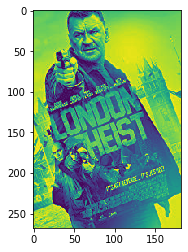

In [55]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt



plt.imshow(df.loc[0][1]/255)

In [51]:
df.loc[1][1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
df.to_csv('Filtered_Img_DataFrame.csv')